In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,472 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [ ]:

import time
import random
import math


import numpy as np
import pandas as pd


import scipy as sp
import statsmodels.api as sm

import requests
from bs4 import BeautifulSoup


import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


%matplotlib inline


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')


mpl.rc('axes', unicode_minus=False)

In [ ]:
import pandas as pd

# 2019년 데이터와 2020년 데이터를 불러옵니다.
df_f= pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv",encoding='UTF-8')
df_f.tail()


,Date,종가,시가,고가,저가,거래량,entertain,ScoreSum,ScoreCount,감정
4987,2018-11-02,"38,950","37,550","39,200","37,450","321,153",와이지엔터테인먼트,13.0,2,0.0
4988,2018-11-01,"37,300","37,000","38,400","36,500","254,854",와이지엔터테인먼트,14.0,2,0.0
4989,2018-10-31,"36,850","38,000","38,050","36,500","192,938",와이지엔터테인먼트,13.0,2,0.0
4990,2018-10-30,"38,000","35,500","38,000","33,800","289,948",와이지엔터테인먼트,13.0,2,0.0
4991,2018-10-29,"35,950","38,050","38,050","35,450","295,405",와이지엔터테인먼트,13.0,2,0.0


In [ ]:
import pandas as pd

# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv", encoding='UTF-8')

# 'Date' 열의 고유값 개수를 계산합니다.
unique_date_count = df_f['Date'].nunique()

print("중복되지 않는 날짜의 갯수:", unique_date_count)


중복되지 않는 날짜의 갯수: 1155


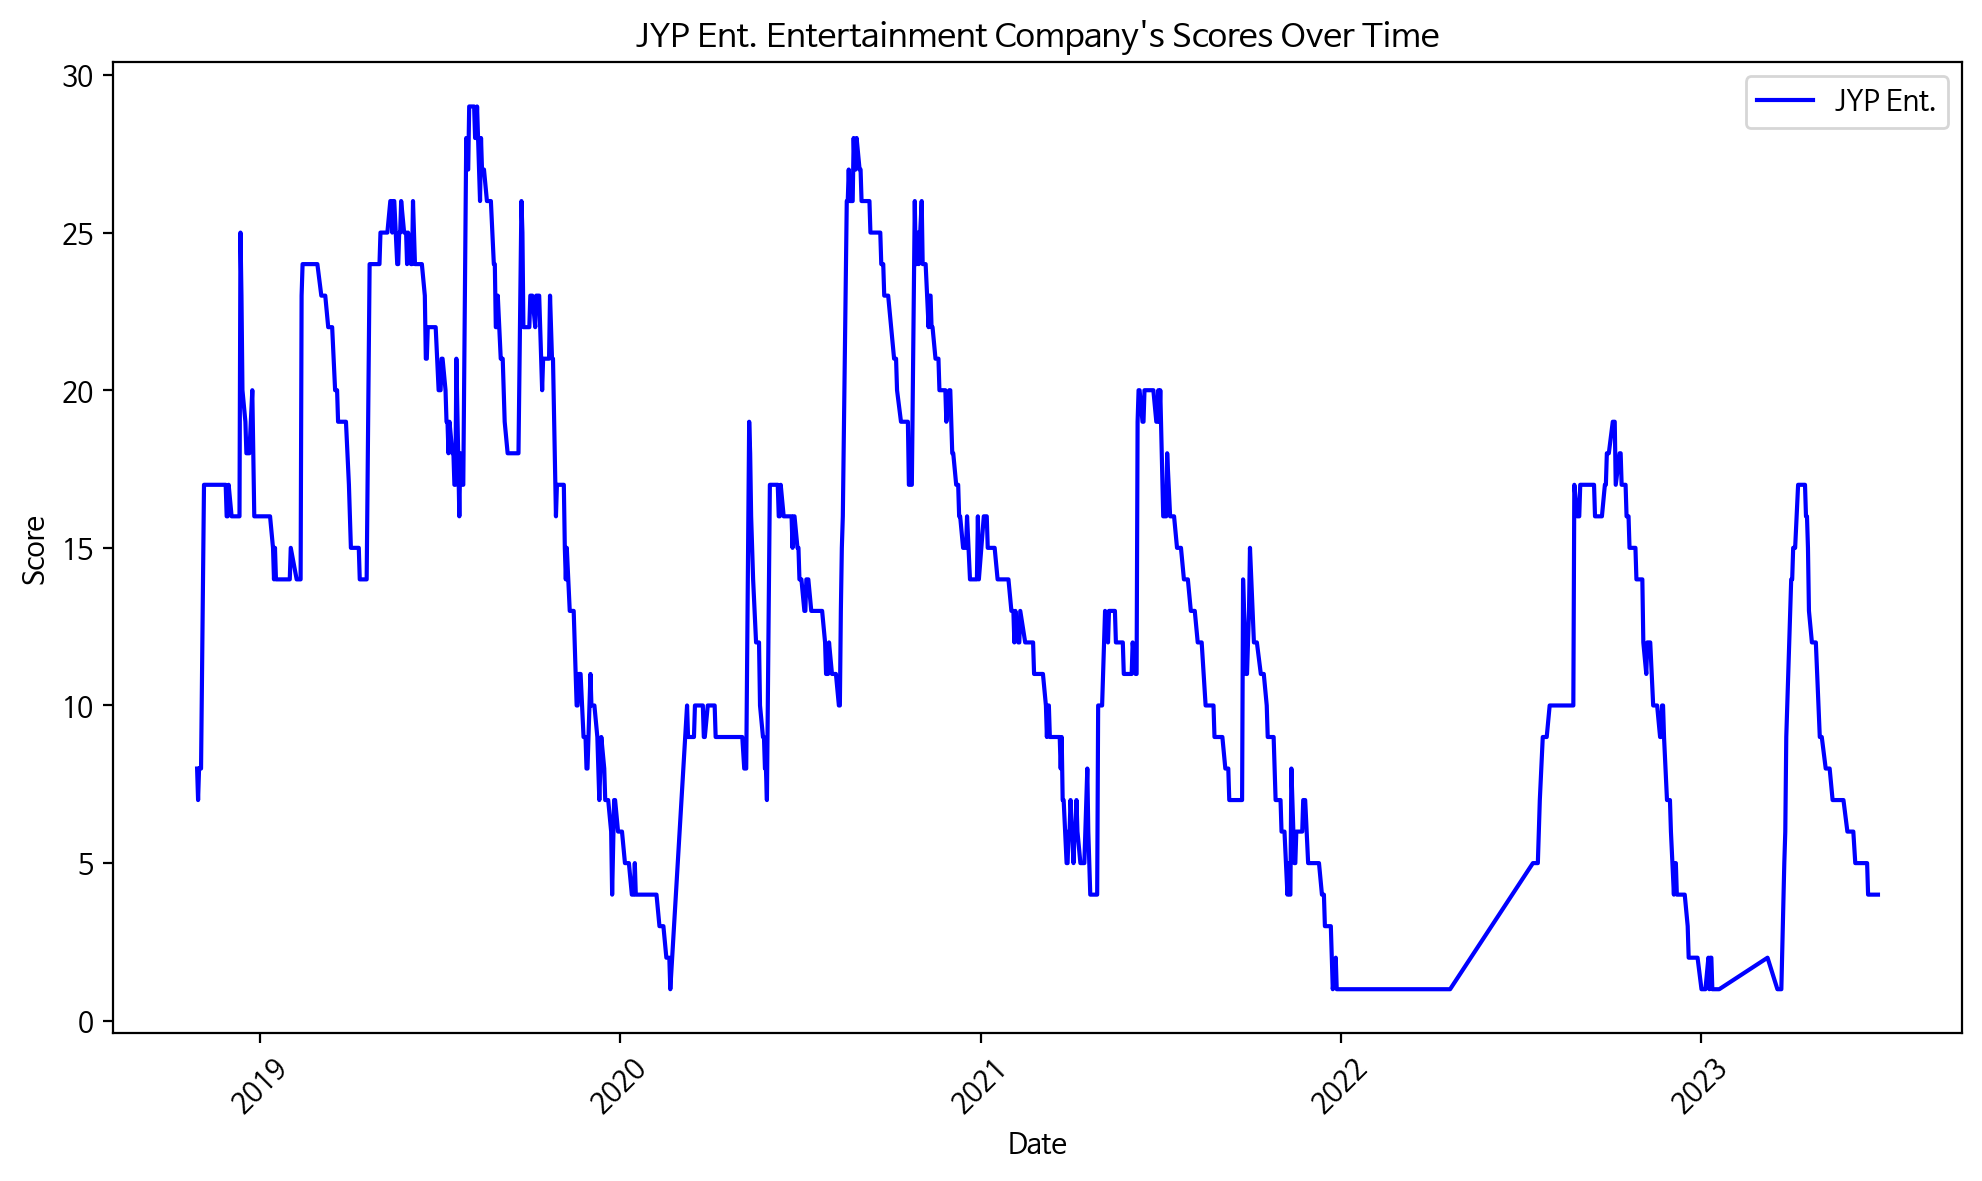

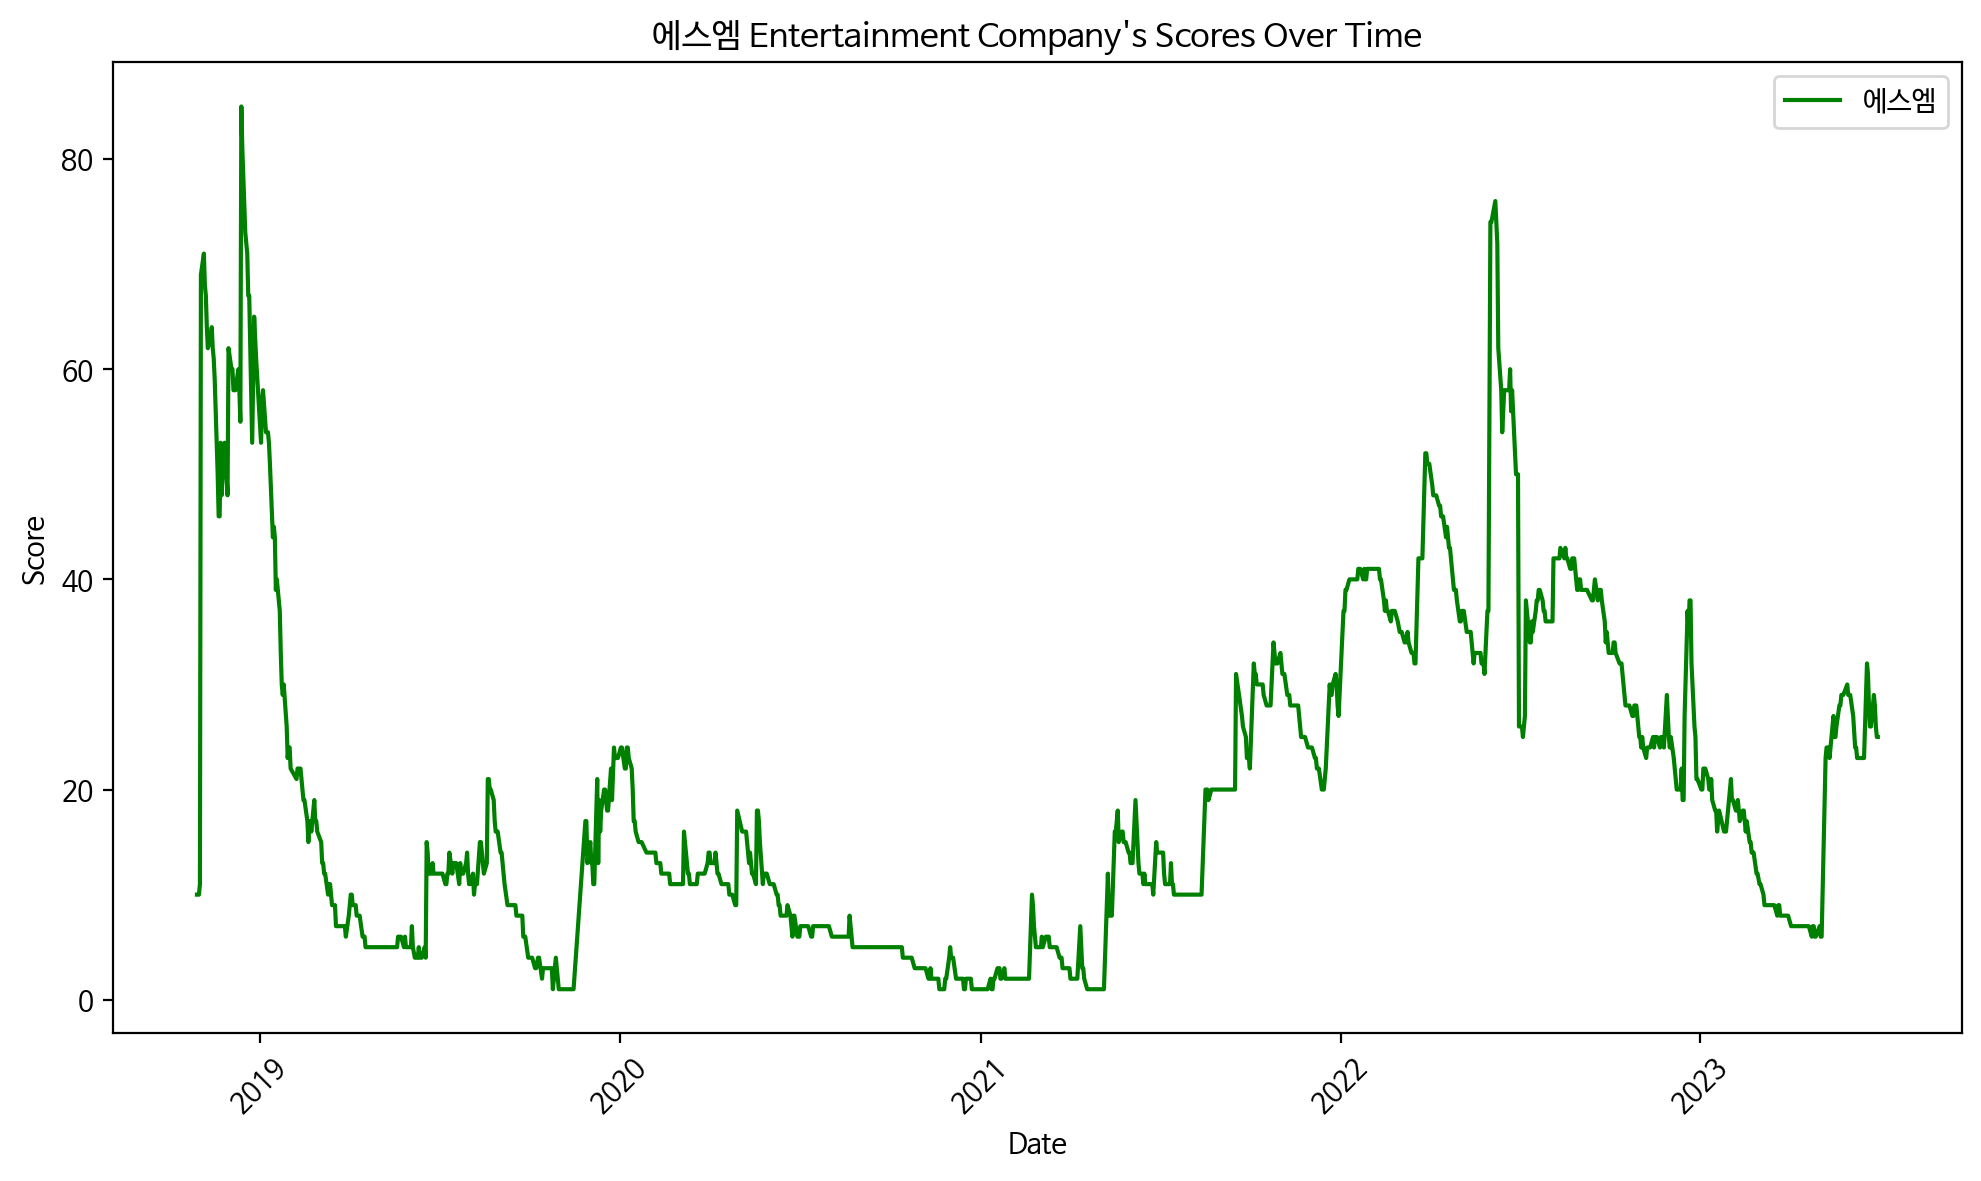

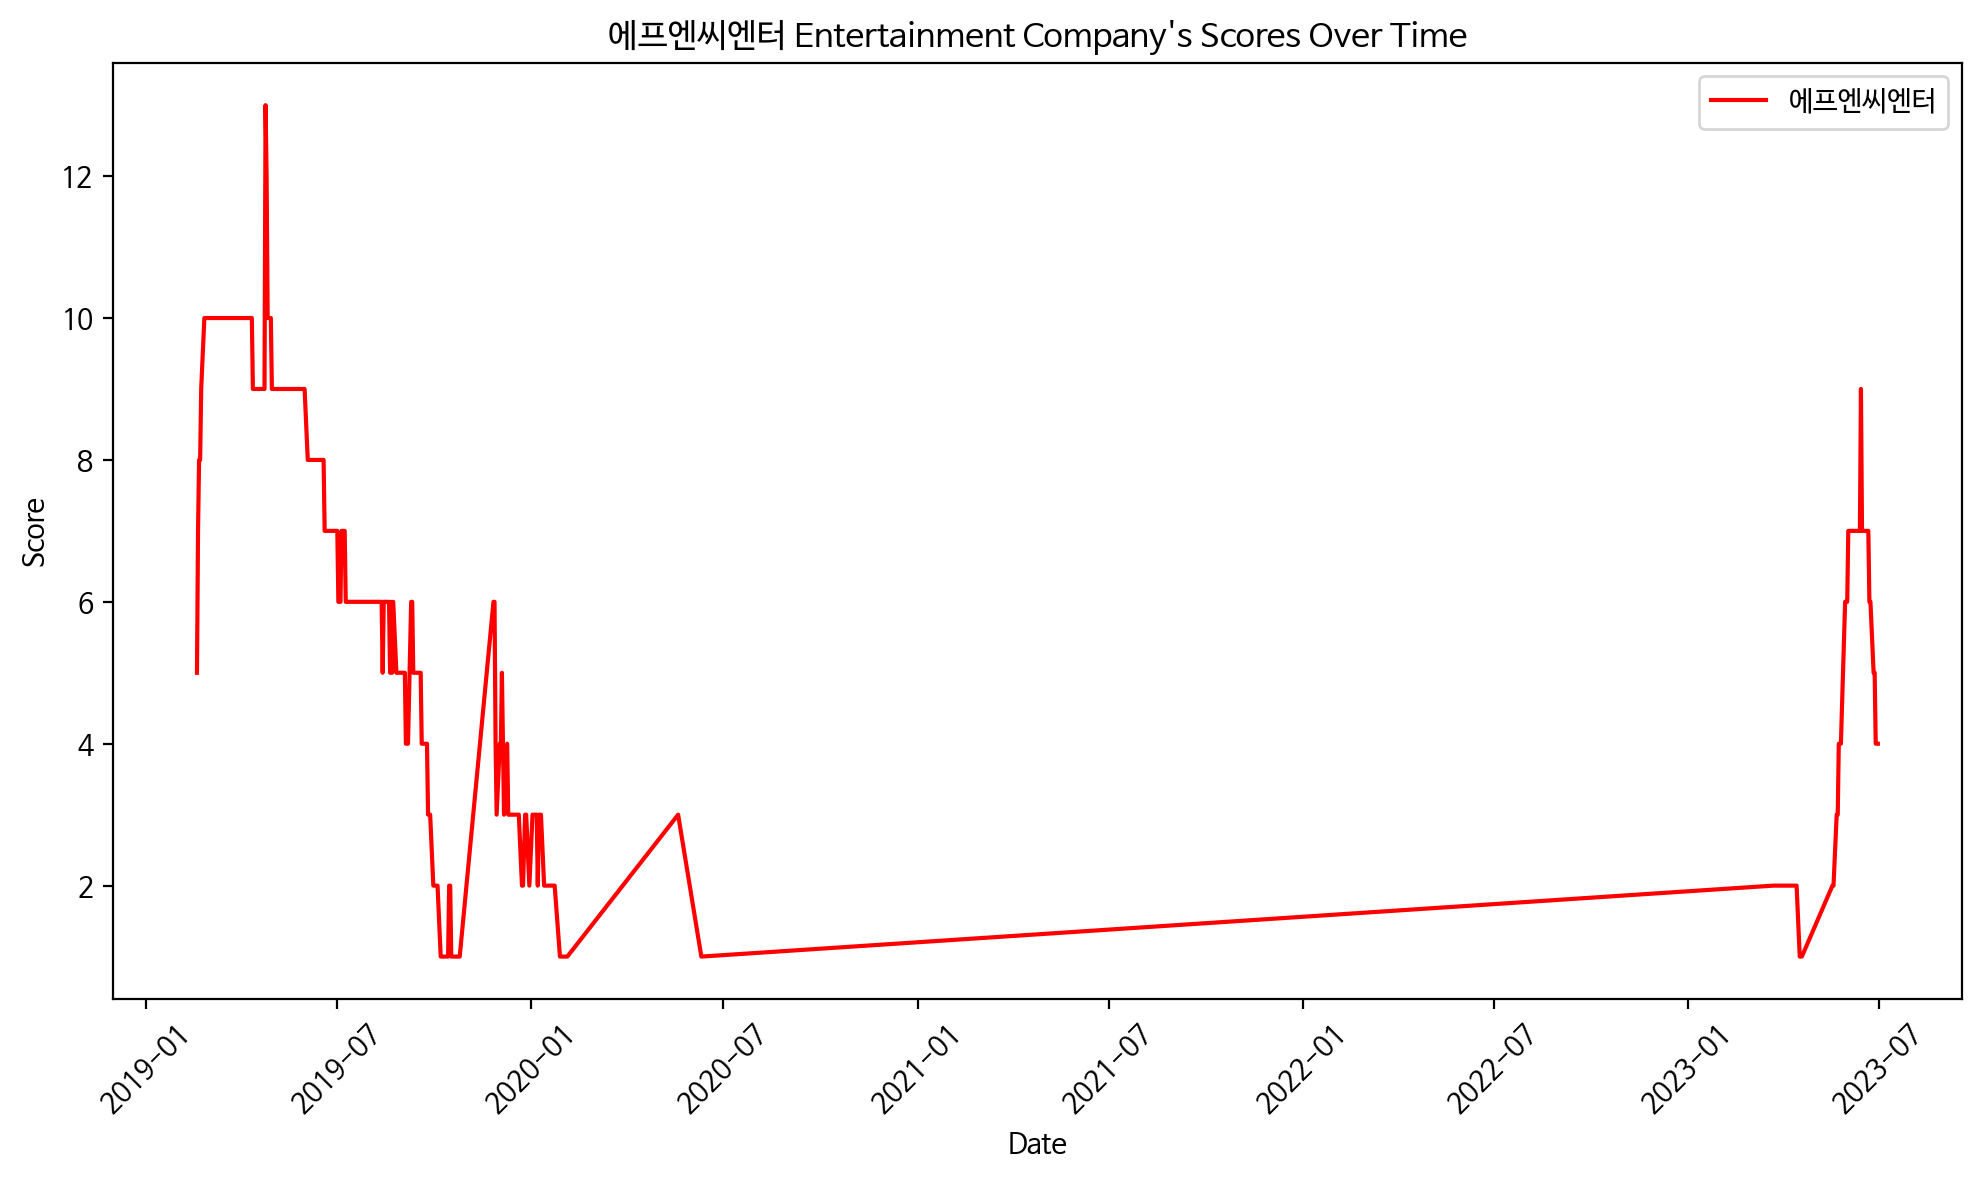

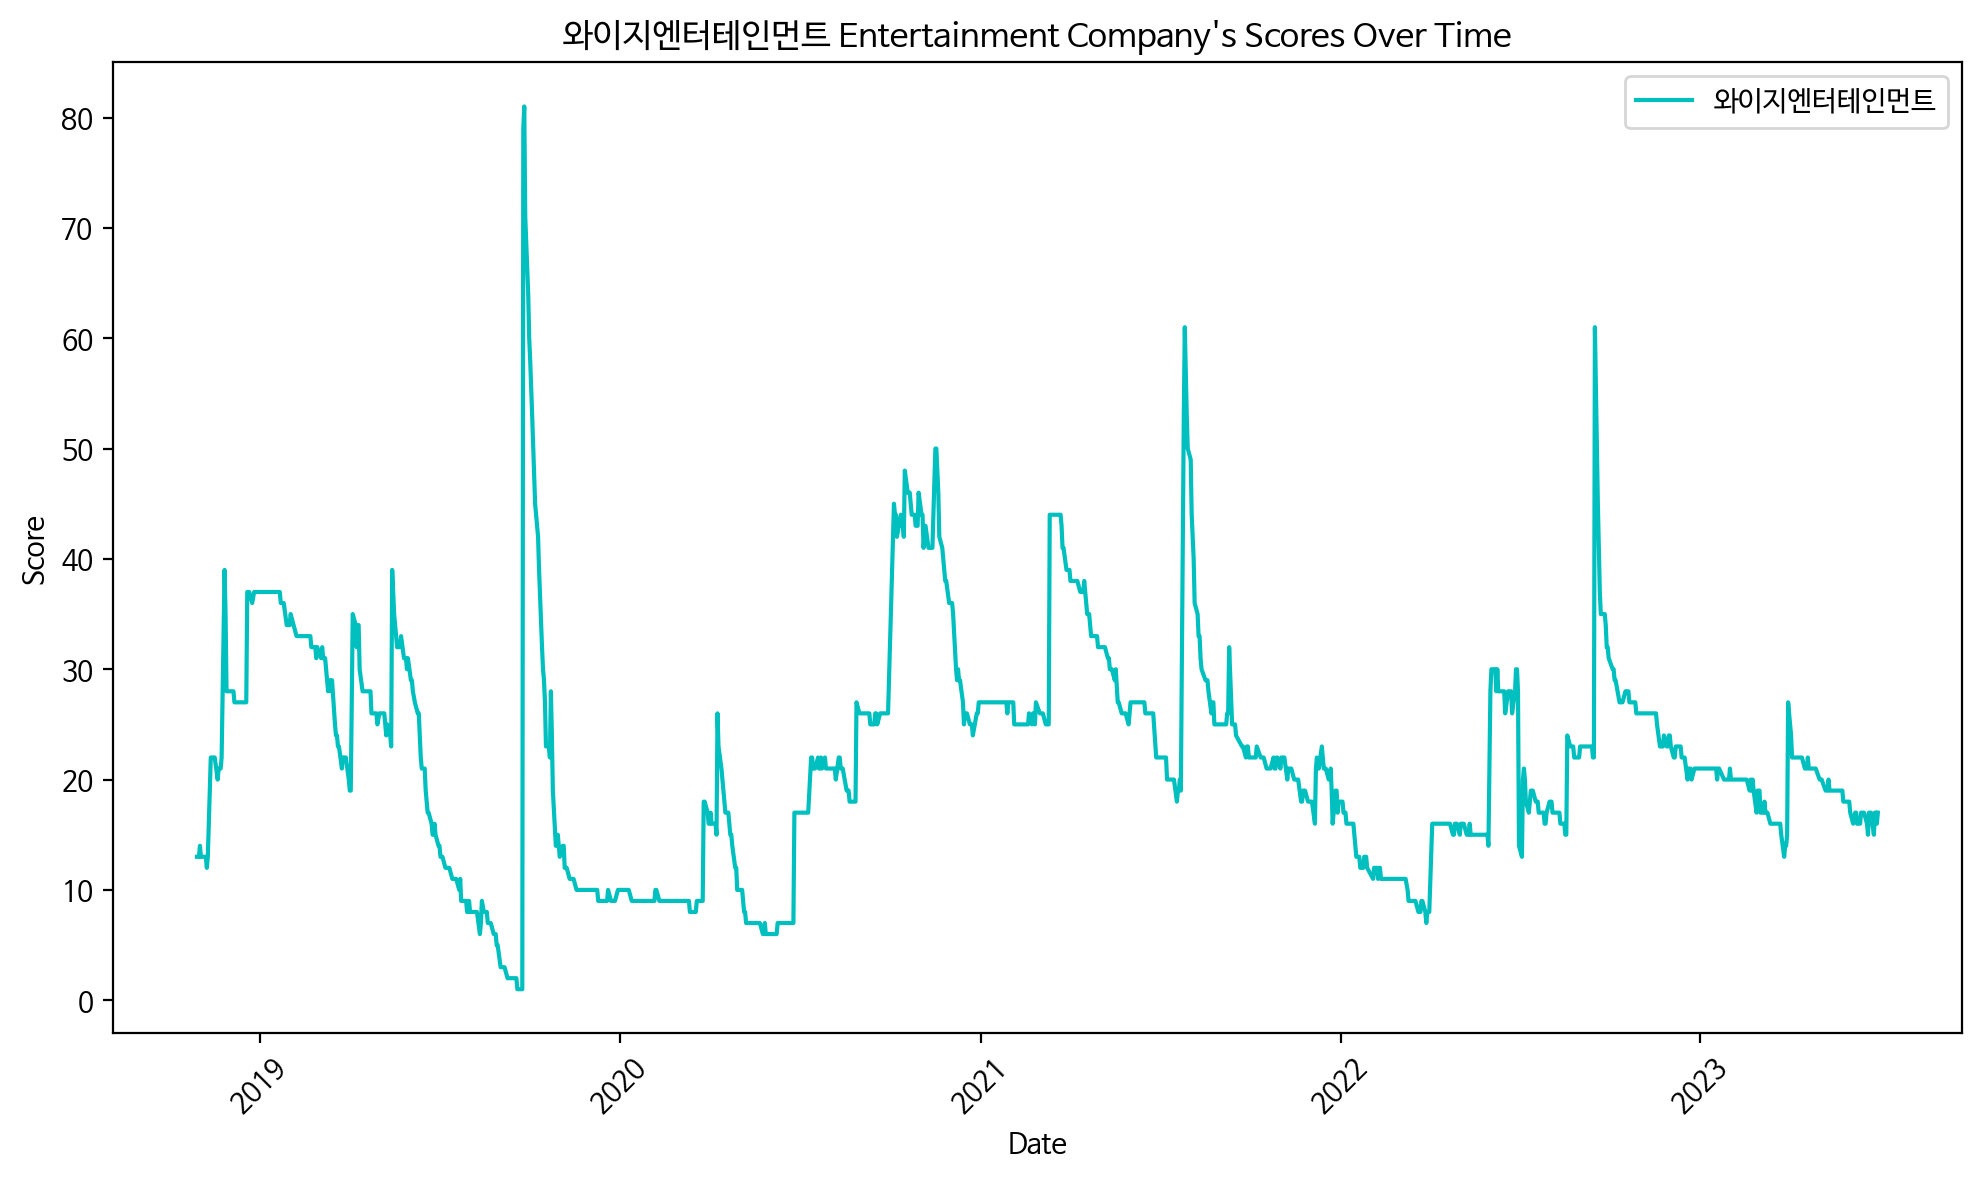

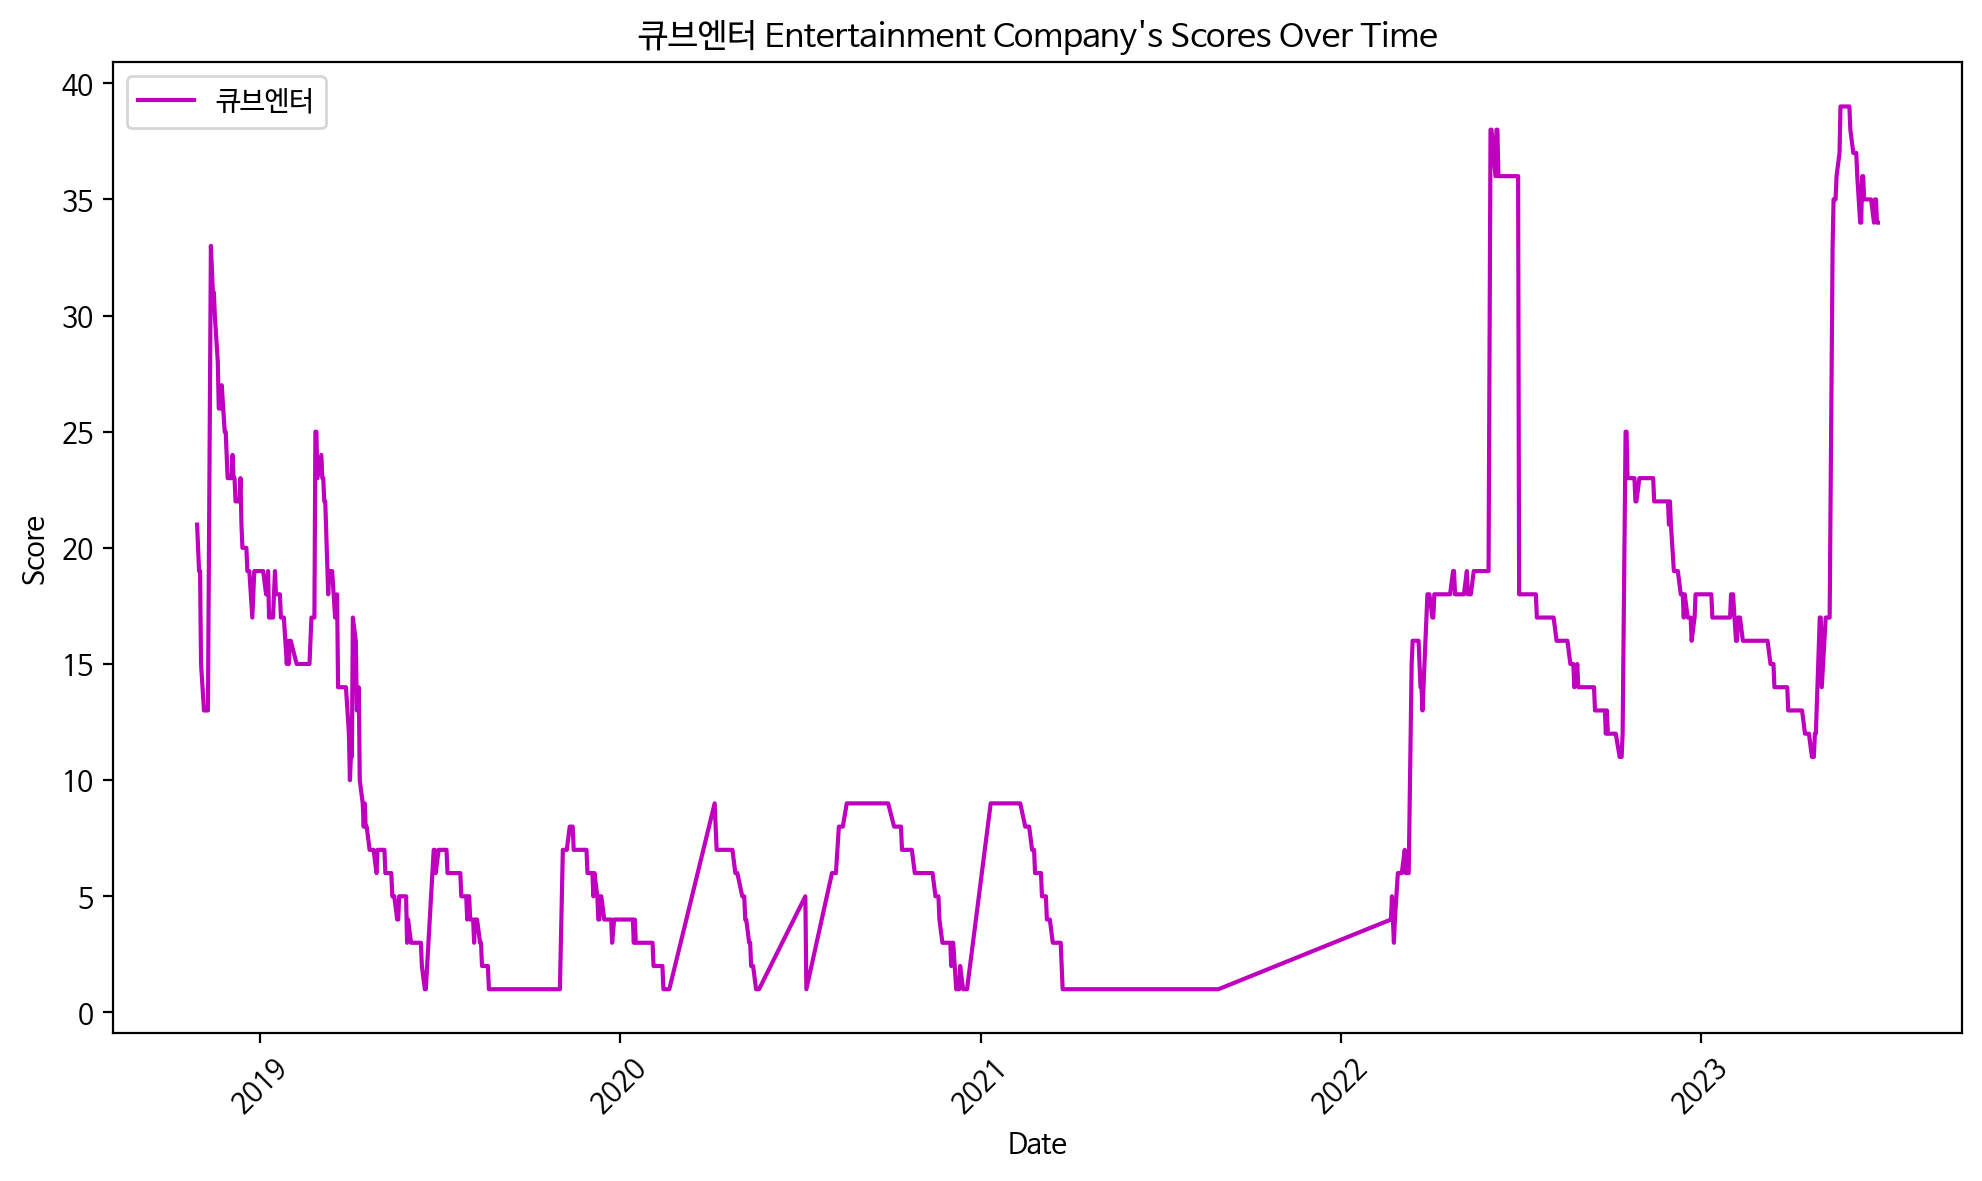

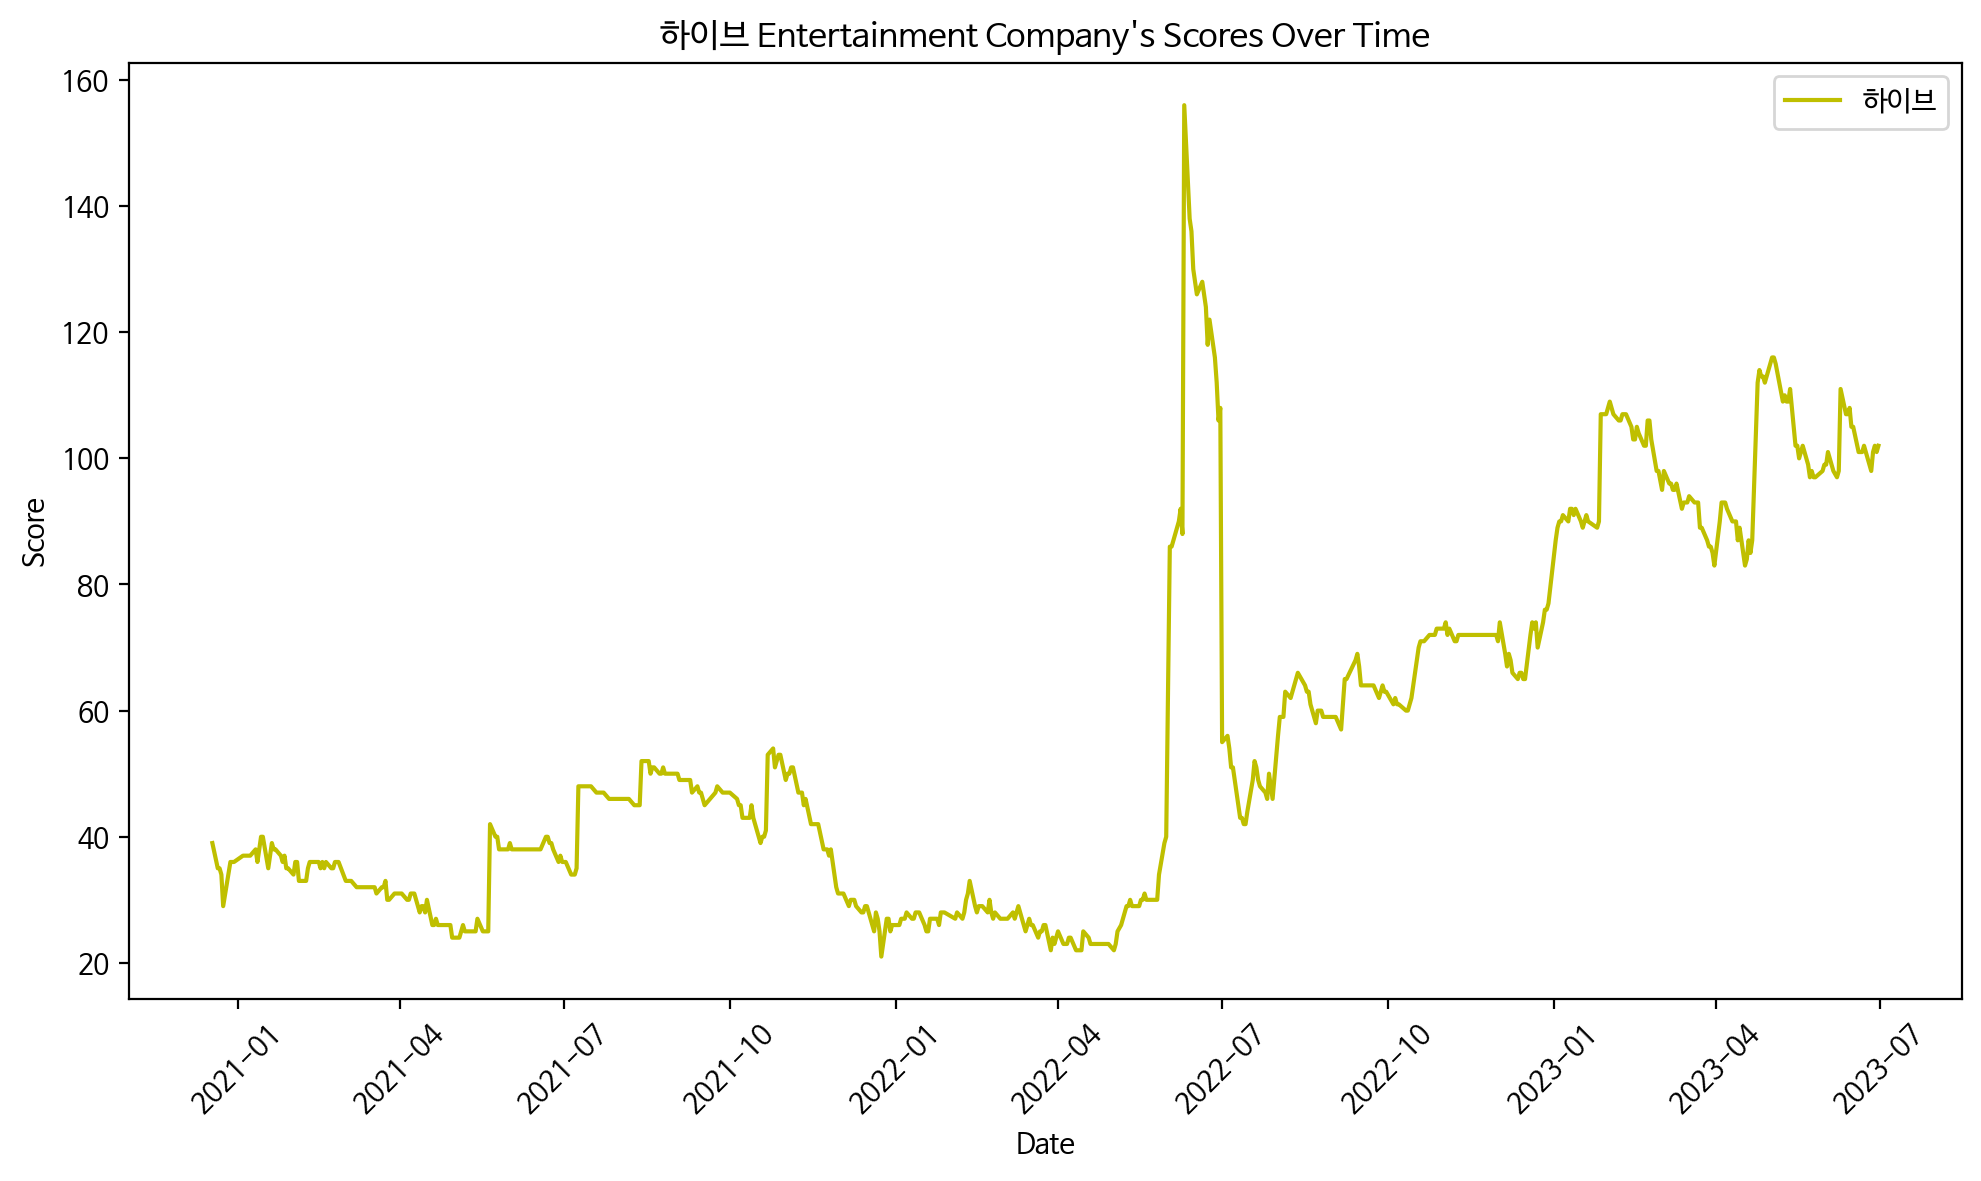

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime



# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv", encoding='UTF-8')

# 'Date' 열을 datetime 형식으로 변환합니다.
df_f['Date'] = pd.to_datetime(df_f['Date'])

# 'entertain' 열을 기준으로 데이터프레임을 그룹화합니다.
grouped = df_f.groupby('entertain')

# 엔터테인먼트 회사 리스트
ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']

# 날짜 범위 설정
start_date = datetime(2018, 10, 29)
end_date = datetime(2023, 6, 30)

# 색상 리스트 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 각 엔터테인먼트 회사별로 'ScoreSum'을 평균내고 플롯으로 표시합니다.
for i, entertain in enumerate(ent_list):
    selected_group = grouped.get_group(entertain)

    # 날짜 범위 필터링
    filtered_data = selected_group[(selected_group['Date'] >= start_date) & (selected_group['Date'] <= end_date)]

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['Date'], filtered_data['ScoreSum'], label=entertain, color=colors[i])
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.title(f"{entertain} Entertainment Company's Scores Over Time")
    plt.legend()
    plt.xticks(rotation=45)  # x 축 레이블 회전
    plt.tight_layout()  # 그래프 간격 조정
    plt.show()


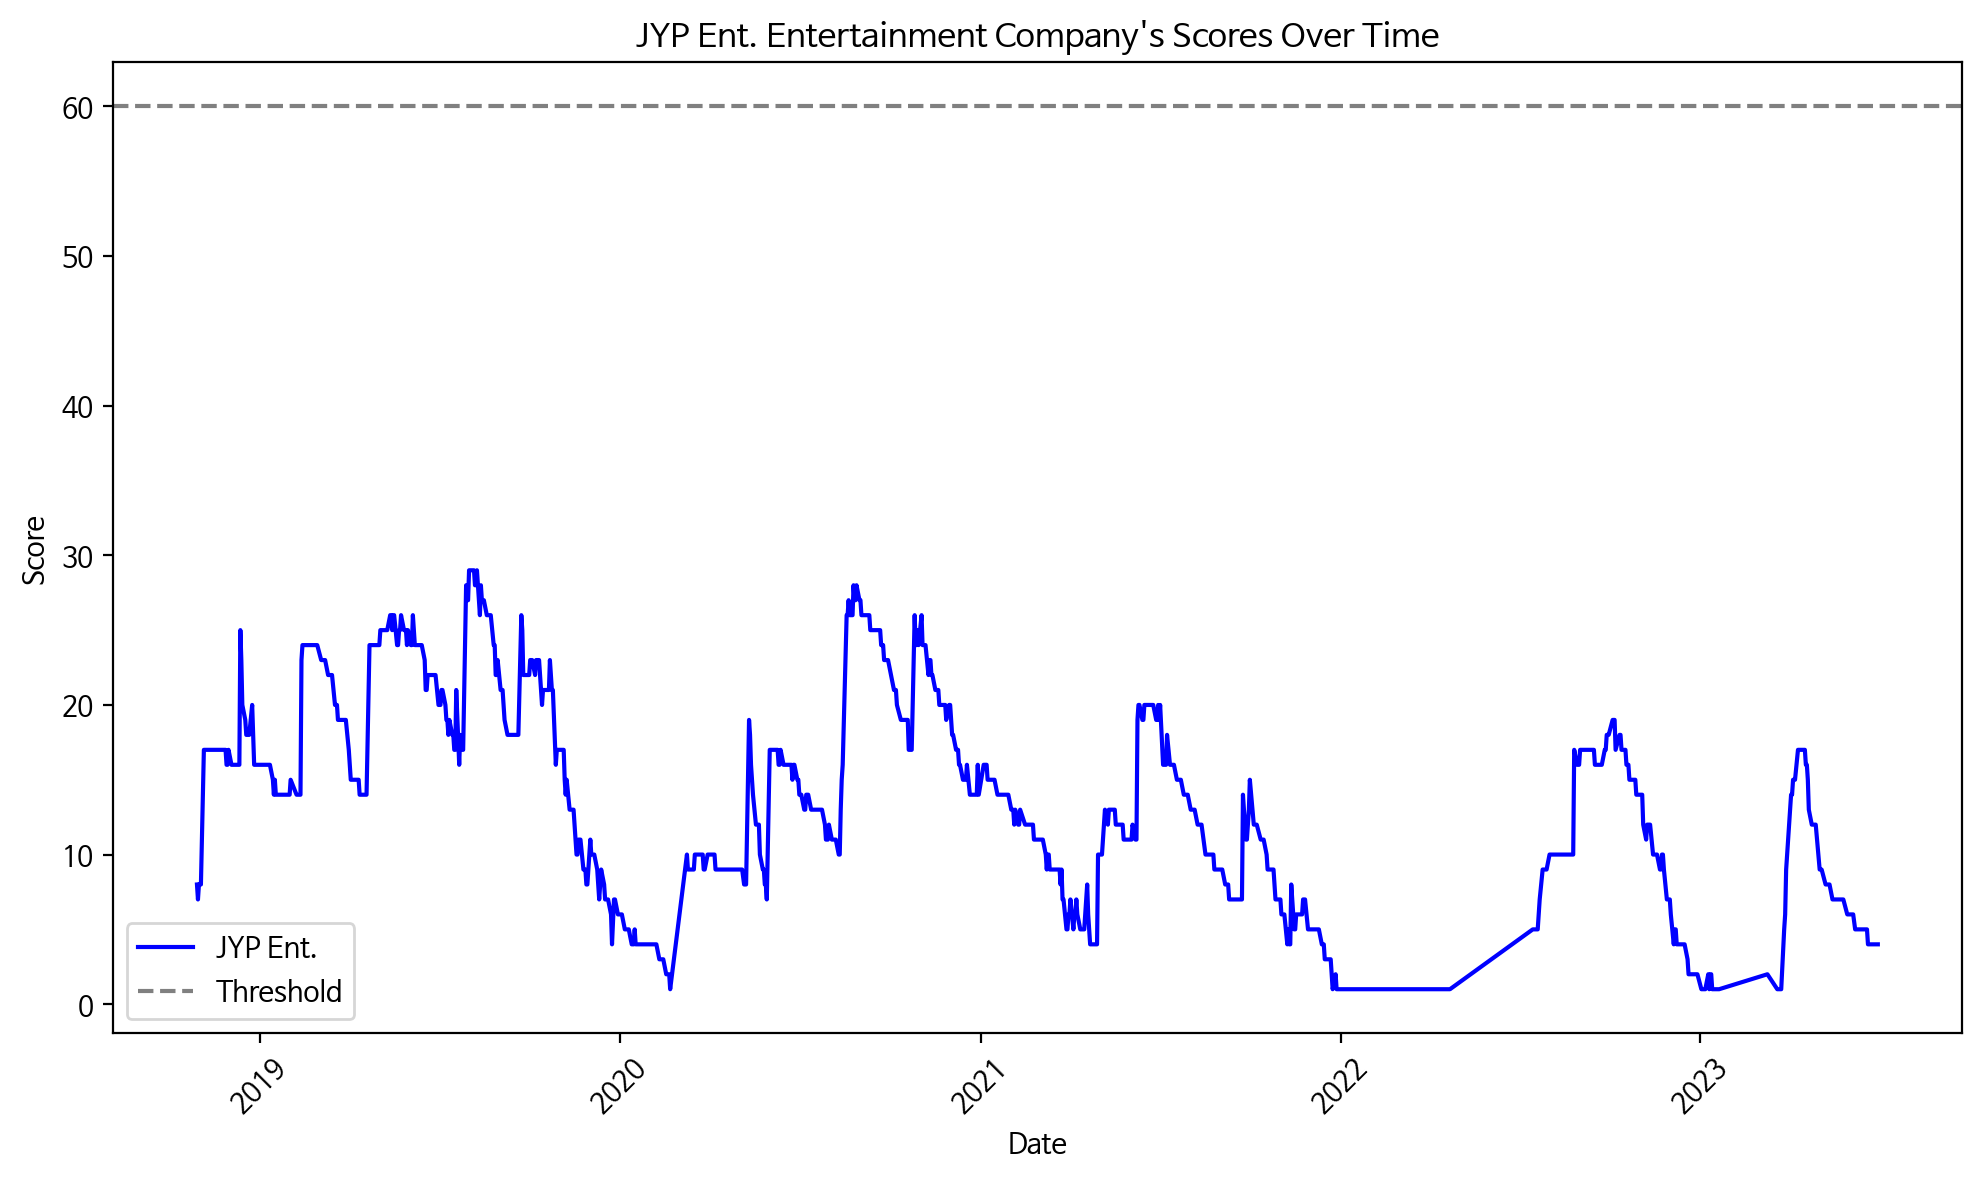

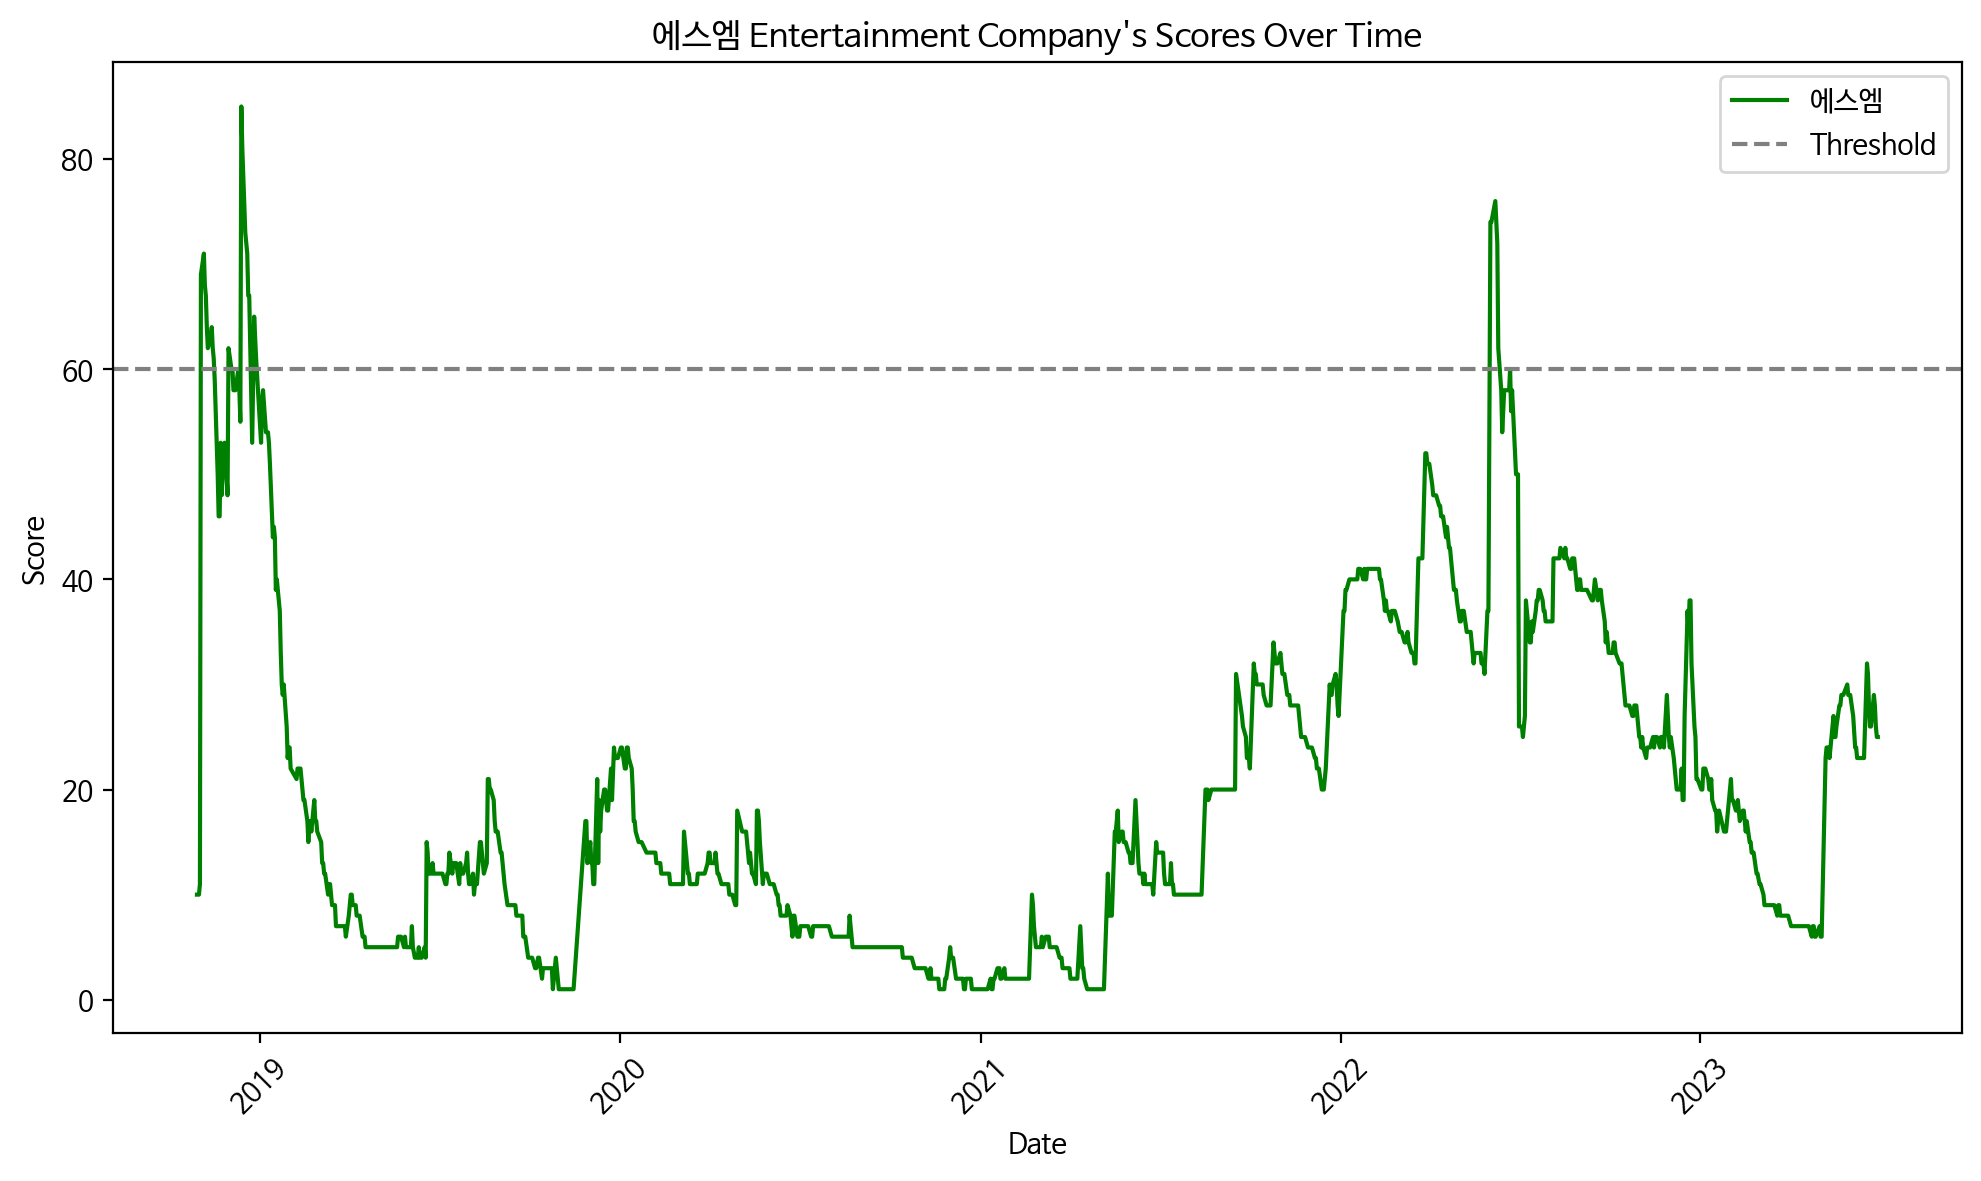

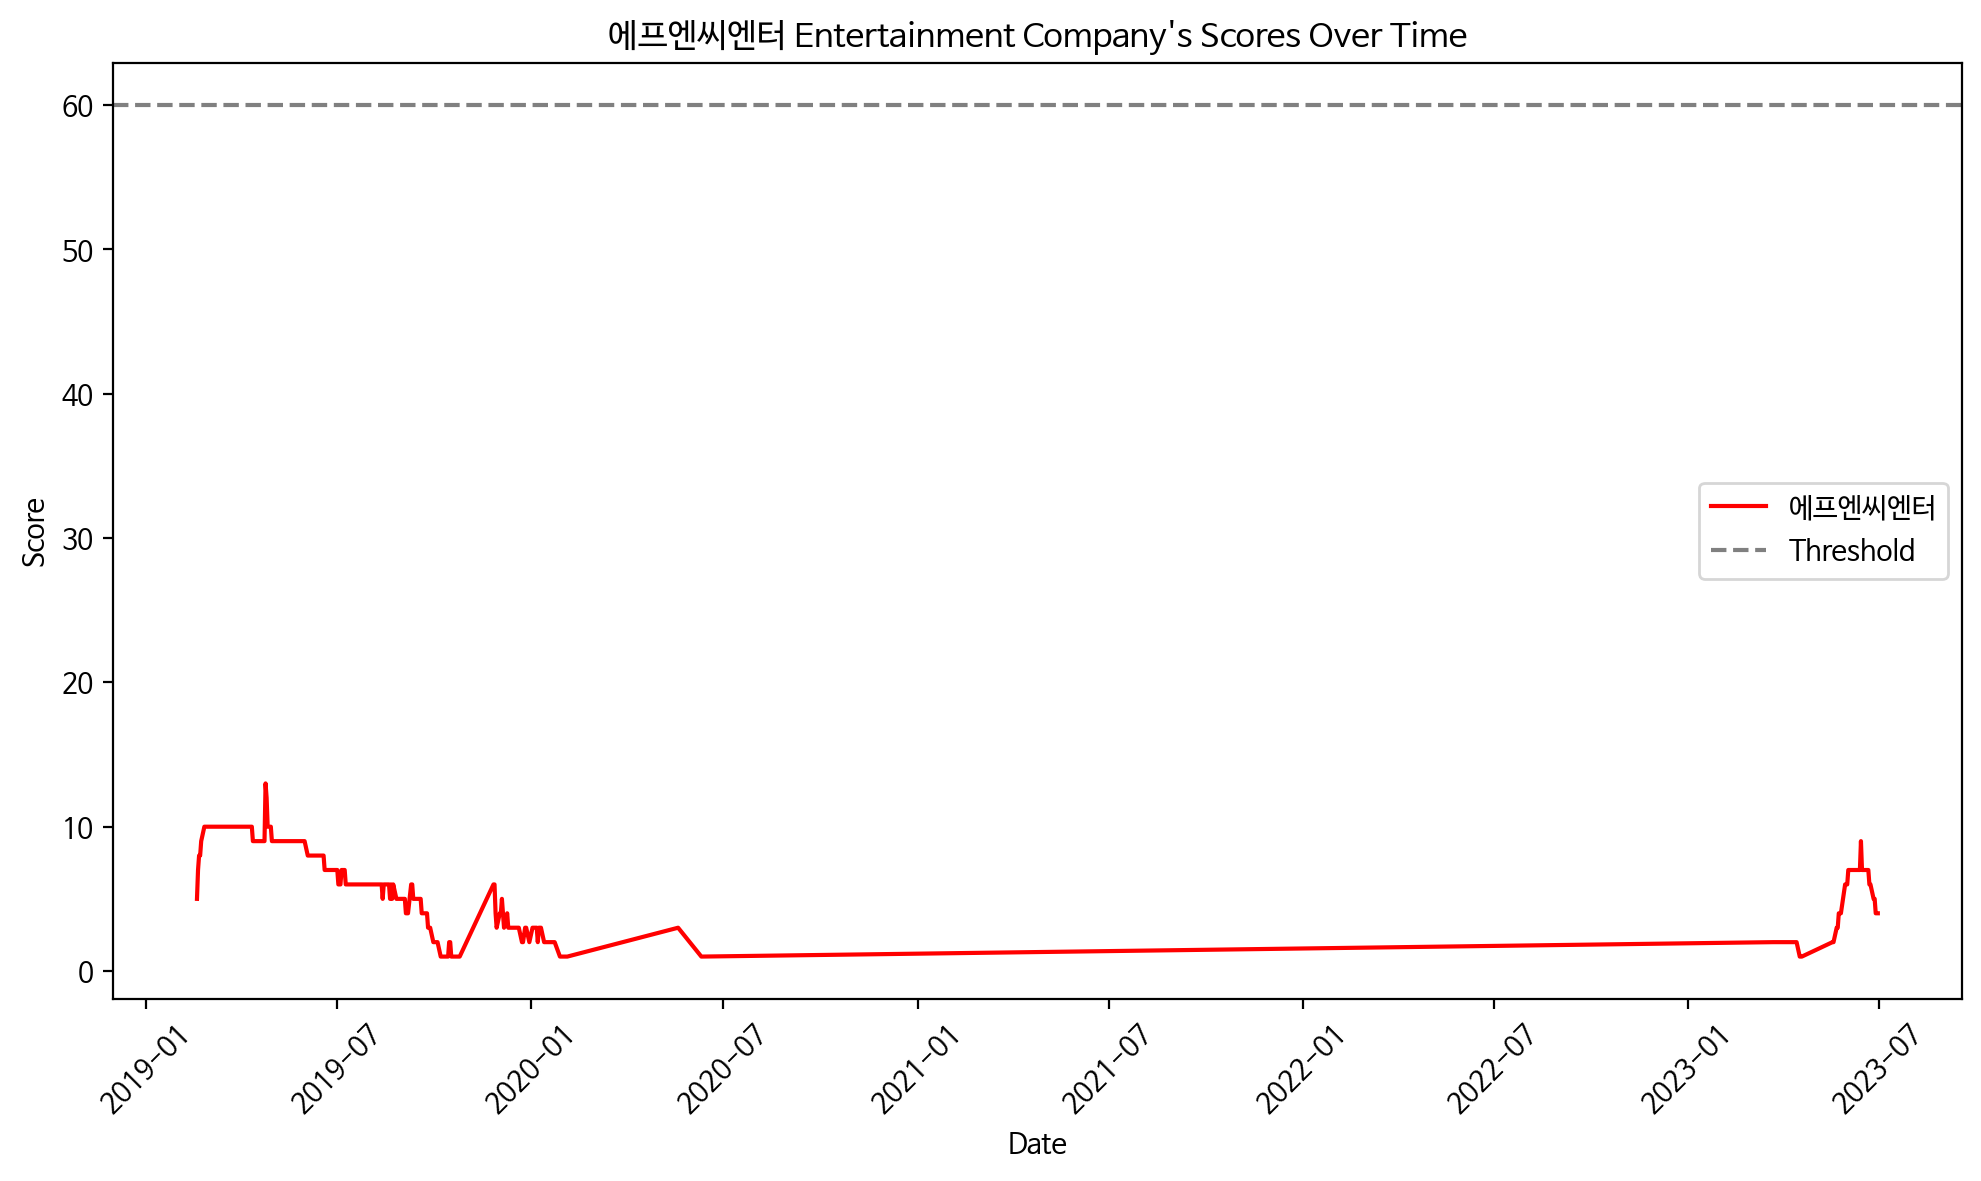

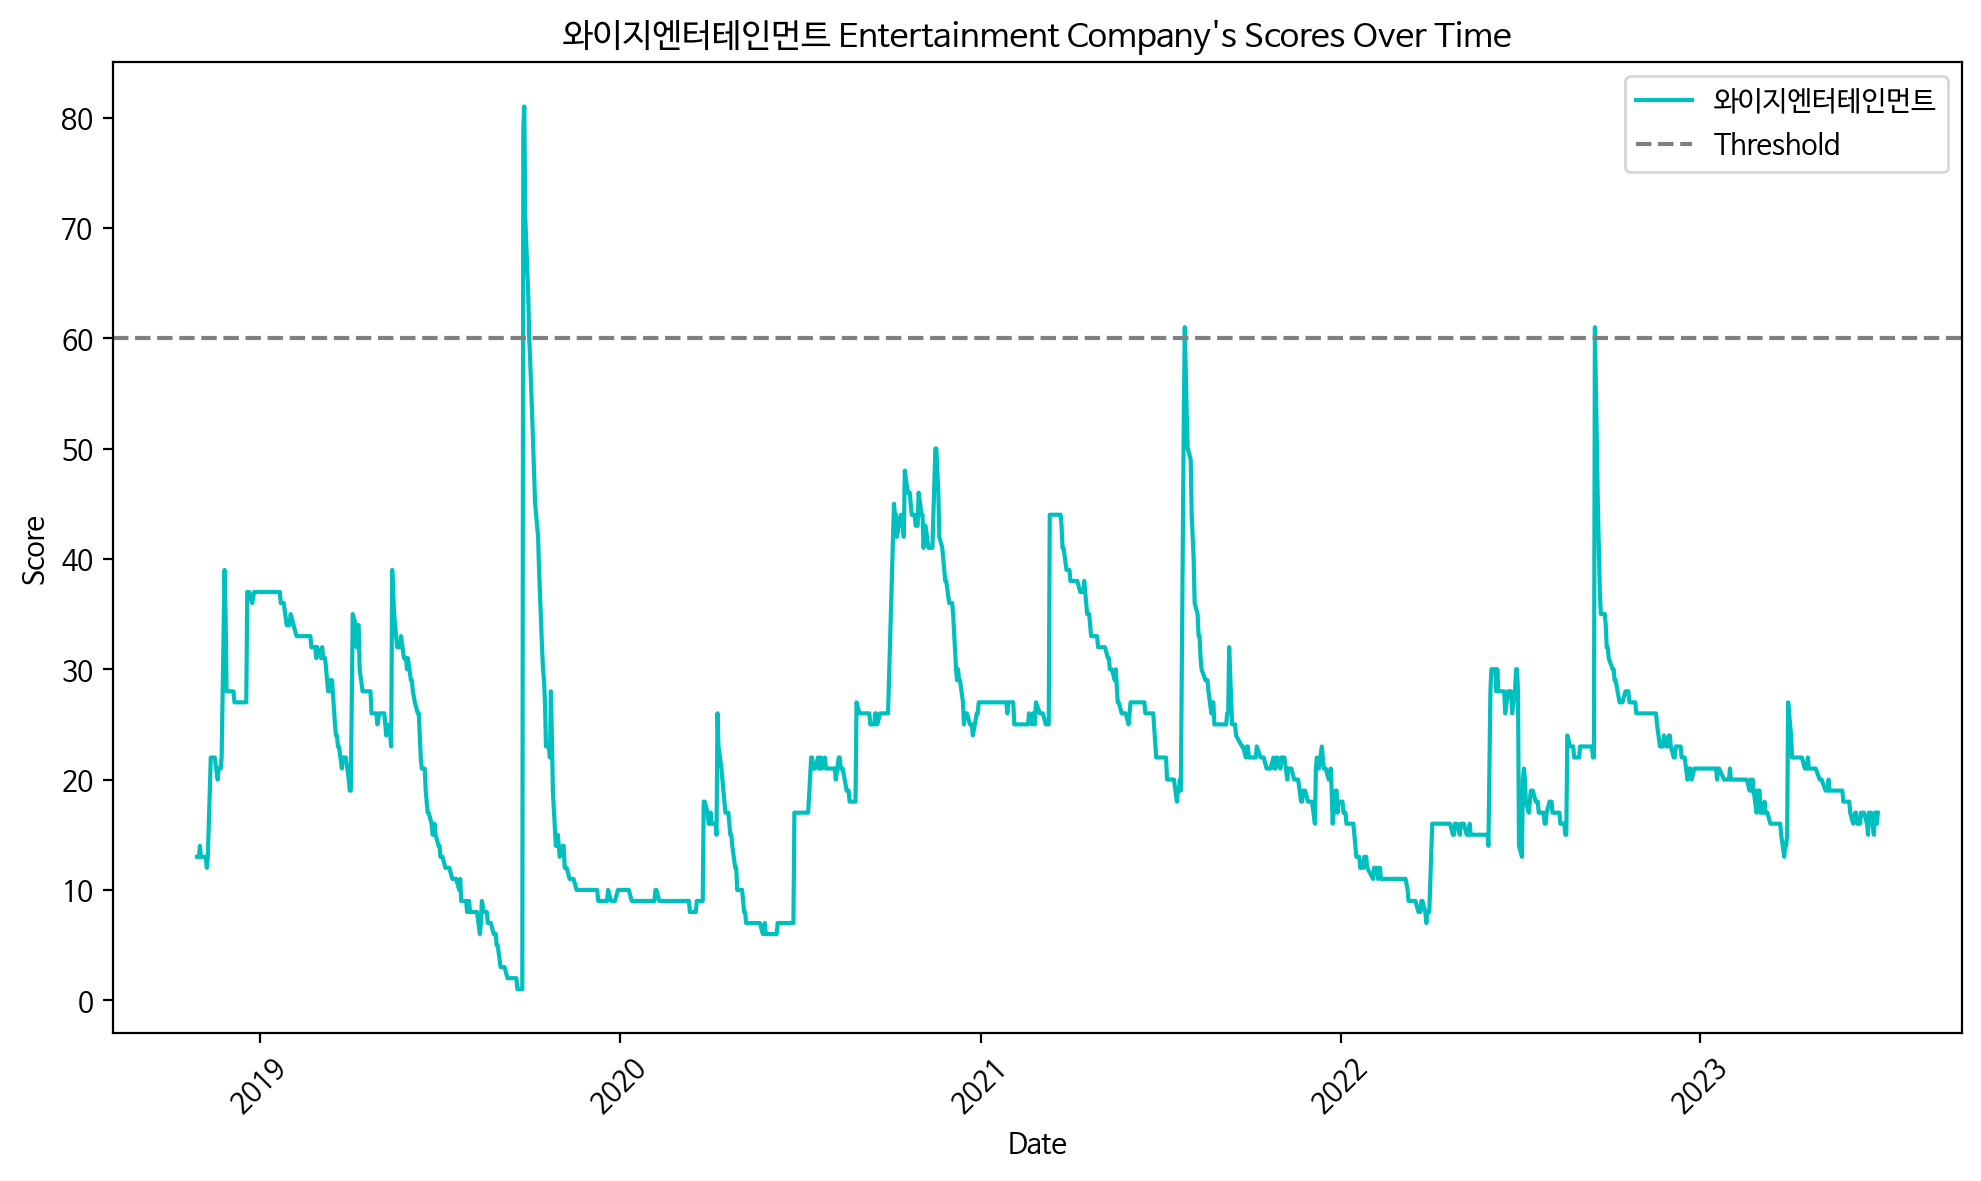

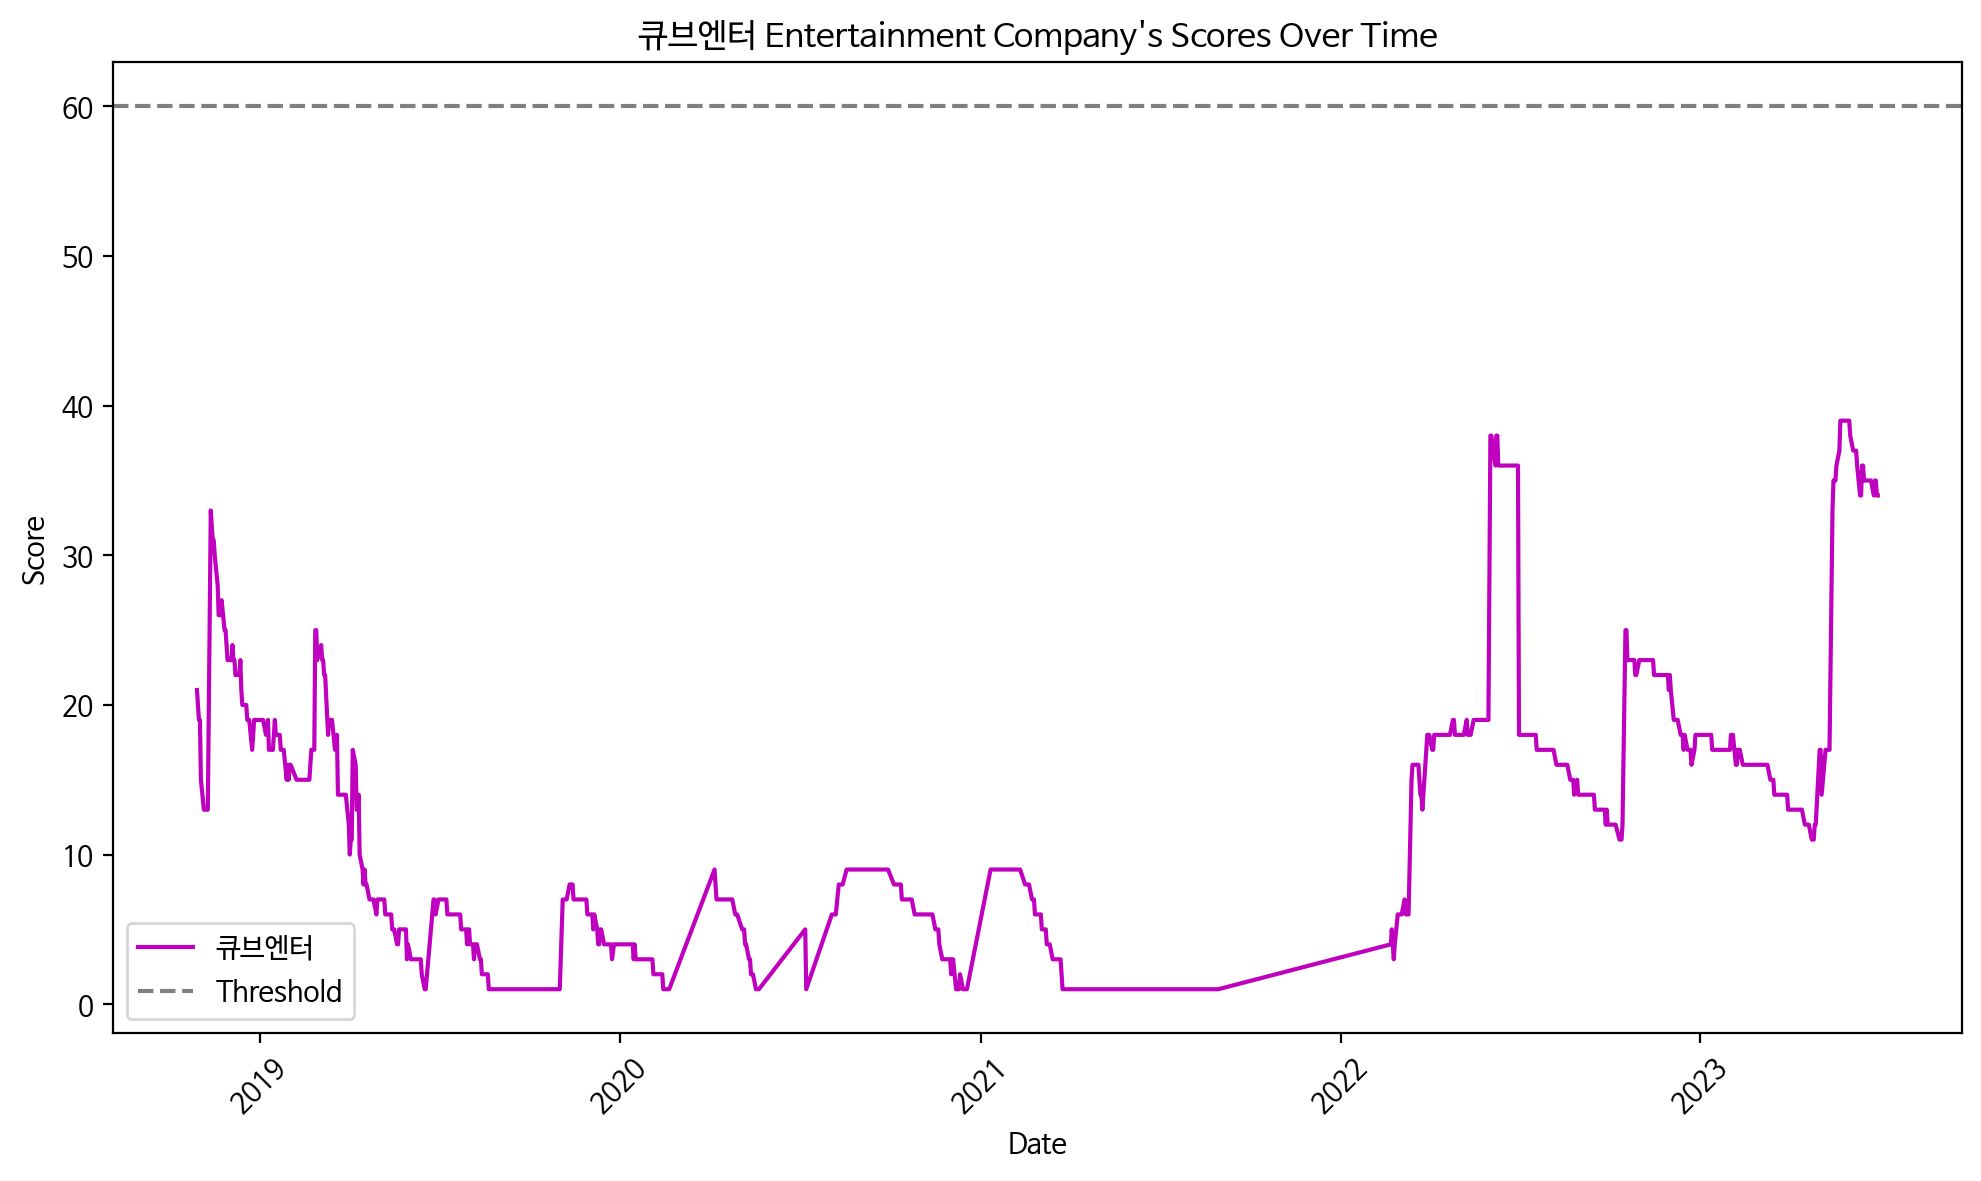

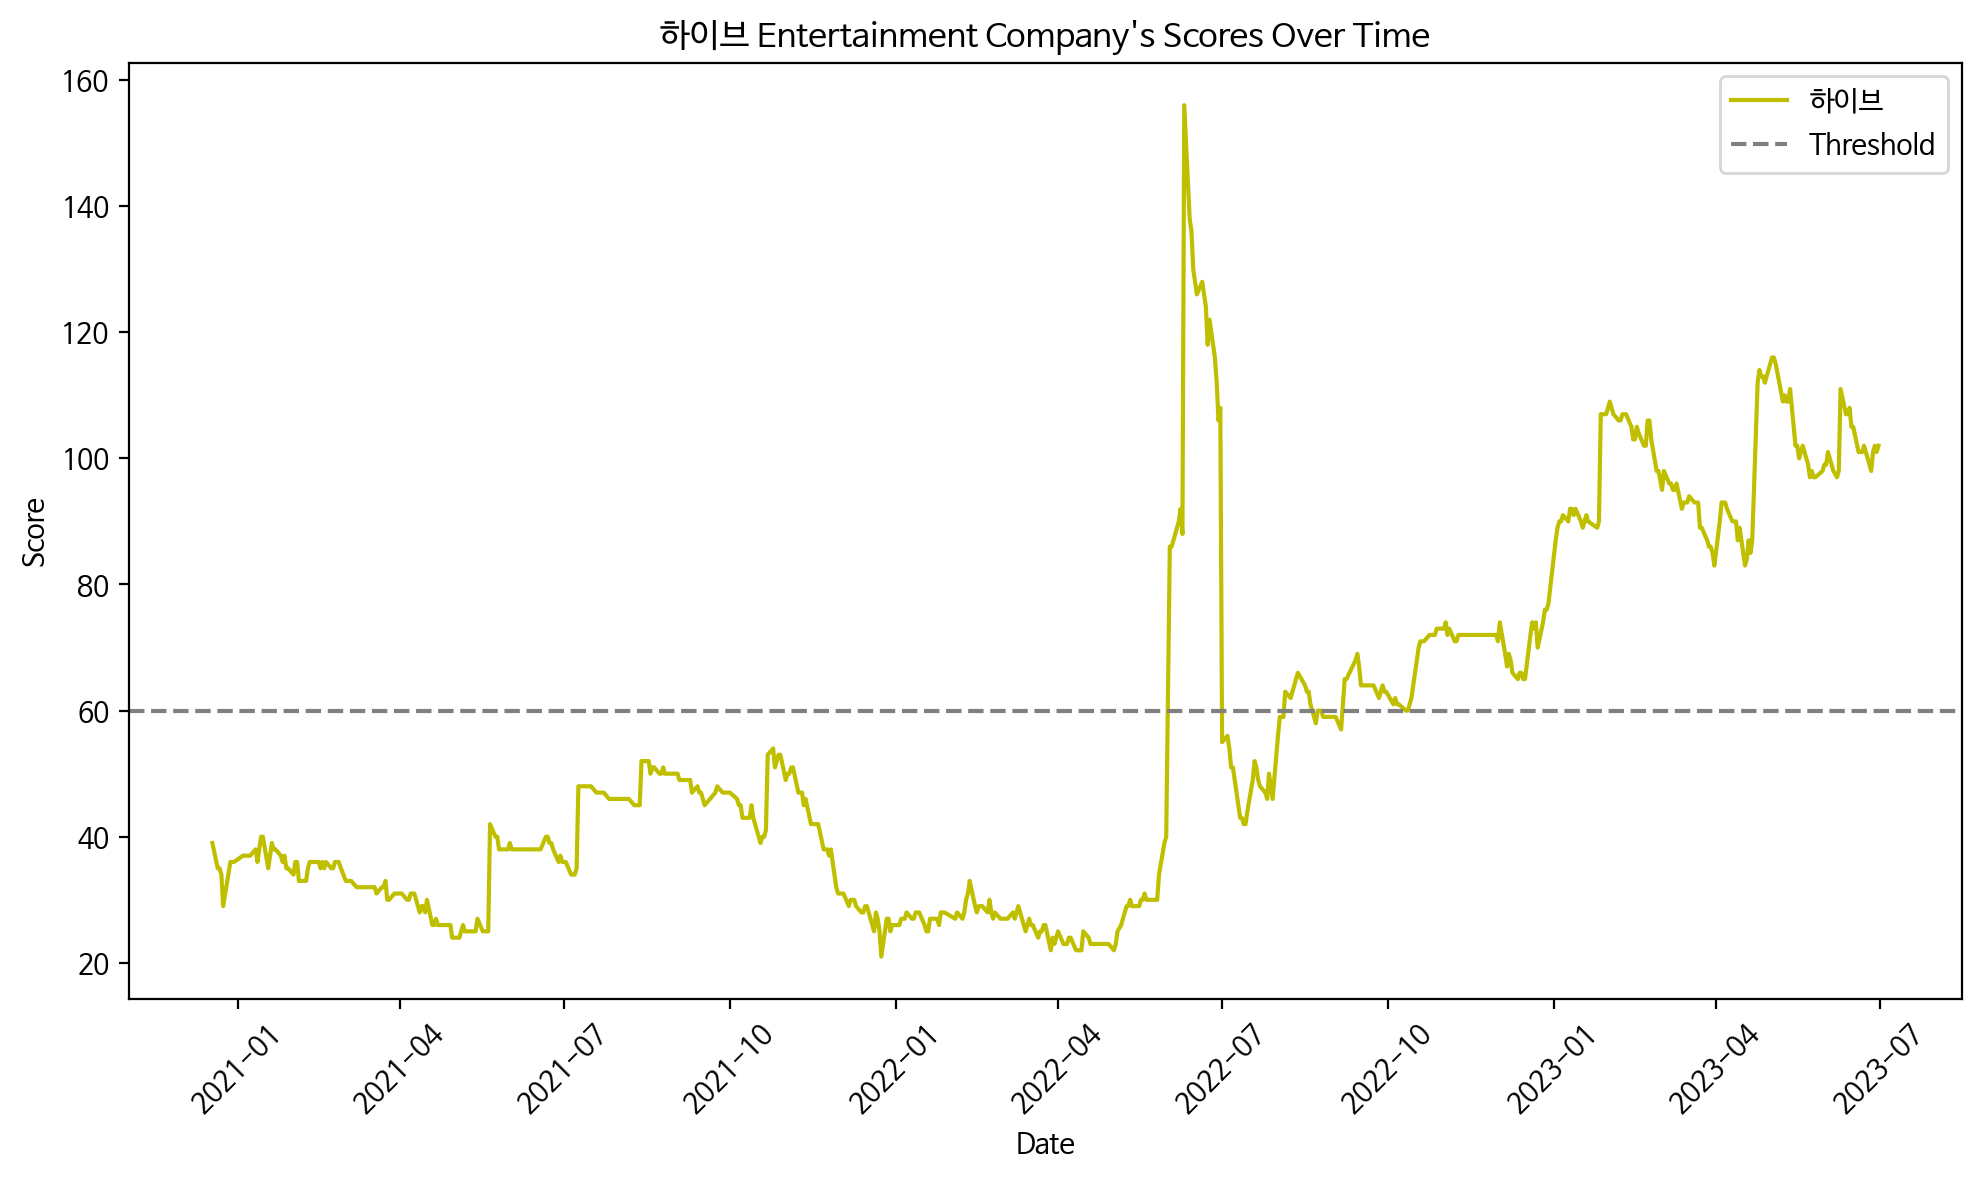

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime


# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv", encoding='UTF-8')

# 'Date' 열을 datetime 형식으로 변환합니다.
df_f['Date'] = pd.to_datetime(df_f['Date'])

# 'entertain' 열을 기준으로 데이터프레임을 그룹화합니다.
grouped = df_f.groupby('entertain')

# 엔터테인먼트 회사 리스트
ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']

# 날짜 범위 설정
start_date = datetime(2018, 10, 29)
end_date = datetime(2023, 6, 30)

# 색상 리스트 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 각 엔터테인먼트 회사별로 'ScoreSum'을 평균내고 플롯으로 표시합니다.
for i, entertain in enumerate(ent_list):
    selected_group = grouped.get_group(entertain)

    # 날짜 범위 필터링
    filtered_data = selected_group[(selected_group['Date'] >= start_date) & (selected_group['Date'] <= end_date)]

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['Date'], filtered_data['ScoreSum'], label=entertain, color=colors[i])
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.title(f"{entertain} Entertainment Company's Scores Over Time")
    plt.axhline(y=60, color='gray', linestyle='--', label='Threshold')
    plt.legend()
    plt.xticks(rotation=45)  # x 축 레이블 회전
    plt.tight_layout()  # 그래프 간격 조정
    plt.show()


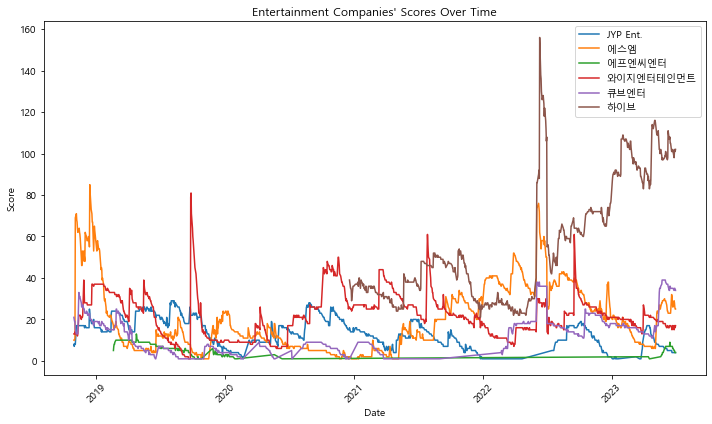

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime
# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv", encoding='UTF-8')

# 'Date' 열을 datetime 형식으로 변환합니다.
df_f['Date'] = pd.to_datetime(df_f['Date'])

# 'entertain' 열을 기준으로 데이터프레임을 그룹화합니다.
grouped = df_f.groupby('entertain')

# 엔터테인먼트 회사 리스트
ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']

# 날짜 범위 설정
start_date = datetime(2018, 10, 29)
end_date = datetime(2023, 6, 30)

# 각 엔터테인먼트 회사별로 'ScoreSum'을 평균내고 플롯으로 표시합니다.
plt.figure(figsize=(10, 6))
for entertain in ent_list:
    selected_group = grouped.get_group(entertain)

    # 날짜 범위 필터링
    filtered_data = selected_group[(selected_group['Date'] >= start_date) & (selected_group['Date'] <= end_date)]

    plt.plot(filtered_data['Date'], filtered_data['ScoreSum'], label=entertain)

plt.xlabel('Date')
plt.ylabel('Score')
plt.title("Entertainment Companies' Scores Over Time")
plt.legend()
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.tight_layout()  # 그래프 간격 조정
plt.show()


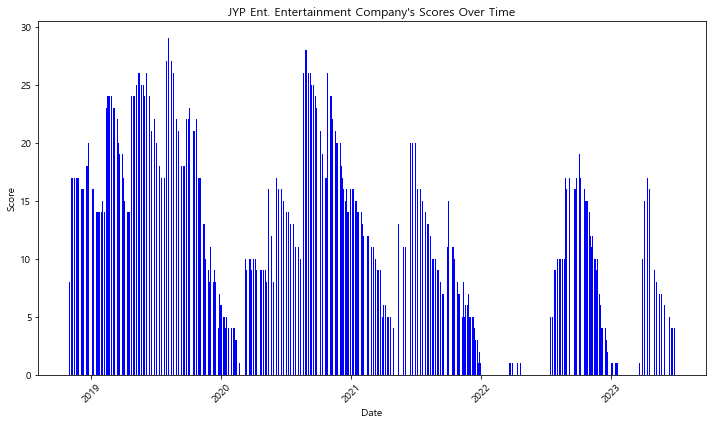

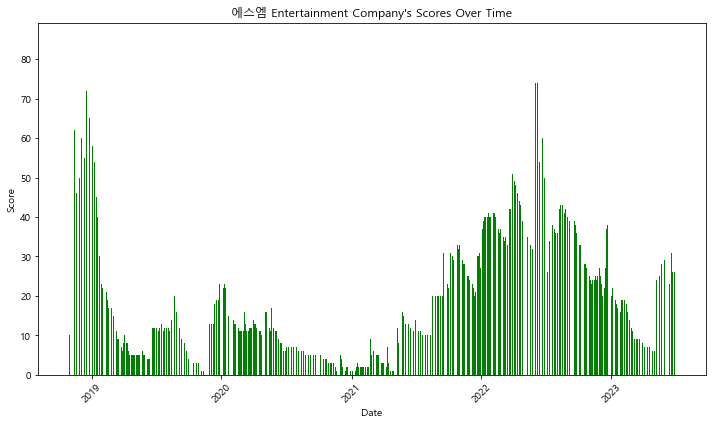

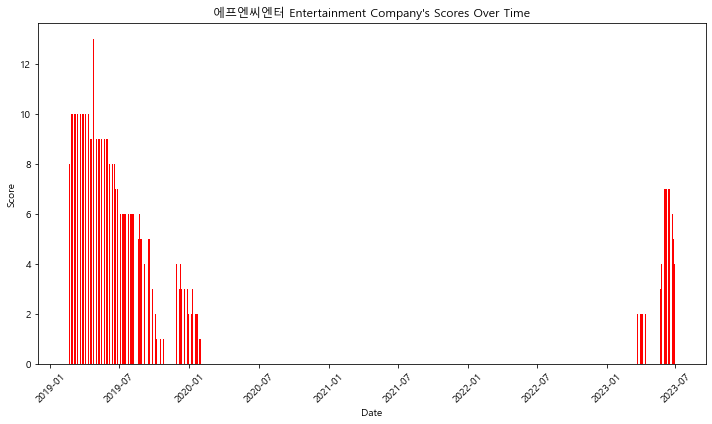

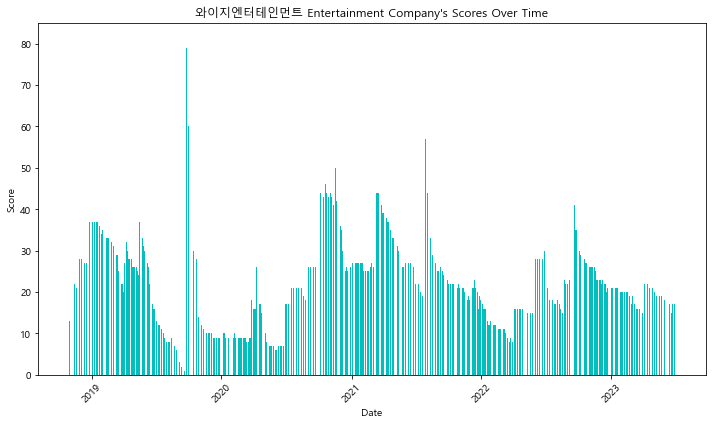

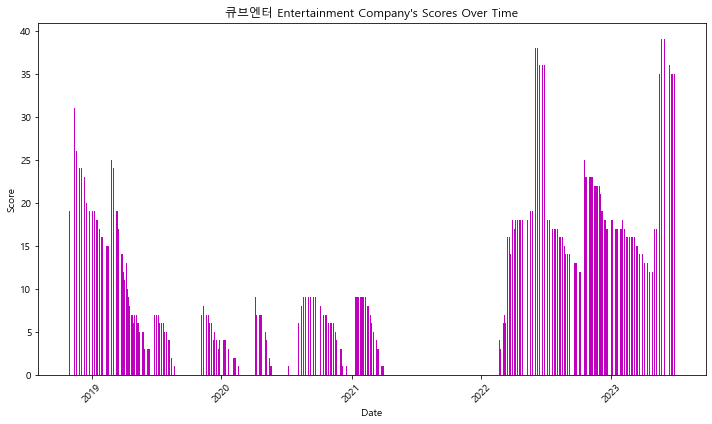

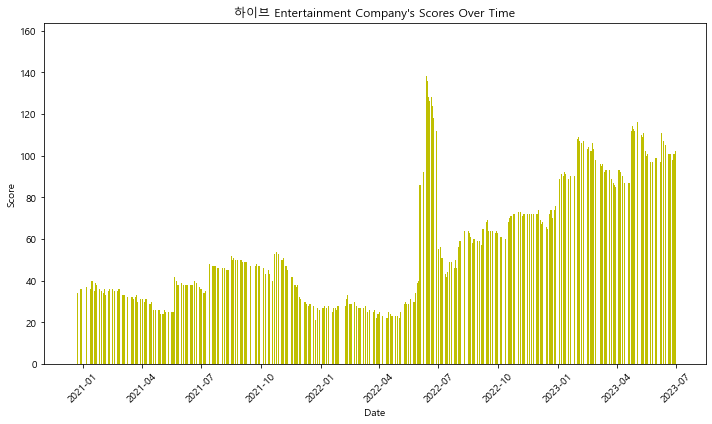

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime

# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv", encoding='UTF-8')


# 'Date' 열을 datetime 형식으로 변환합니다.
df_f['Date'] = pd.to_datetime(df_f['Date'])

# 'entertain' 열을 기준으로 데이터프레임을 그룹화합니다.
grouped = df_f.groupby('entertain')

# 엔터테인먼트 회사 리스트
ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']

# 날짜 범위 설정
start_date = datetime(2018, 10, 29)
end_date = datetime(2023, 6, 30)

# 색상 리스트 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 각 엔터테인먼트 회사별로 'ScoreSum'을 평균내고 따로 막대 그래프로 표시합니다.
for i, entertain in enumerate(ent_list):
    selected_group = grouped.get_group(entertain)

    # 날짜 범위 필터링
    filtered_data = selected_group[(selected_group['Date'] >= start_date) & (selected_group['Date'] <= end_date)]

    plt.figure(figsize=(10, 6))
    plt.bar(filtered_data['Date'], filtered_data['ScoreSum'], color=colors[i])
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.title(f"{entertain} Entertainment Company's Scores Over Time")
    plt.xticks(rotation=45)  # x 축 레이블 회전
    plt.tight_layout()  # 그래프 간격 조정
    plt.show()


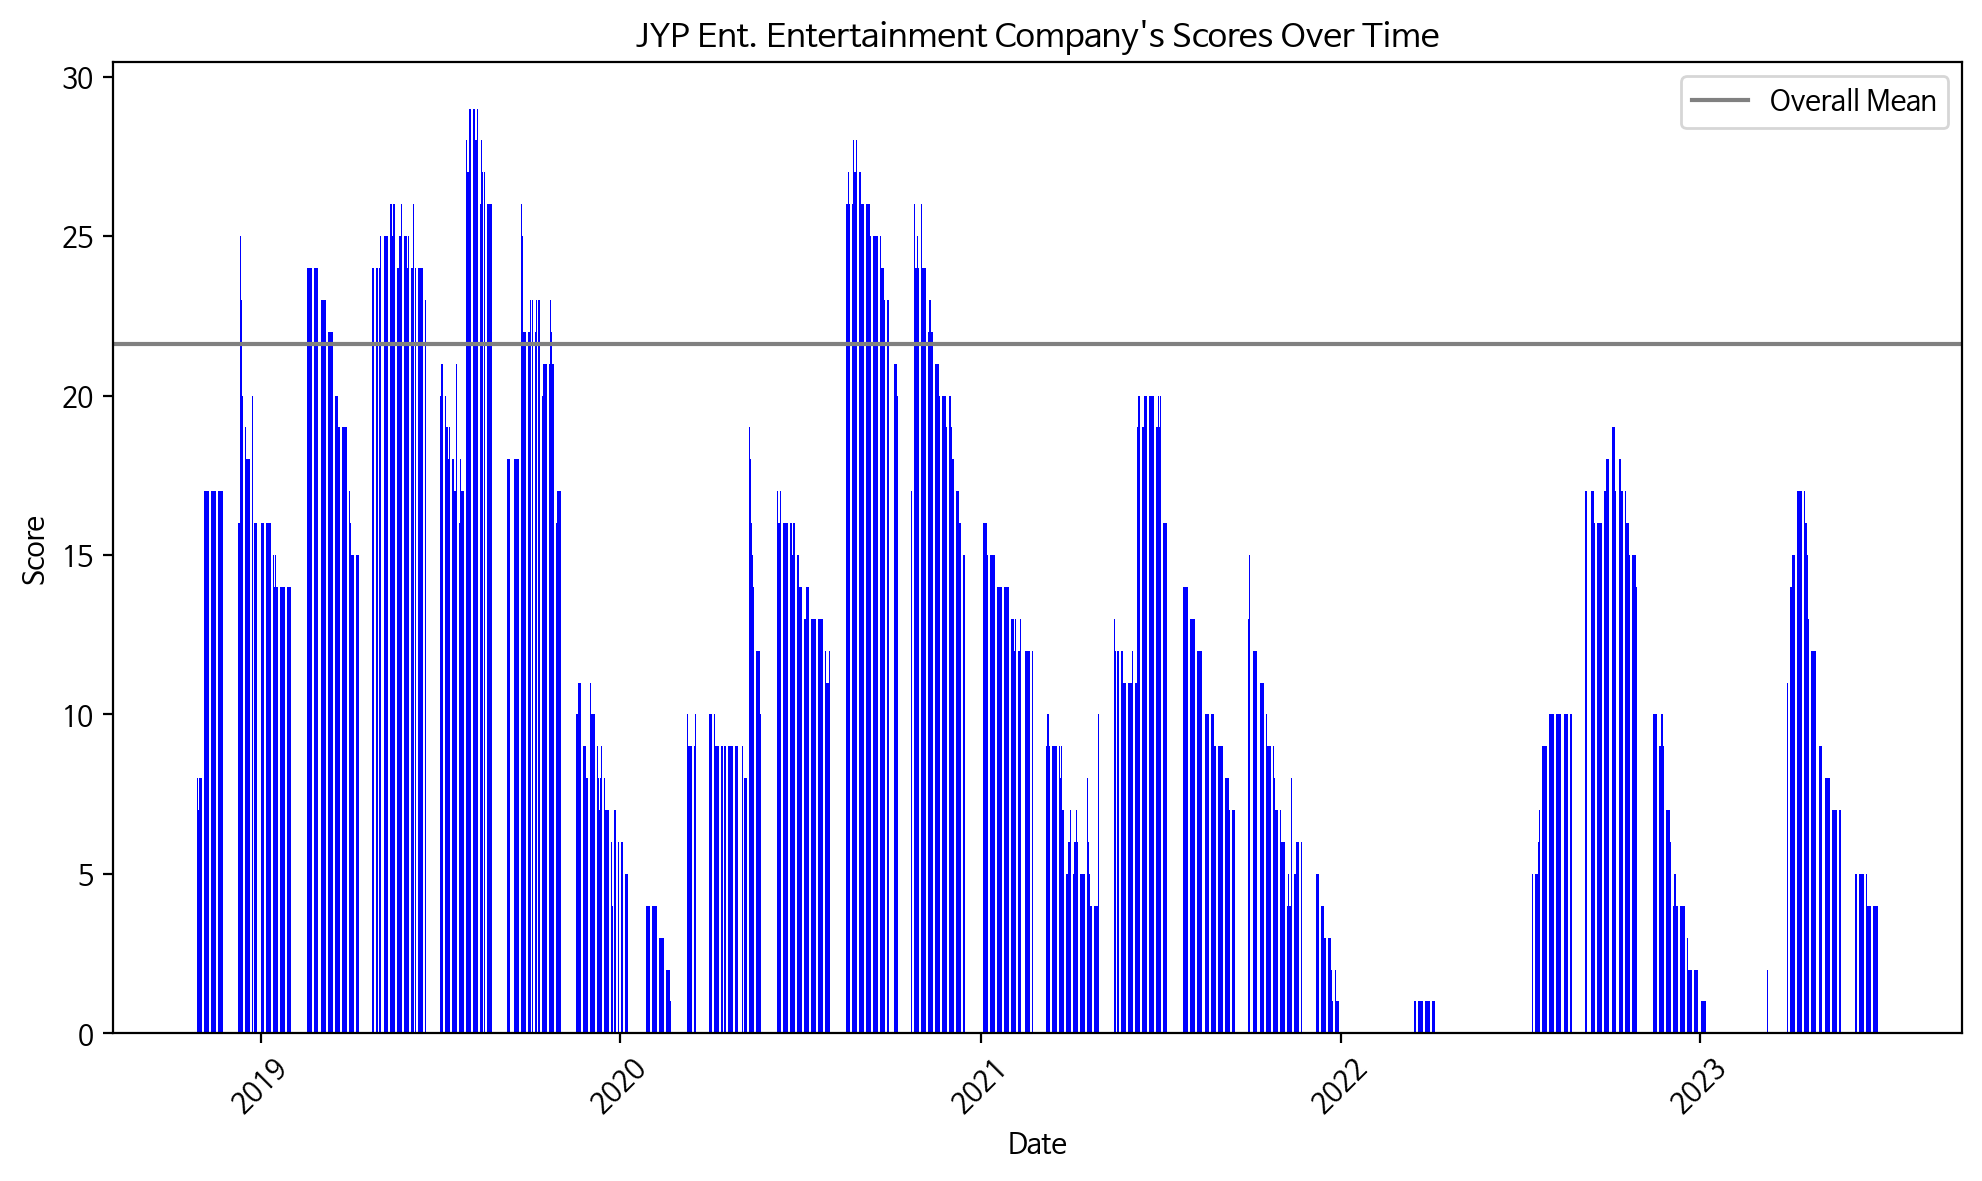

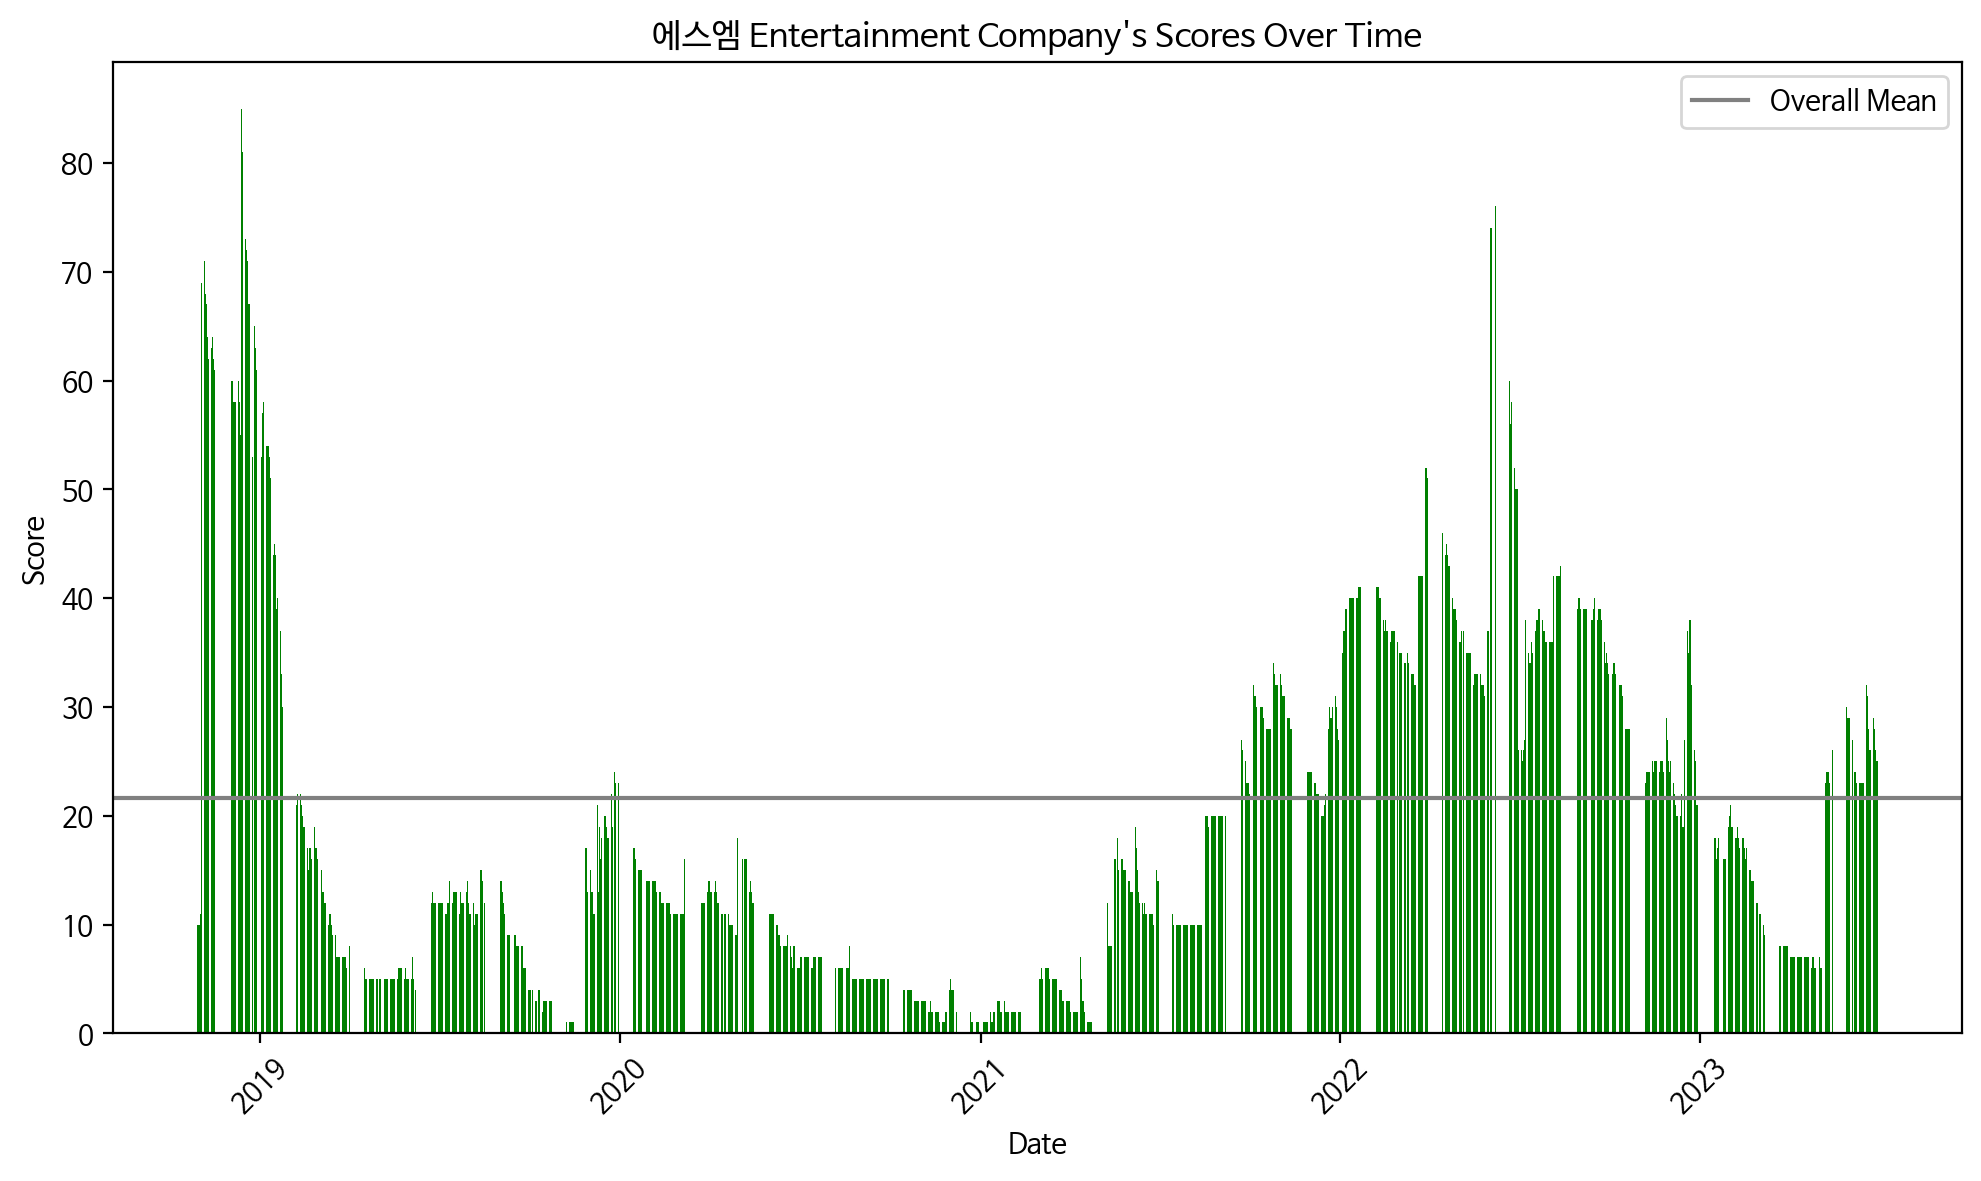

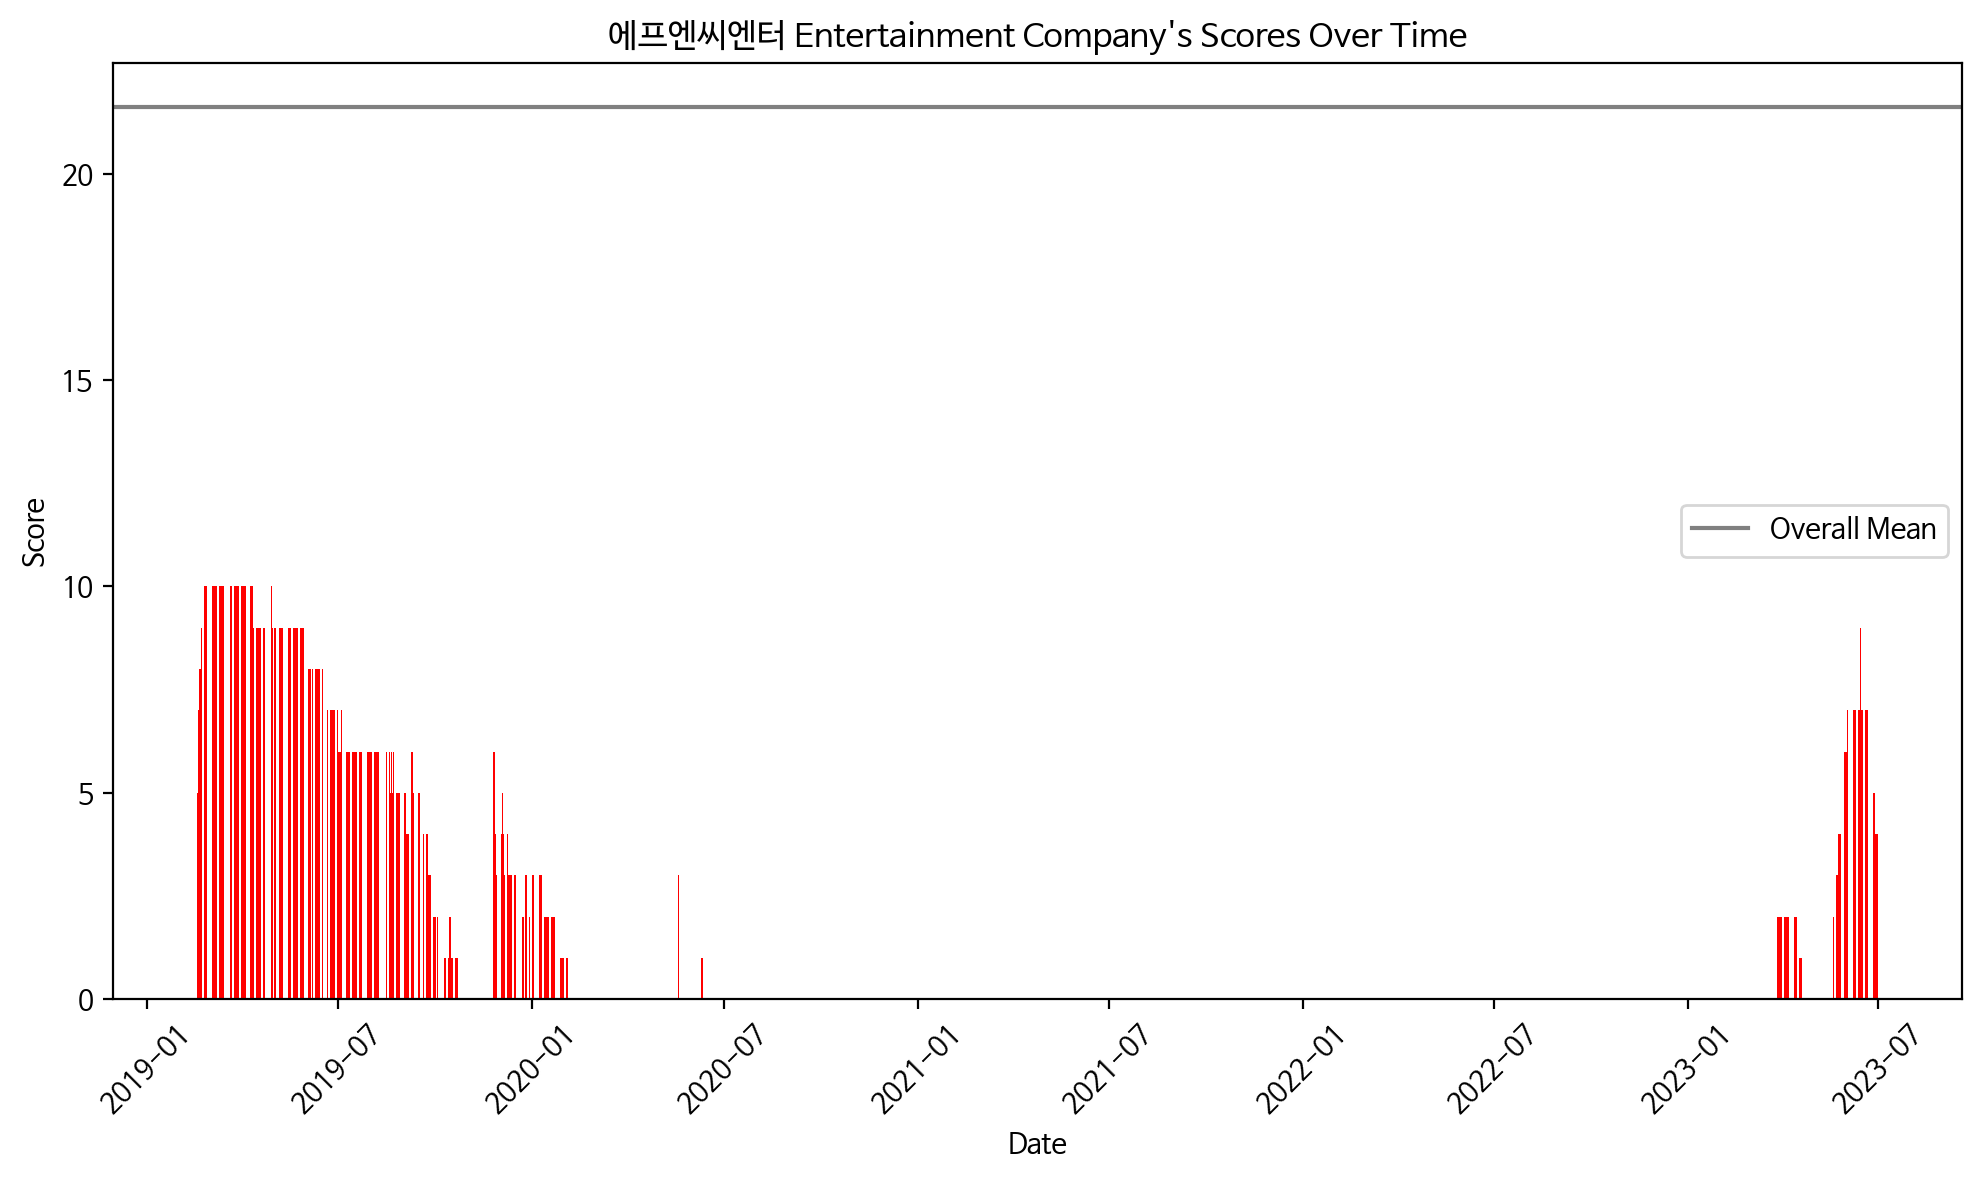

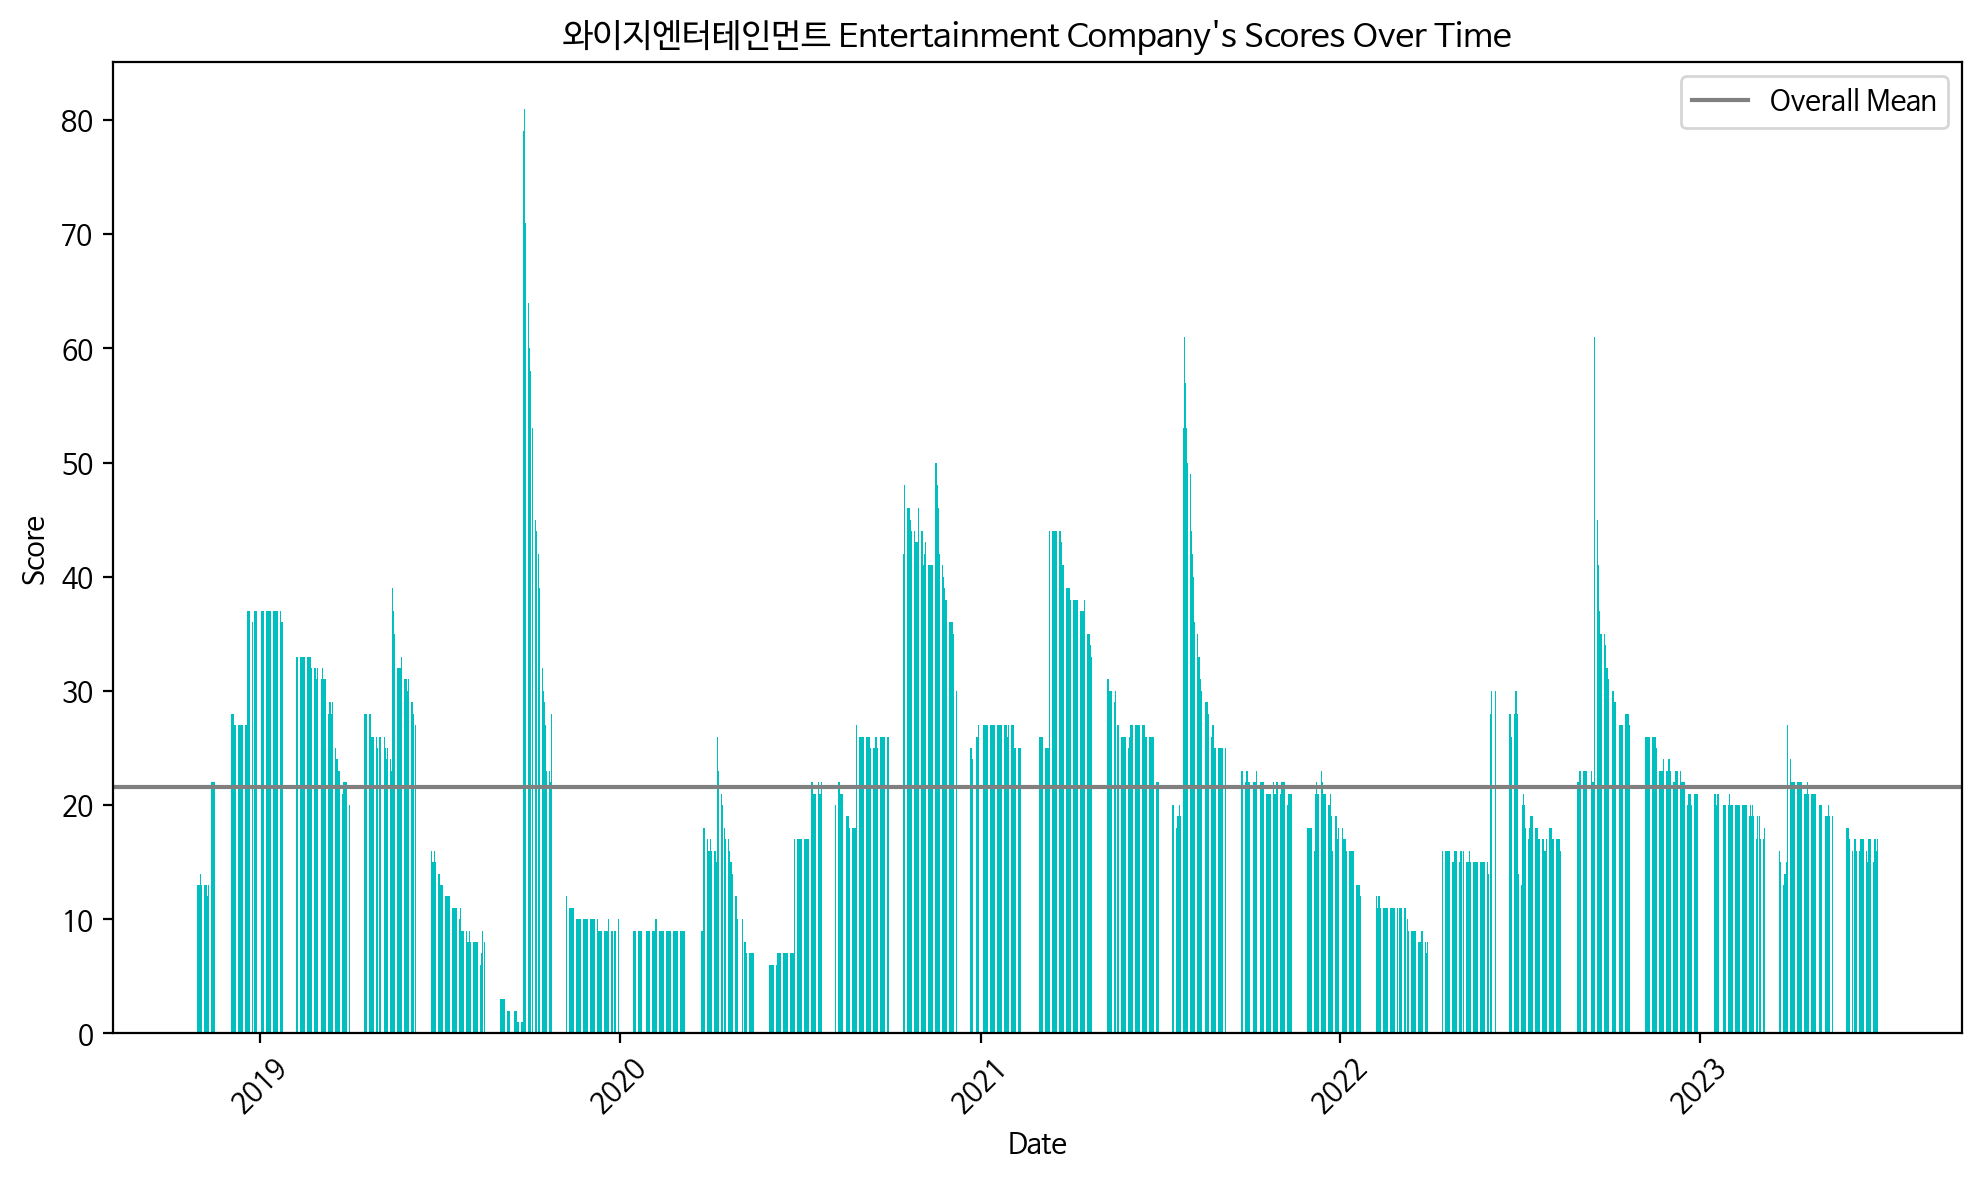

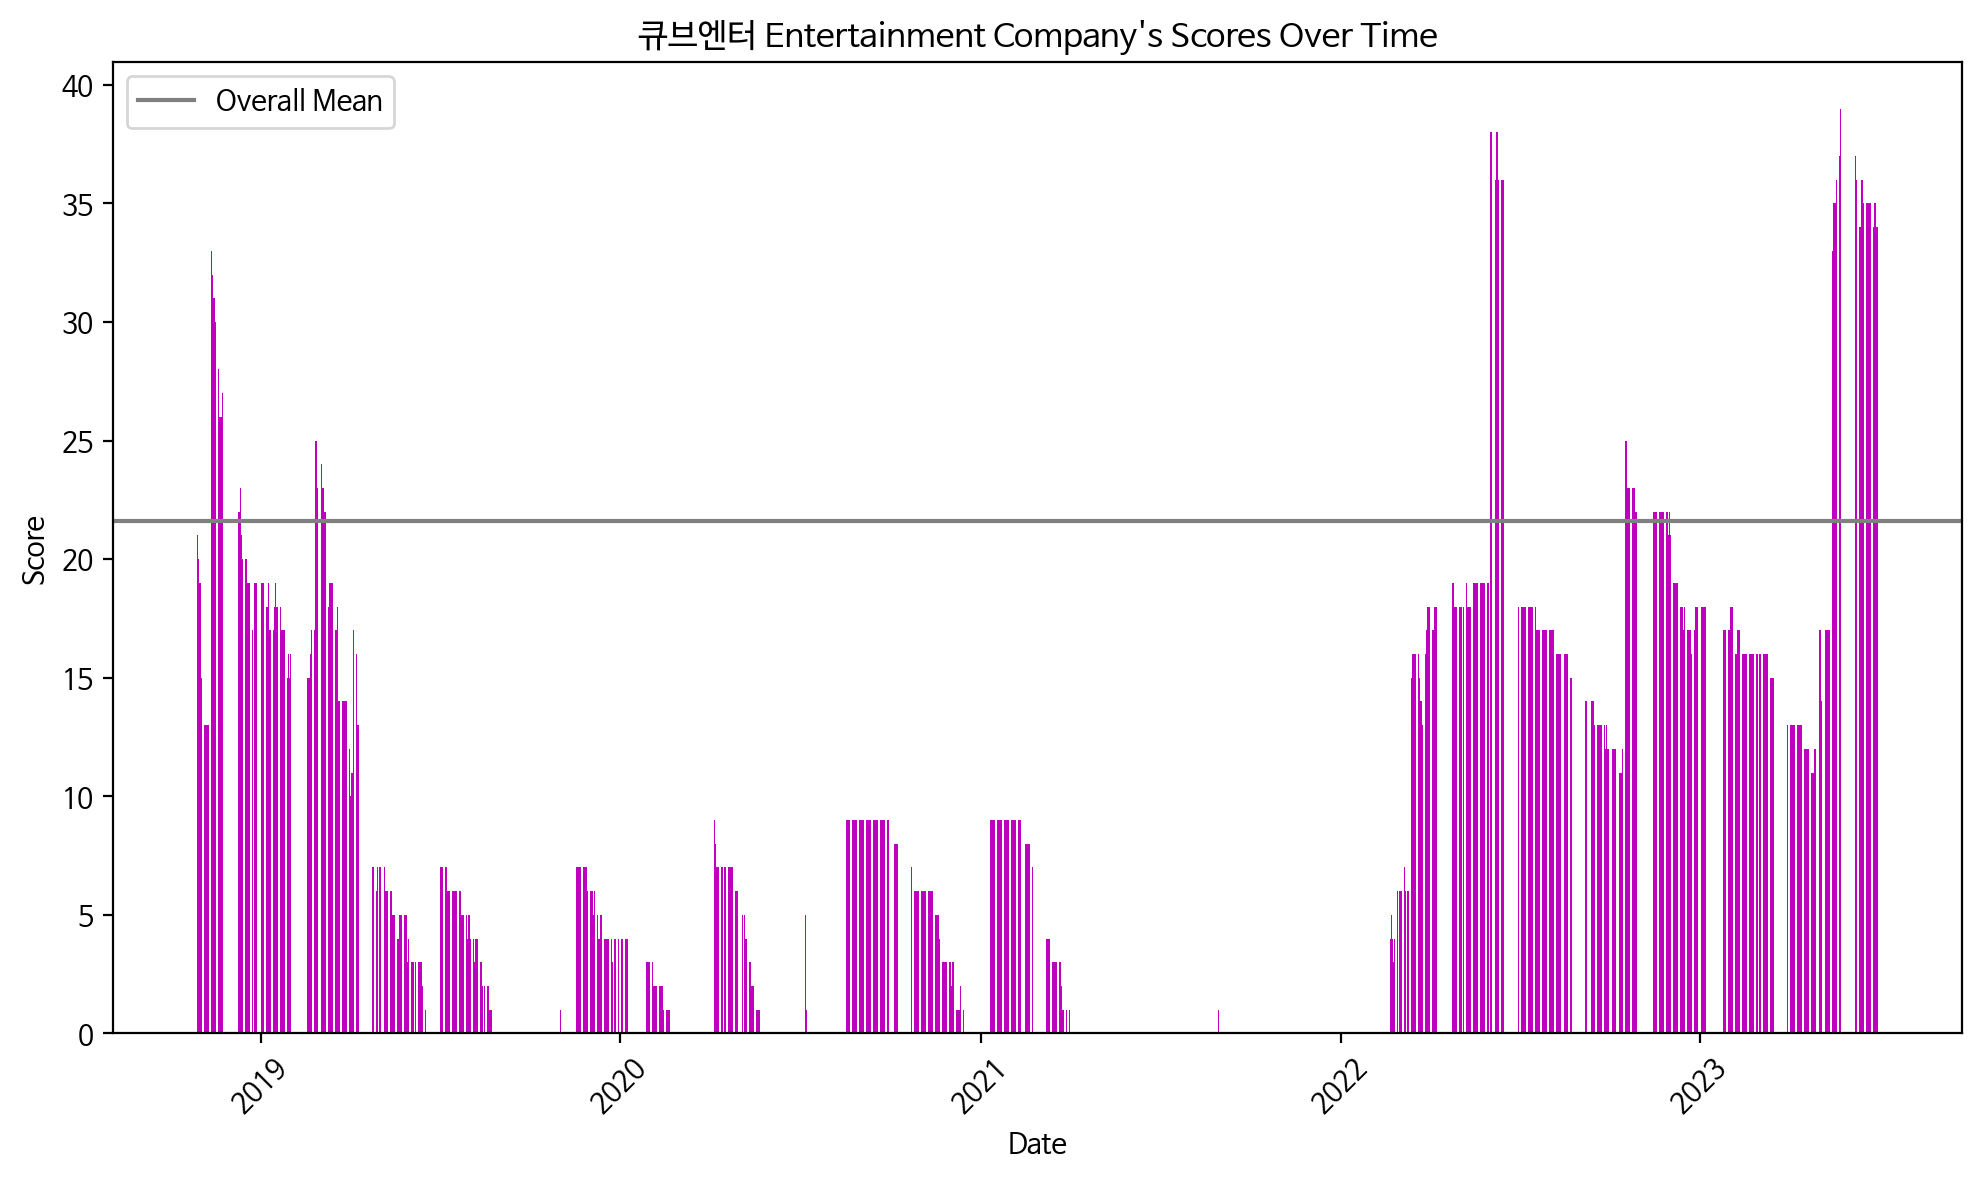

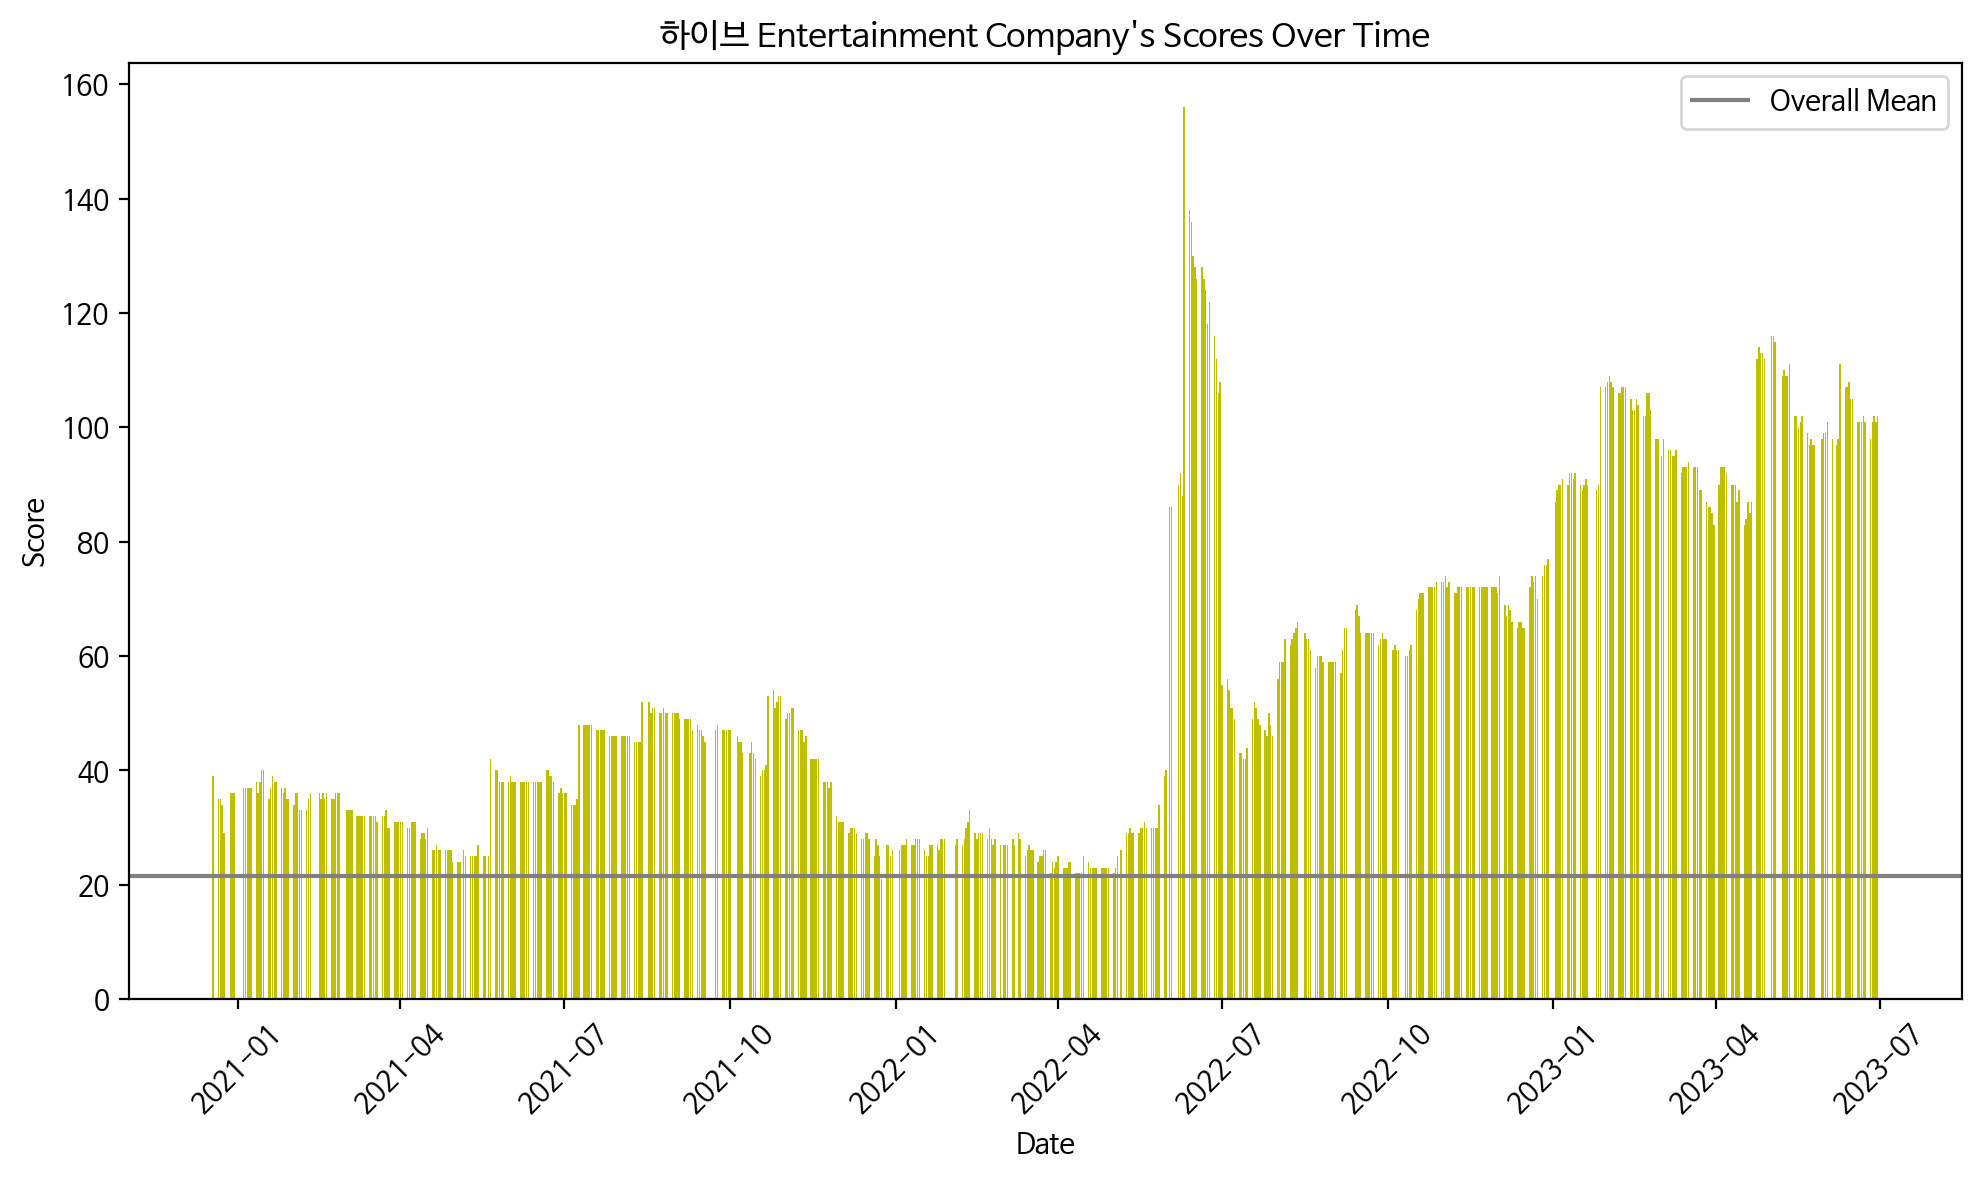

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime

# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv", encoding='UTF-8')


# 'Date' 열을 datetime 형식으로 변환합니다.
df_f['Date'] = pd.to_datetime(df_f['Date'])

# 'entertain' 열을 기준으로 데이터프레임을 그룹화합니다.
grouped = df_f.groupby('entertain')

# 엔터테인먼트 회사 리스트
ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']

# 날짜 범위 설정
start_date = datetime(2018, 10, 29)
end_date = datetime(2023, 6, 30)

# 색상 리스트 설정
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 전체의 평균을 계산합니다.
overall_mean = df_f[(df_f['Date'] >= start_date) & (df_f['Date'] <= end_date)]['ScoreSum'].mean()

# 각 엔터테인먼트 회사별로 'ScoreSum'을 평균내고 따로 막대 그래프로 표시합니다.
for i, entertain in enumerate(ent_list):
    selected_group = grouped.get_group(entertain)

    # 날짜 범위 필터링
    filtered_data = selected_group[(selected_group['Date'] >= start_date) & (selected_group['Date'] <= end_date)]

    plt.figure(figsize=(10, 6))
    plt.bar(filtered_data['Date'], filtered_data['ScoreSum'], color=colors[i])

    # 전체의 평균을 기준선으로 추가합니다.
    plt.axhline(y=overall_mean, color='Gray', linestyle='-', label='Overall Mean')

    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.title(f"{entertain} Entertainment Company's Scores Over Time")
    plt.legend()

    plt.xticks(rotation=45)  # x 축 레이블 회전
    plt.tight_layout()  # 그래프 간격 조정
    plt.show()


In [ ]:
import pandas as pd

# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv" )

# 'entertain' 열을 기준으로 데이터프레임을 그룹화합니다.
grouped = df_f.groupby('entertain')

# 엔터테인먼트 회사 리스트
ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']

# 결과를 저장할 딕셔너리 초기화
result = {'Entertainment': [], 'ScoreSum Mean': [], 'ScoreCount Mean': [], 'ScoreCount Count': [],'Chart In': [],'Chart In_self': [],'Ent Stock date': []}
# 'Date' 열의 고유값 개수를 계산합니다.
unique_date_count = df_f['Date'].nunique()

print("중복되지 않는 날짜의 갯수:", unique_date_count)

# 각 엔터테인먼트 회사별로 'ScoreSum'과 'ScoreCount'의 평균, 데이터 갯수를 계산합니다.
for entertain in ent_list:
    selected_group = grouped.get_group(entertain)

    score_sum_mean = selected_group['ScoreSum'].mean()
    score_count_mean = selected_group['ScoreCount'].mean()
    score_count_count = selected_group['ScoreCount'].count()
    Ent_Stock_Date = selected_group['Date'].count()

    result['Entertainment'].append(entertain)
    result['ScoreSum Mean'].append(score_sum_mean)
    result['ScoreCount Mean'].append(score_count_mean)
    result['ScoreCount Count'].append(score_count_count)
    result['Chart In'].append(score_count_count/unique_date_count)
    result['Chart In_self'].append(score_count_count/Ent_Stock_Date)
    result['Ent Stock date'].append(Ent_Stock_Date)
# 결과를 데이터프레임으로 변환하여 출력합니다.
result_df = pd.DataFrame(result)
print(result_df)


중복되지 않는 날짜의 갯수: 1850
  Entertainment  ScoreSum Mean  ScoreCount Mean  ScoreCount Count  Chart In  \
0      JYP Ent.       7.216757         1.216757              1850  1.000000   
1           에스엠      12.076757         2.396757              1850  1.000000   
2        에프엔씨엔터       0.823243         0.156757              1850  1.000000   
3     와이지엔터테인먼트      13.682703         2.189189              1850  1.000000   
4          큐브엔터       5.708649         0.931351              1850  1.000000   
5           하이브      55.226984         9.339683               630  0.340541   

   Chart In_self  Ent Stock date  
0            1.0            1850  
1            1.0            1850  
2            1.0            1850  
3            1.0            1850  
4            1.0            1850  
5            1.0             630  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
######################ver2
# 데이터를 불러옵니다.
df_f = pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/전처리 완료/music_score_emotion_stock_fillna.csv")

# 'entertain' 열을 기준으로 데이터프레임을 그룹화합니다.
grouped = df_f.groupby('entertain')

# 엔터테인먼트 회사 리스트
ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']

# 결과를 저장할 딕셔너리 초기화
result = {'Entertainment': [], 'ScoreSum Mean': [], 'ScoreCount Mean': [], 'ScoreCount Count': [], 'Chart In': [], 'Chart In_self': [], 'Ent Stock date': []}

# 'Date' 열의 고유값 개수를 계산합니다.
unique_date_count = df_f['Date'].nunique()

print("중복되지 않는 날짜의 갯수:", unique_date_count)

# 각 엔터테인먼트 회사별로 'ScoreSum'과 'ScoreCount'의 평균, 데이터 갯수를 계산합니다.
for entertain in ent_list:
    selected_group = grouped.get_group(entertain)

    score_sum_mean = selected_group['ScoreSum'].mean()  # 'ScoreSum' 열의 평균을 계산합니다.
    score_count_mean = selected_group['ScoreCount'].mean()  # 'ScoreCount' 열의 평균을 계산합니다.
    score_count_count = selected_group[selected_group['ScoreCount'] > 0]['ScoreCount'].count()  # 'ScoreCount' 열에서 0보다 큰 데이터의 개수를 계산합니다.
    Ent_Stock_Date = selected_group['Date'].count()  # 해당 엔터테인먼트 회사의 데이터 갯수를 계산합니다.

    result['Entertainment'].append(entertain)
    result['ScoreSum Mean'].append(score_sum_mean)
    result['ScoreCount Mean'].append(score_count_mean)
    result['ScoreCount Count'].append(score_count_count)
    result['Chart In'].append(score_count_count / unique_date_count)  # 'ScoreCount' 열이 0보다 큰 데이터의 비율을 계산합니다.
    result['Chart In_self'].append(score_count_count / Ent_Stock_Date)  # 'ScoreCount' 열이 0보다 큰 데이터의 비율을 해당 엔터테인먼트 회사의 데이터 수로 나눕니다.
    result['Ent Stock date'].append(Ent_Stock_Date)

# 결과를 데이터프레임으로 변환하여 출력합니다.
result_df = pd.DataFrame(result)
print(result_df)


중복되지 않는 날짜의 갯수: 1850
  Entertainment  ScoreSum Mean  ScoreCount Mean  ScoreCount Count  Chart In  \
0      JYP Ent.       7.216757         1.216757              1003  0.542162   
1           에스엠      12.076757         2.396757              1147  0.620000   
2        에프엔씨엔터       0.823243         0.156757               270  0.145946   
3     와이지엔터테인먼트      13.682703         2.189189              1155  0.624324   
4          큐브엔터       5.708649         0.931351               792  0.428108   
5           하이브      55.226984         9.339683               625  0.337838   

   Chart In_self  Ent Stock date  
0       0.542162            1850  
1       0.620000            1850  
2       0.145946            1850  
3       0.624324            1850  
4       0.428108            1850  
5       0.992063             630  


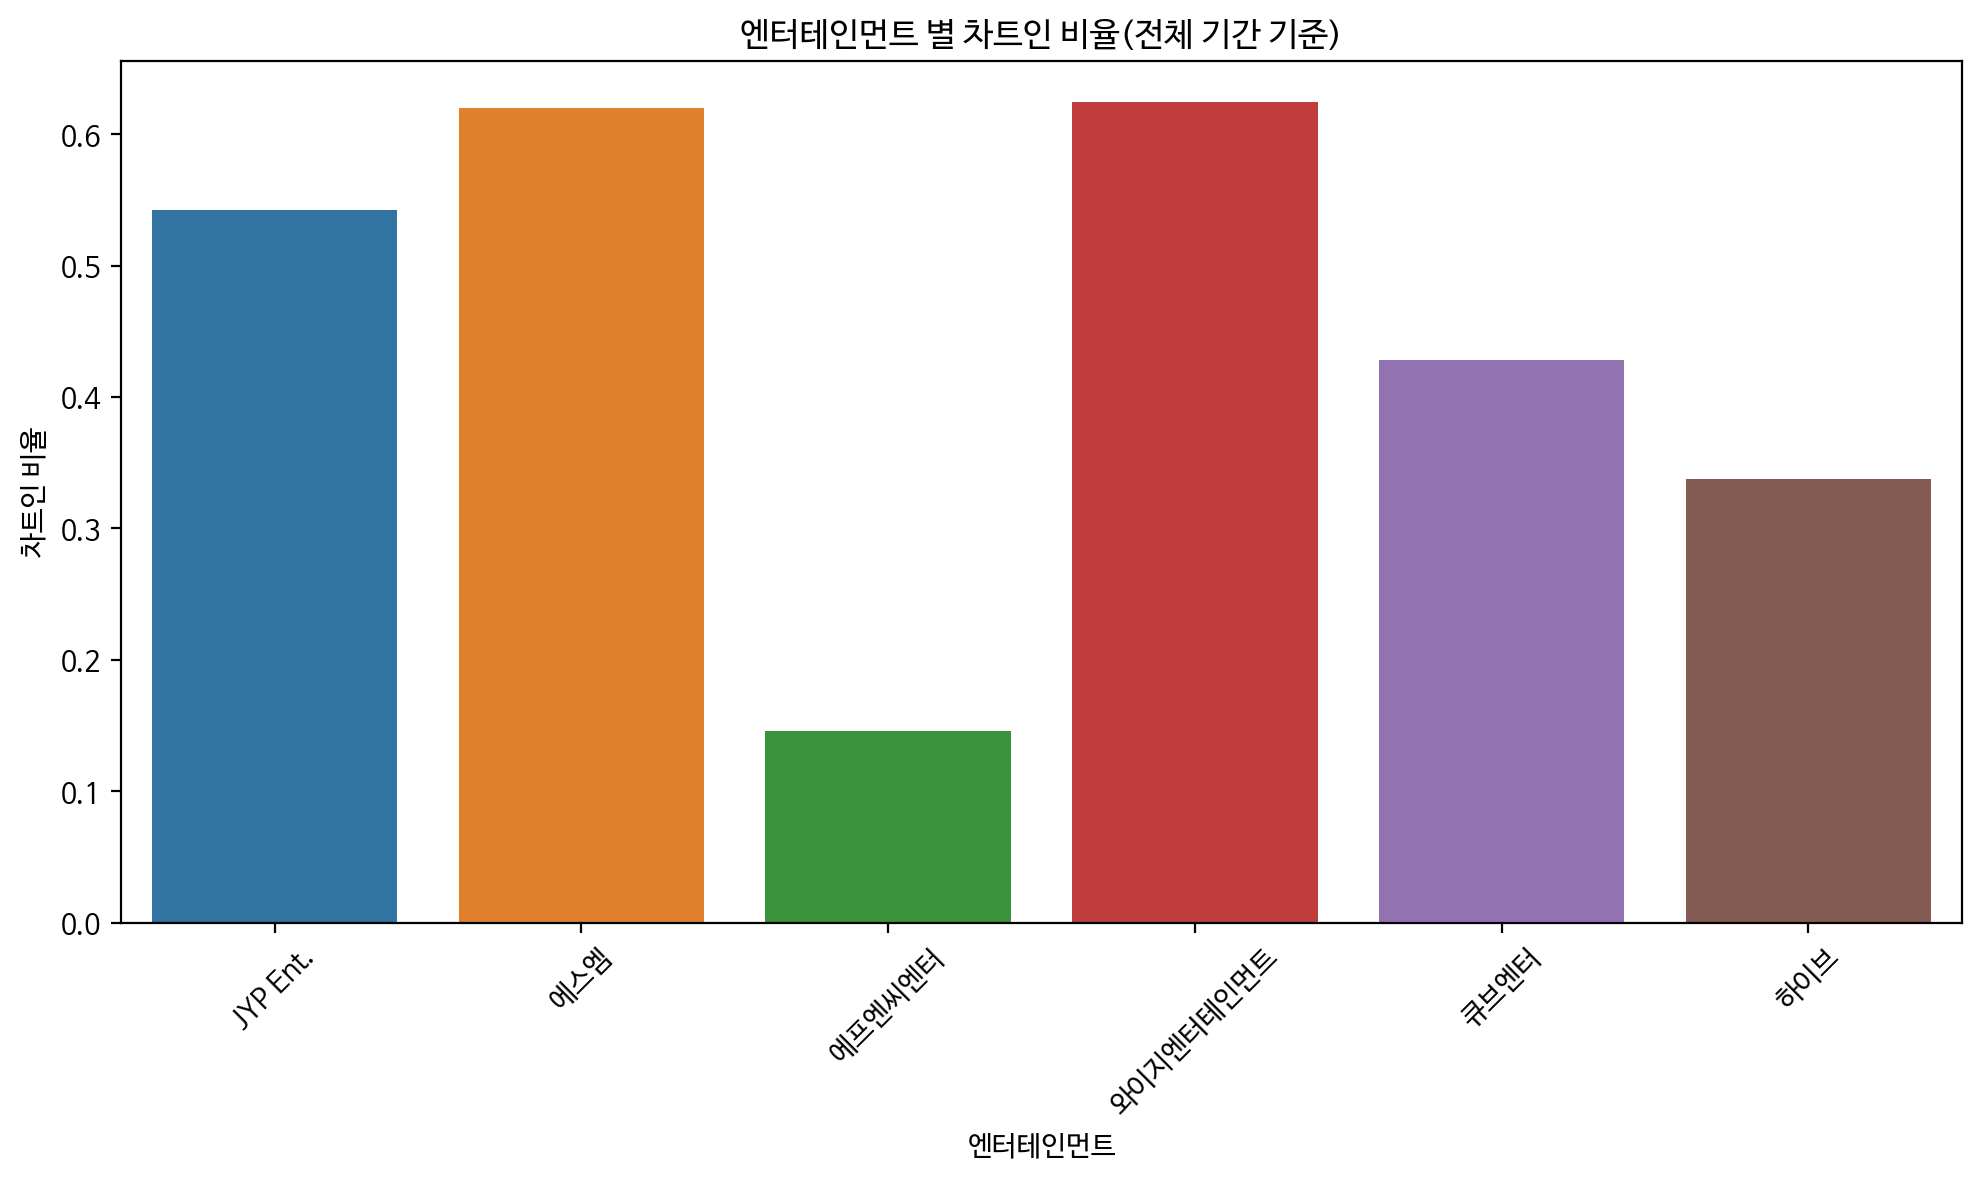

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = result_df.groupby('Entertainment').sum()

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='Chart In', data=grouped_df)

plt.title('엔터테인먼트 별 차트인 비율(전체 기간 기준)')
plt.xlabel('엔터테인먼트')
plt.ylabel('차트인 비율')
plt.xticks(rotation=45)  # x축 라벨 회전

plt.tight_layout()
plt.show()


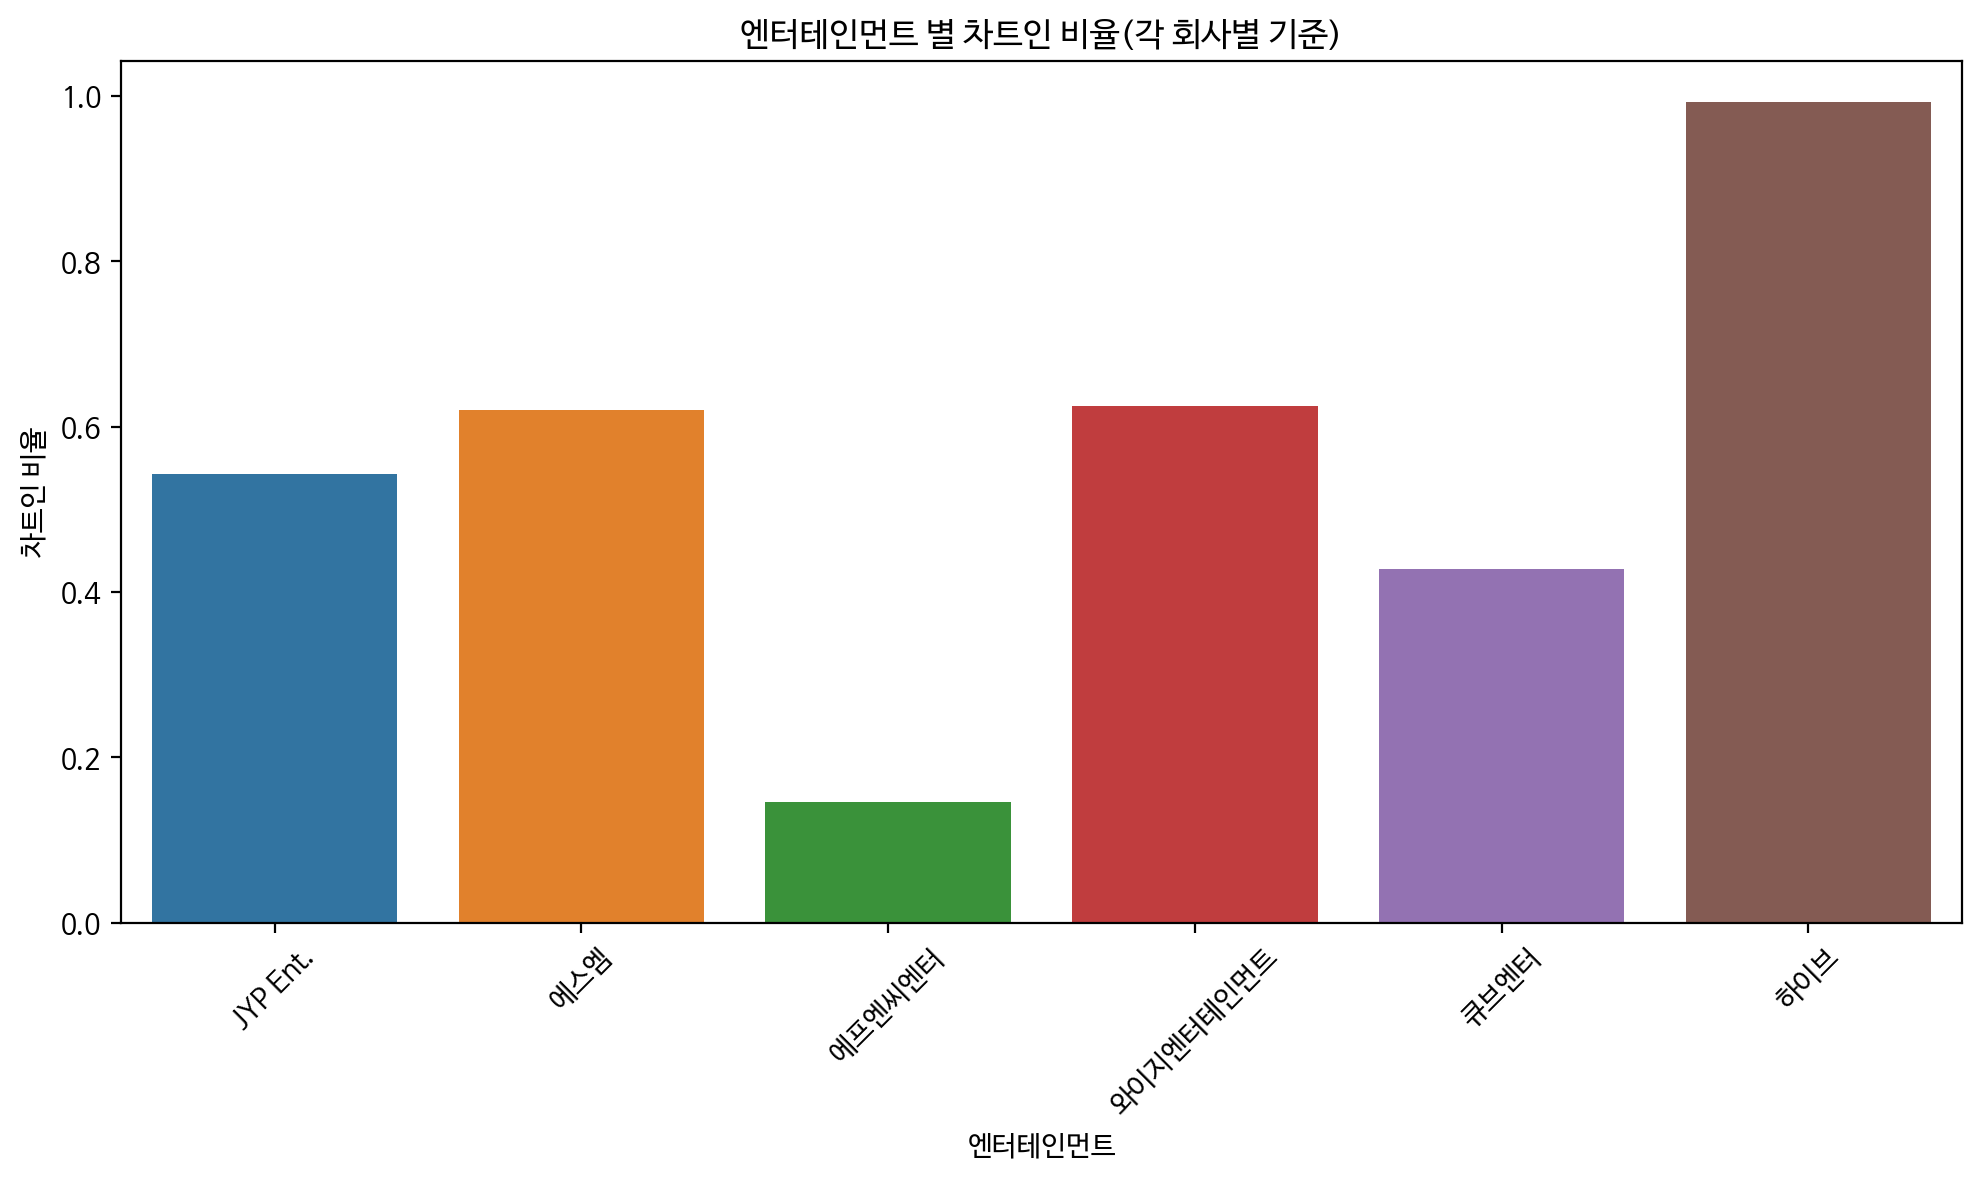

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = result_df.groupby('Entertainment').sum()

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='Chart In_self', data=grouped_df)

plt.title('엔터테인먼트 별 차트인 비율(각 회사별 기준)')
plt.xlabel('엔터테인먼트')
plt.ylabel('차트인 비율')
plt.xticks(rotation=45)  # x축 라벨 회전

plt.tight_layout()
plt.show()


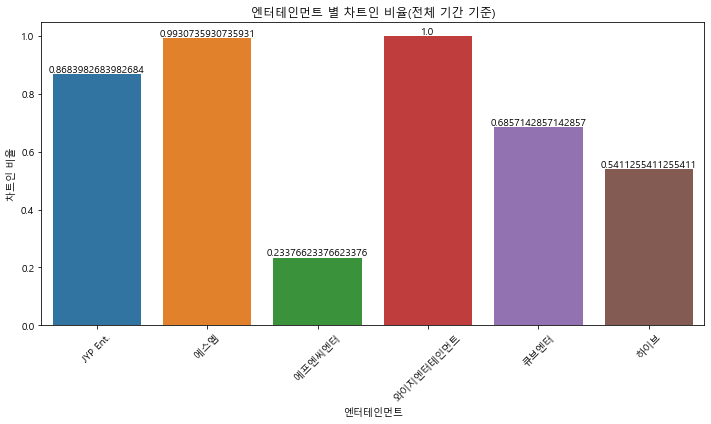

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = result_df.groupby('Entertainment').sum()

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='Chart In', data=grouped_df)

plt.title('엔터테인먼트 별 차트인 비율(전체 기간 기준)')
plt.xlabel('엔터테인먼트')
plt.ylabel('차트인 비율')
plt.xticks(rotation=45)  # x축 라벨 회전

# 데이터 값을 그래프 위에 표시
for i, value in enumerate(grouped_df['Chart In']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


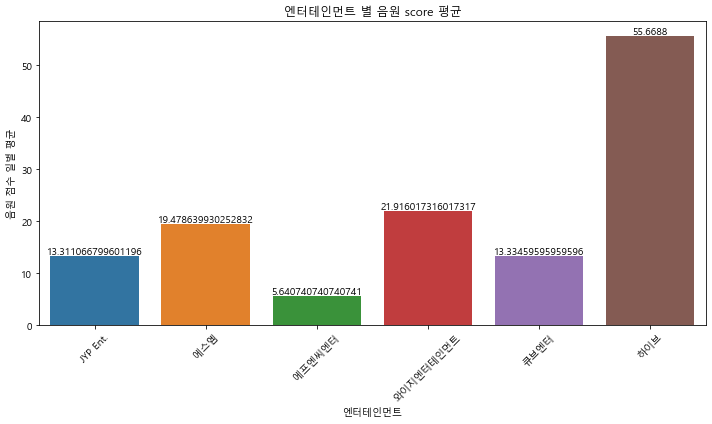

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = result_df.groupby('Entertainment').sum()
#ScoreSum Mean  ScoreCount Mean  ScoreCount Count  \
# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='ScoreSum Mean', data=grouped_df)

plt.title('엔터테인먼트 별 음원 score 평균')
plt.xlabel('엔터테인먼트')
plt.ylabel('음원 점수 일별 평균')
plt.xticks(rotation=45)  # x축 라벨 회전

# 데이터 값을 그래프 위에 표시
for i, value in enumerate(grouped_df['ScoreSum Mean']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


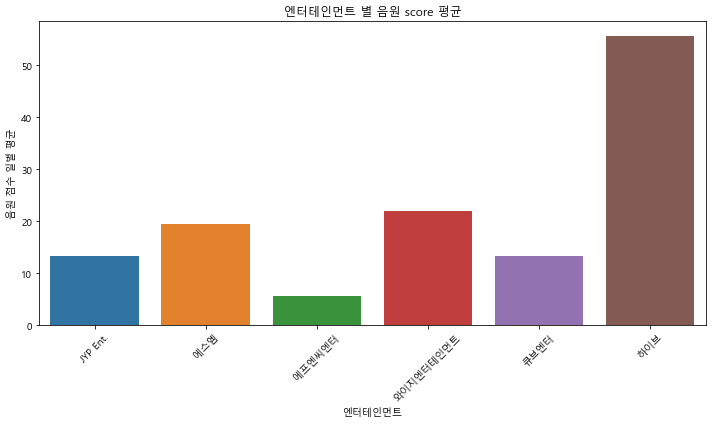

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



grouped_df = result_df.groupby('Entertainment').sum()
#ScoreSum Mean  ScoreCount Mean  ScoreCount Count  \
# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='ScoreSum Mean', data=grouped_df)

plt.title('엔터테인먼트 별 음원 score 평균')
plt.xlabel('엔터테인먼트')
plt.ylabel('음원 점수 일별 평균')
plt.xticks(rotation=45)  # x축 라벨 회전


plt.tight_layout()
plt.show()


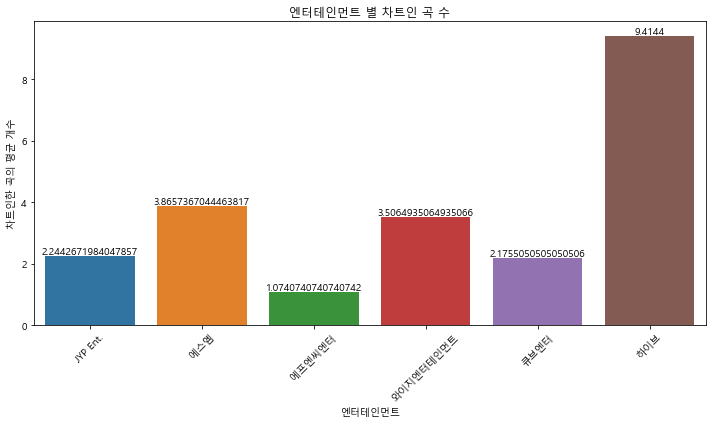

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



grouped_df = result_df.groupby('Entertainment').sum()
#ScoreSum Mean  ScoreCount Mean  ScoreCount Count  \
# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='ScoreCount Mean', data=grouped_df)

plt.title('엔터테인먼트 별 차트인 곡 수')
plt.xlabel('엔터테인먼트')
plt.ylabel('차트인한 곡의 평균 개수')
plt.xticks(rotation=45)  # x축 라벨 회전

# 데이터 값을 그래프 위에 표시
for i, value in enumerate(grouped_df['ScoreCount Mean']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


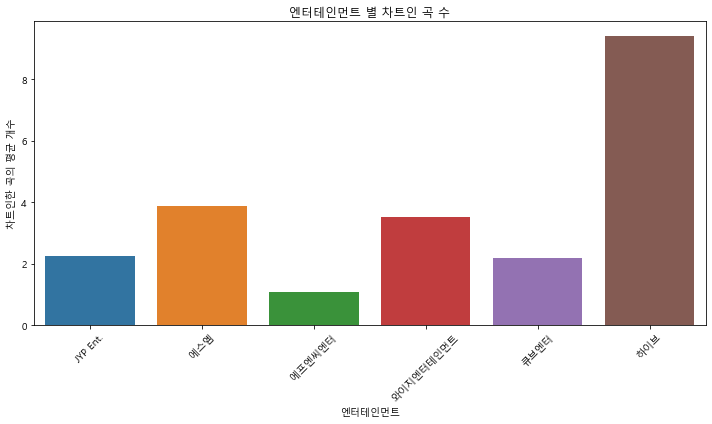

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = result_df.groupby('Entertainment').sum()
#ScoreSum Mean  ScoreCount Mean  ScoreCount Count  \
# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='ScoreCount Mean', data=grouped_df)

plt.title('엔터테인먼트 별 차트인 곡 수')
plt.xlabel('엔터테인먼트')
plt.ylabel('차트인한 곡의 평균 개수')
plt.xticks(rotation=45)  # x축 라벨 회전

plt.tight_layout()
plt.show()


In [ ]:
df_f.tail()

,Date,종가,시가,고가,저가,거래량,entertain,ScoreSum,ScoreCount,감정
4987,2018-11-02,"38,950","37,550","39,200","37,450","321,153",와이지엔터테인먼트,13.0,2,0.0
4988,2018-11-01,"37,300","37,000","38,400","36,500","254,854",와이지엔터테인먼트,14.0,2,0.0
4989,2018-10-31,"36,850","38,000","38,050","36,500","192,938",와이지엔터테인먼트,13.0,2,0.0
4990,2018-10-30,"38,000","35,500","38,000","33,800","289,948",와이지엔터테인먼트,13.0,2,0.0
4991,2018-10-29,"35,950","38,050","38,050","35,450","295,405",와이지엔터테인먼트,13.0,2,0.0


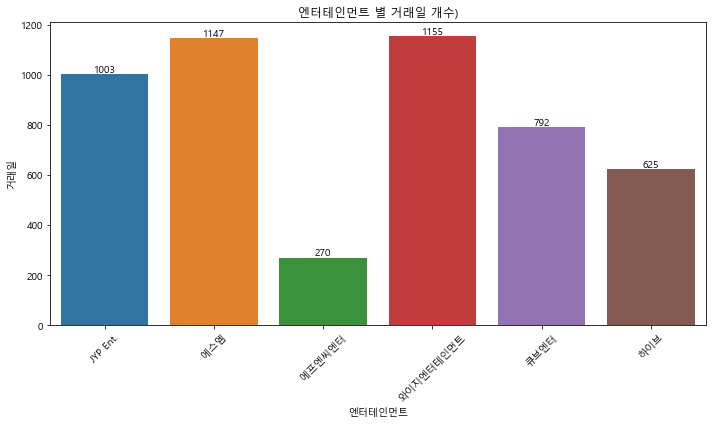

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = result_df.groupby('Entertainment').sum()

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='Ent Stock date', data=grouped_df)

plt.title('엔터테인먼트 별 거래일 개수)')
plt.xlabel('엔터테인먼트')
plt.ylabel('거래일')
plt.xticks(rotation=45)  # x축 라벨 회전
for i, value in enumerate(grouped_df['Ent Stock date']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


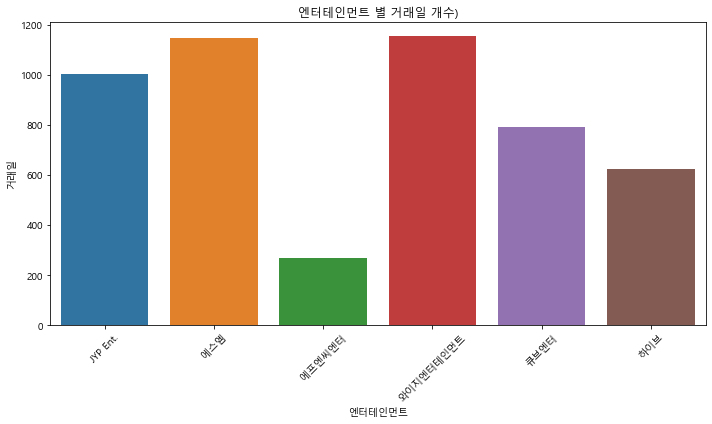

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


grouped_df = result_df.groupby('Entertainment').sum()

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_df.index, y='Ent Stock date', data=grouped_df)

plt.title('엔터테인먼트 별 거래일 개수)')
plt.xlabel('엔터테인먼트')
plt.ylabel('거래일')
plt.xticks(rotation=45)  # x축 라벨 회전

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


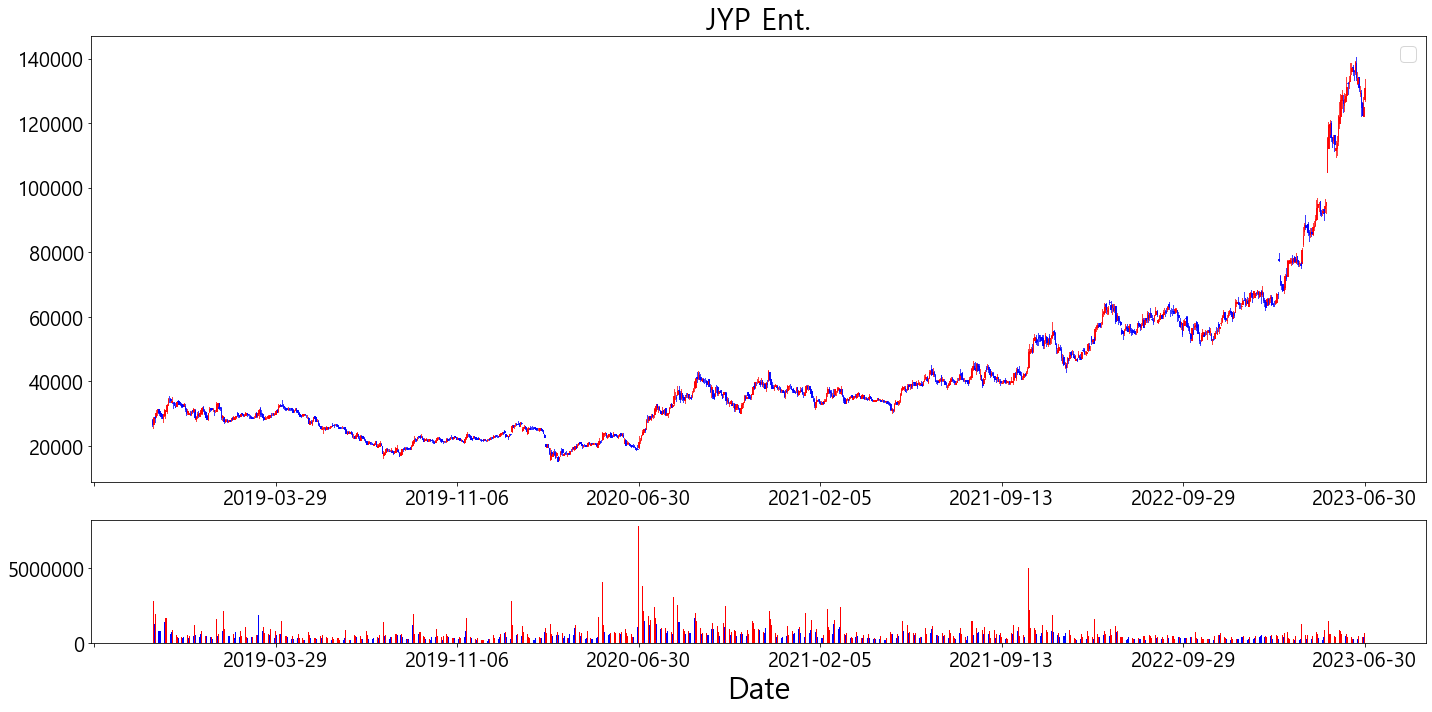

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc

pdata=df_f
pdata= df_f.set_index('Date')

pdata['Date'] = pd.to_datetime(df_f['Date'])
pdata['시가'] = pdata['시가'].str.replace(',', '').astype(float)
pdata['고가'] = pdata['고가'].str.replace(',', '').astype(float)
pdata['저가'] = pdata['저가'].str.replace(',', '').astype(float)
pdata['종가'] = pdata['종가'].str.replace(',', '').astype(float)
pdata['거래량'] = pdata['거래량'].str.replace(',', '').astype(int)  # 숫자로 변환
#ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']
for ent in ent_list:
    filtered_data = pdata[pdata['entertain'] == 'JYP Ent.' ]
    pdata = filtered_data

# 그래프 구역 나누기
fig = plt.figure(figsize=(20, 10))
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4, sharex=top_axes)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 인덱스 설정
idx = pdata.index.astype('str')

# 캔들차트 그리기
candlestick2_ohlc(top_axes, pdata['시가'], pdata['고가'],
                  pdata['저가'], pdata['종가'],
                  width=0.5, colorup='r', colordown='b')

# 거래량 날짜 지정
color_func = lambda x: 'r' if x >= 0 else 'b'
color_list = list(pdata['거래량'].diff().fillna(0).apply(color_func))
bottom_axes.bar(idx, pdata['거래량'], width=0.5,
                align='center',
                color=color_list)

# 그래프 title 지정

top_axes.set_title('JYP Ent.',fontsize=30)
# X축 티커 숫자 20개로 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=30)
top_axes.legend(fontsize=20)
top_axes.tick_params(axis='both', labelsize=20)
bottom_axes.tick_params(axis='both', labelsize=20)
plt.tight_layout()
top_axes.invert_xaxis()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


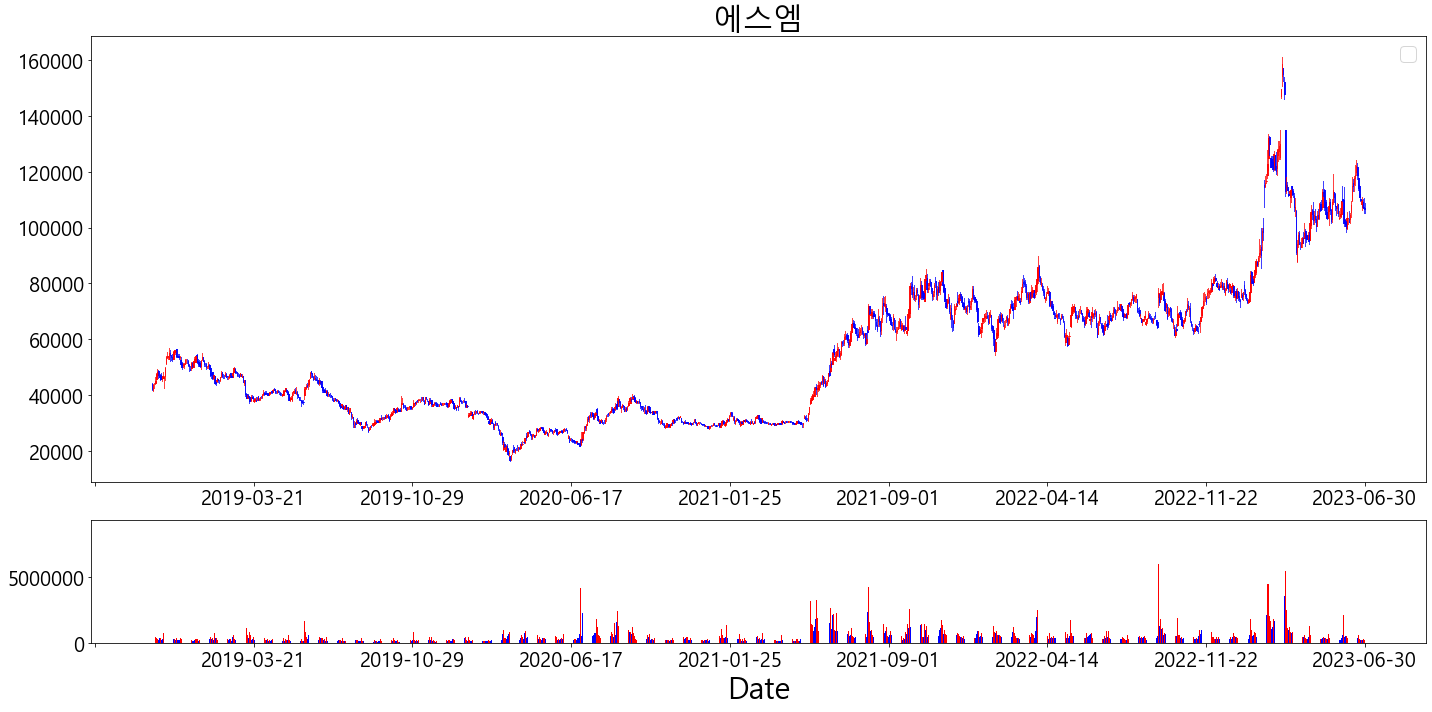

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc

pdata=df_f
pdata= df_f.set_index('Date')

pdata['Date'] = pd.to_datetime(df_f['Date'])
pdata['시가'] = pdata['시가'].str.replace(',', '').astype(float)
pdata['고가'] = pdata['고가'].str.replace(',', '').astype(float)
pdata['저가'] = pdata['저가'].str.replace(',', '').astype(float)
pdata['종가'] = pdata['종가'].str.replace(',', '').astype(float)
pdata['거래량'] = pdata['거래량'].str.replace(',', '').astype(int)  # 숫자로 변환
#ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']
for ent in ent_list:
    filtered_data = pdata[pdata['entertain'] == '에스엠' ]
    pdata = filtered_data

# 그래프 구역 나누기
fig = plt.figure(figsize=(20, 10))
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4, sharex=top_axes)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 인덱스 설정
idx = pdata.index.astype('str')

# 캔들차트 그리기
candlestick2_ohlc(top_axes, pdata['시가'], pdata['고가'],
                  pdata['저가'], pdata['종가'],
                  width=0.5, colorup='r', colordown='b')

# 거래량 날짜 지정
color_func = lambda x: 'r' if x >= 0 else 'b'
color_list = list(pdata['거래량'].diff().fillna(0).apply(color_func))
bottom_axes.bar(idx, pdata['거래량'], width=0.5,
                align='center',
                color=color_list)

# 그래프 title 지정

top_axes.set_title('에스엠',fontsize=30)
# X축 티커 숫자 20개로 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=30)
top_axes.legend(fontsize=20)
top_axes.tick_params(axis='both', labelsize=20)
bottom_axes.tick_params(axis='both', labelsize=20)
plt.tight_layout()
top_axes.invert_xaxis()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


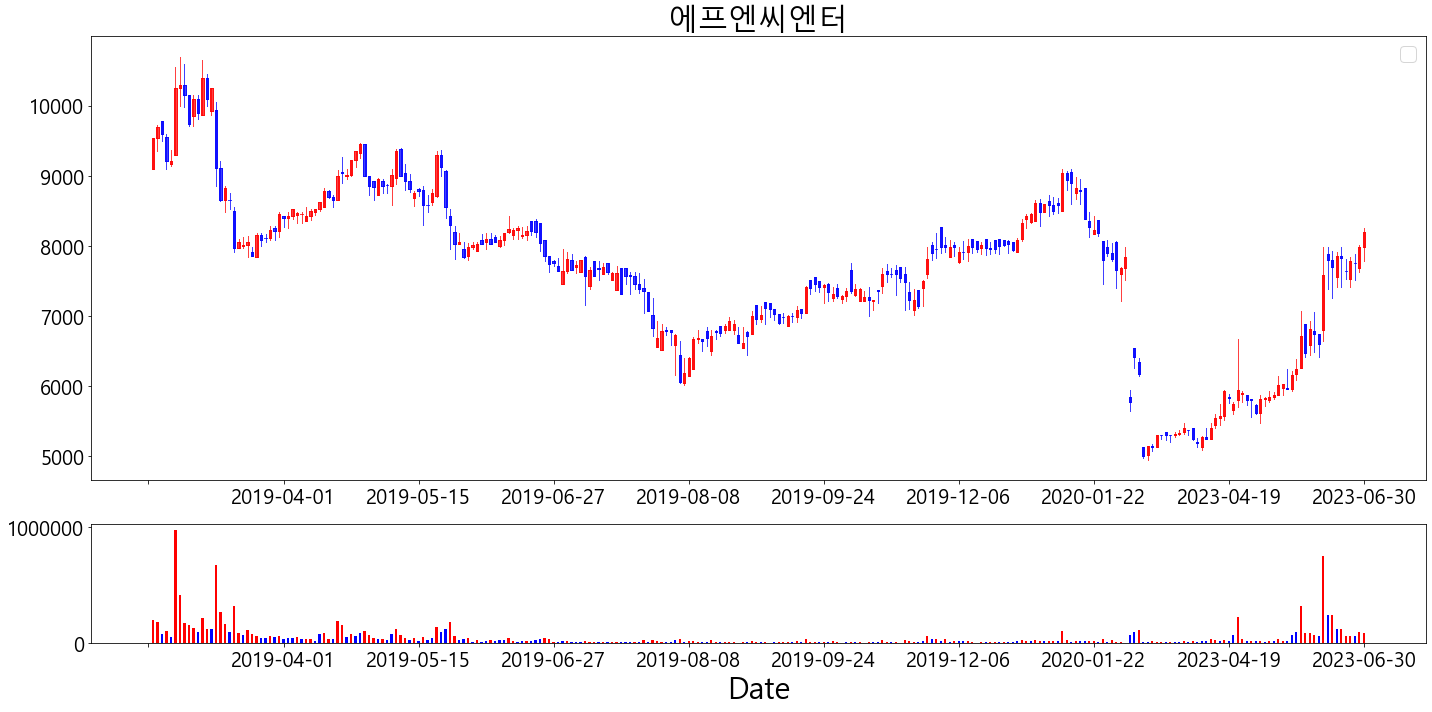

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc

pdata=df_f
pdata= df_f.set_index('Date')

pdata['Date'] = pd.to_datetime(df_f['Date'])
pdata['시가'] = pdata['시가'].str.replace(',', '').astype(float)
pdata['고가'] = pdata['고가'].str.replace(',', '').astype(float)
pdata['저가'] = pdata['저가'].str.replace(',', '').astype(float)
pdata['종가'] = pdata['종가'].str.replace(',', '').astype(float)
pdata['거래량'] = pdata['거래량'].str.replace(',', '').astype(int)  # 숫자로 변환
#ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']
for ent in ent_list:
    filtered_data = pdata[pdata['entertain'] == '에프엔씨엔터' ]
    pdata = filtered_data

# 그래프 구역 나누기
fig = plt.figure(figsize=(20, 10))
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4, sharex=top_axes)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 인덱스 설정
idx = pdata.index.astype('str')

# 캔들차트 그리기
candlestick2_ohlc(top_axes, pdata['시가'], pdata['고가'],
                  pdata['저가'], pdata['종가'],
                  width=0.5, colorup='r', colordown='b')

# 거래량 날짜 지정
color_func = lambda x: 'r' if x >= 0 else 'b'
color_list = list(pdata['거래량'].diff().fillna(0).apply(color_func))
bottom_axes.bar(idx, pdata['거래량'], width=0.5,
                align='center',
                color=color_list)

# 그래프 title 지정

top_axes.set_title('에프엔씨엔터',fontsize=30)
# X축 티커 숫자 20개로 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=30)
top_axes.legend(fontsize=20)
top_axes.tick_params(axis='both', labelsize=20)
bottom_axes.tick_params(axis='both', labelsize=20)
plt.tight_layout()
top_axes.invert_xaxis()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


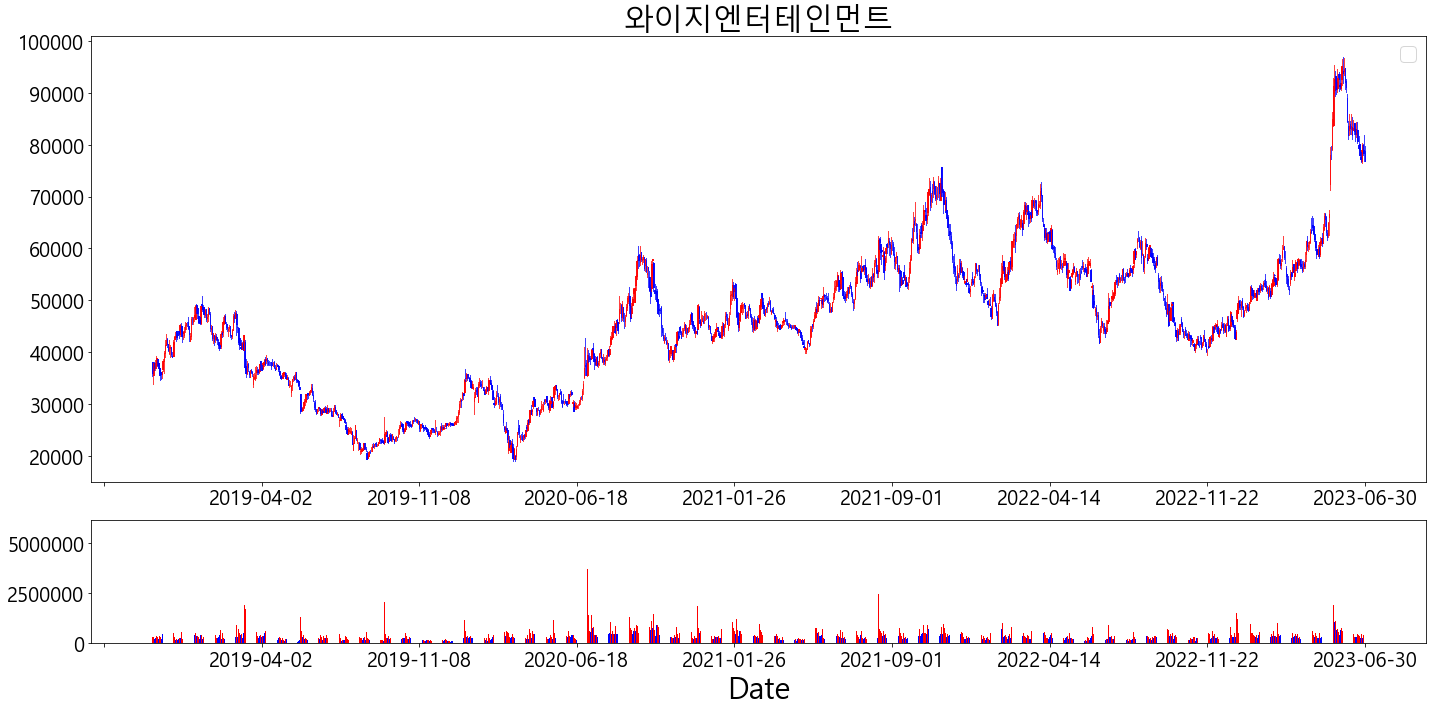

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc

pdata=df_f
pdata= df_f.set_index('Date')

pdata['Date'] = pd.to_datetime(df_f['Date'])
pdata['시가'] = pdata['시가'].str.replace(',', '').astype(float)
pdata['고가'] = pdata['고가'].str.replace(',', '').astype(float)
pdata['저가'] = pdata['저가'].str.replace(',', '').astype(float)
pdata['종가'] = pdata['종가'].str.replace(',', '').astype(float)
pdata['거래량'] = pdata['거래량'].str.replace(',', '').astype(int)  # 숫자로 변환
#ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']
for ent in ent_list:
    filtered_data = pdata[pdata['entertain'] == '와이지엔터테인먼트' ]
    pdata = filtered_data

# 그래프 구역 나누기
fig = plt.figure(figsize=(20, 10))
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4, sharex=top_axes)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 인덱스 설정
idx = pdata.index.astype('str')

# 캔들차트 그리기
candlestick2_ohlc(top_axes, pdata['시가'], pdata['고가'],
                  pdata['저가'], pdata['종가'],
                  width=0.5, colorup='r', colordown='b')

# 거래량 날짜 지정
color_func = lambda x: 'r' if x >= 0 else 'b'
color_list = list(pdata['거래량'].diff().fillna(0).apply(color_func))
bottom_axes.bar(idx, pdata['거래량'], width=0.5,
                align='center',
                color=color_list)

# 그래프 title 지정

top_axes.set_title('와이지엔터테인먼트',fontsize=30)
# X축 티커 숫자 20개로 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=30)
top_axes.legend(fontsize=20)
top_axes.tick_params(axis='both', labelsize=20)
bottom_axes.tick_params(axis='both', labelsize=20)
plt.tight_layout()
top_axes.invert_xaxis()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


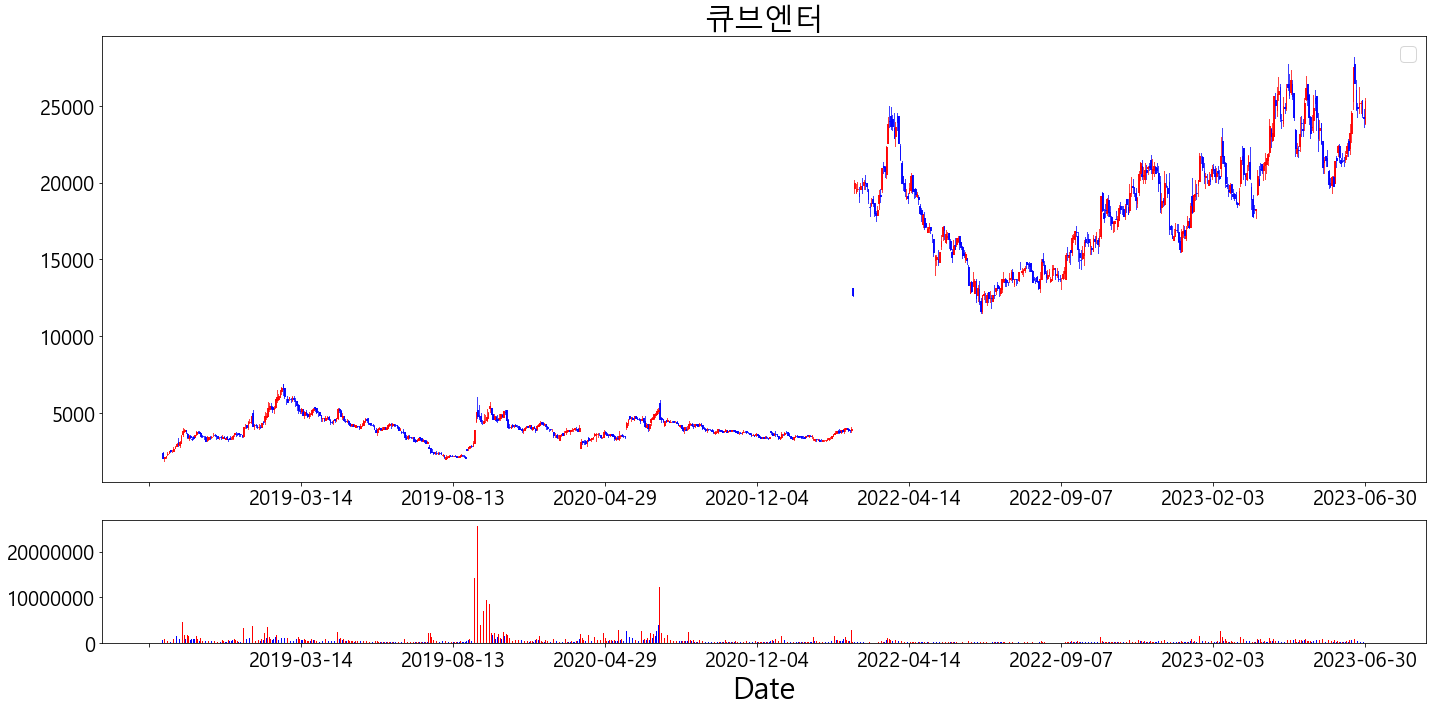

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc

pdata=df_f
pdata= df_f.set_index('Date')

pdata['Date'] = pd.to_datetime(df_f['Date'])
pdata['시가'] = pdata['시가'].str.replace(',', '').astype(float)
pdata['고가'] = pdata['고가'].str.replace(',', '').astype(float)
pdata['저가'] = pdata['저가'].str.replace(',', '').astype(float)
pdata['종가'] = pdata['종가'].str.replace(',', '').astype(float)
pdata['거래량'] = pdata['거래량'].str.replace(',', '').astype(int)  # 숫자로 변환
#ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']
for ent in ent_list:
    filtered_data = pdata[pdata['entertain'] == '큐브엔터' ]
    pdata = filtered_data

# 그래프 구역 나누기
fig = plt.figure(figsize=(20, 10))
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4, sharex=top_axes)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 인덱스 설정
idx = pdata.index.astype('str')

# 캔들차트 그리기
candlestick2_ohlc(top_axes, pdata['시가'], pdata['고가'],
                  pdata['저가'], pdata['종가'],
                  width=0.5, colorup='r', colordown='b')

# 거래량 날짜 지정
color_func = lambda x: 'r' if x >= 0 else 'b'
color_list = list(pdata['거래량'].diff().fillna(0).apply(color_func))
bottom_axes.bar(idx, pdata['거래량'], width=0.5,
                align='center',
                color=color_list)

# 그래프 title 지정

top_axes.set_title('큐브엔터',fontsize=30)
# X축 티커 숫자 20개로 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=30)
top_axes.legend(fontsize=20)
top_axes.tick_params(axis='both', labelsize=20)
bottom_axes.tick_params(axis='both', labelsize=20)
plt.tight_layout()
top_axes.invert_xaxis()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


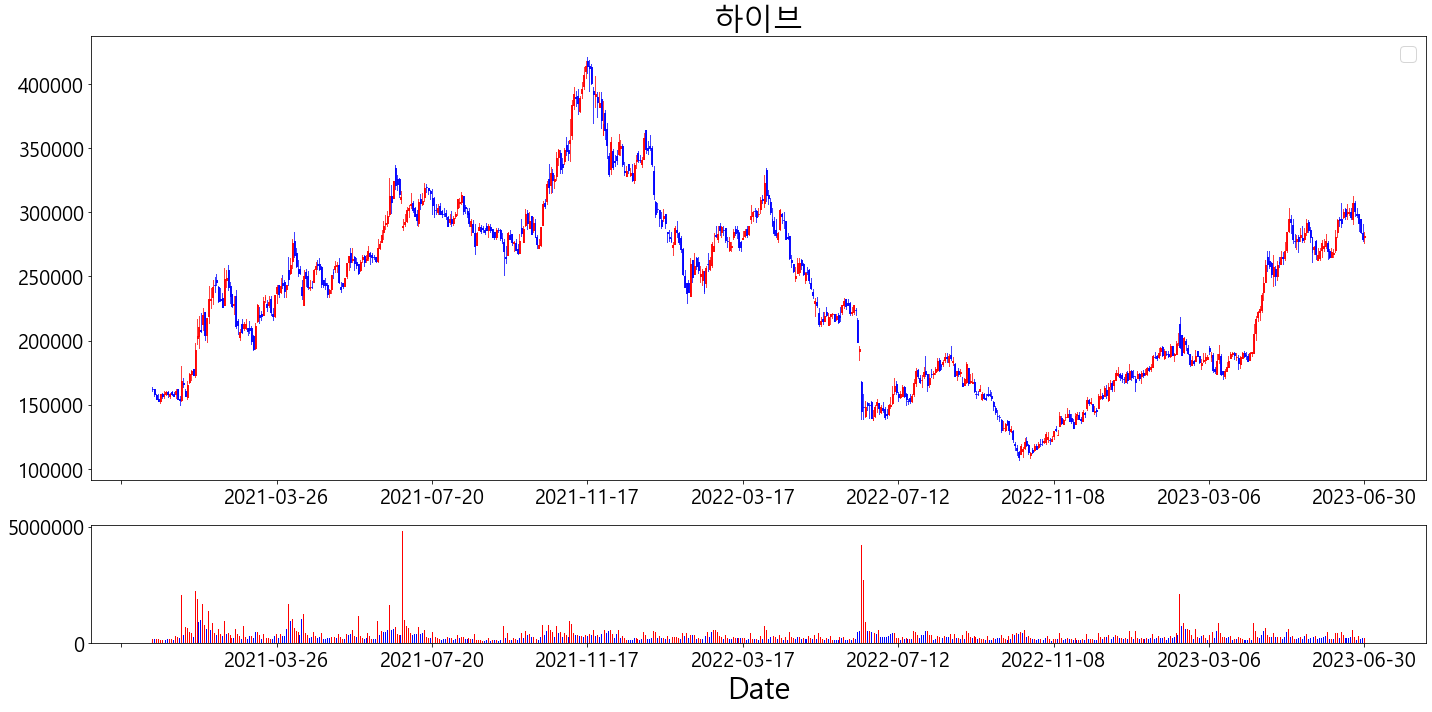

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mplfinance.original_flavor import candlestick2_ohlc

pdata=df_f
pdata= df_f.set_index('Date')

pdata['Date'] = pd.to_datetime(df_f['Date'])
pdata['시가'] = pdata['시가'].str.replace(',', '').astype(float)
pdata['고가'] = pdata['고가'].str.replace(',', '').astype(float)
pdata['저가'] = pdata['저가'].str.replace(',', '').astype(float)
pdata['종가'] = pdata['종가'].str.replace(',', '').astype(float)
pdata['거래량'] = pdata['거래량'].str.replace(',', '').astype(int)  # 숫자로 변환
#ent_list = ['JYP Ent.', '에스엠', '에프엔씨엔터', '와이지엔터테인먼트', '큐브엔터', '하이브']
for ent in ent_list:
    filtered_data = pdata[pdata['entertain'] == '하이브' ]
    pdata = filtered_data

# 그래프 구역 나누기
fig = plt.figure(figsize=(20, 10))
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4, sharex=top_axes)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

# 인덱스 설정
idx = pdata.index.astype('str')

# 캔들차트 그리기
candlestick2_ohlc(top_axes, pdata['시가'], pdata['고가'],
                  pdata['저가'], pdata['종가'],
                  width=0.5, colorup='r', colordown='b')

# 거래량 날짜 지정
color_func = lambda x: 'r' if x >= 0 else 'b'
color_list = list(pdata['거래량'].diff().fillna(0).apply(color_func))
bottom_axes.bar(idx, pdata['거래량'], width=0.5,
                align='center',
                color=color_list)

# 그래프 title 지정

top_axes.set_title('하이브',fontsize=30)
# X축 티커 숫자 20개로 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))
# X축 라벨 지정
bottom_axes.set_xlabel('Date', fontsize=30)
top_axes.legend(fontsize=20)
top_axes.tick_params(axis='both', labelsize=20)
bottom_axes.tick_params(axis='both', labelsize=20)
plt.tight_layout()
top_axes.invert_xaxis()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.font_manager as fm


# 2019년 데이터와 2020년 데이터를 불러옵니다.
df_n= pd.read_csv("/content/drive/MyDrive/명지대학교SW경진대회/데이터/news_title_labeling.csv",encoding='UTF-8')
df_n.tail()

,날짜,종목명,제목,점수,라벨링
6521,2019-09-10,와이지엔터테이먼트,"\n\t\t\t악동뮤지션, 25일 세 번째 정규앨범 '항해' 공개…쓸쓸한 정취\n\t\t",1,1
6522,2019-09-06,와이지엔터테이먼트,"\n\t\t\t[엔터브리프] Mnet ‘아이돌학교’ 시청자들, 제작진 고발 등\n\t\t",0,0
6523,2019-09-06,와이지엔터테이먼트,"조국, '버닝썬' 윤총경 인증샷…""회식 때 찍은 것""",-1,-1
6524,2019-09-03,와이지엔터테이먼트,"비아이 마약·양현석 수사 개입 의혹, 결국 경찰이 수사…""의문 남지 않도록 할 것""",-5,-1
6525,2019-09-02,와이지엔터테이먼트,"패스트트랙 소환 불응 의원…경찰, 檢과 체포영장 협의 중",-2,-1


In [ ]:
import pandas as pd

# Your data preparation code here...

# Grouping by '종목명' and calculating mean and count for '점수' and '라벨링'
result = df_n.groupby('종목명').agg({'점수': ['mean', 'count'], '라벨링': ['mean', 'count']})

# Resetting the column names after aggregation
result.columns = ['Score Mean', 'Score Count', 'Labeling Mean', 'Labeling Count']

# Resetting the index to make '종목명' a regular column
result = result.reset_index()

print(result)


         종목명  Score Mean  Score Count  Labeling Mean  Labeling Count
0   JYP Ent.    0.643699         1103       0.346328            1103
1        에스엠    0.330557         1921       0.199375            1921
2     에프엔씨엔터    0.394595          370       0.140541             370
3  와이지엔터테이먼트    0.254467         1623       0.150339            1623
4       큐브엔터    0.452020          396       0.133838             396
5        하이브    0.387242         1113       0.255166            1113


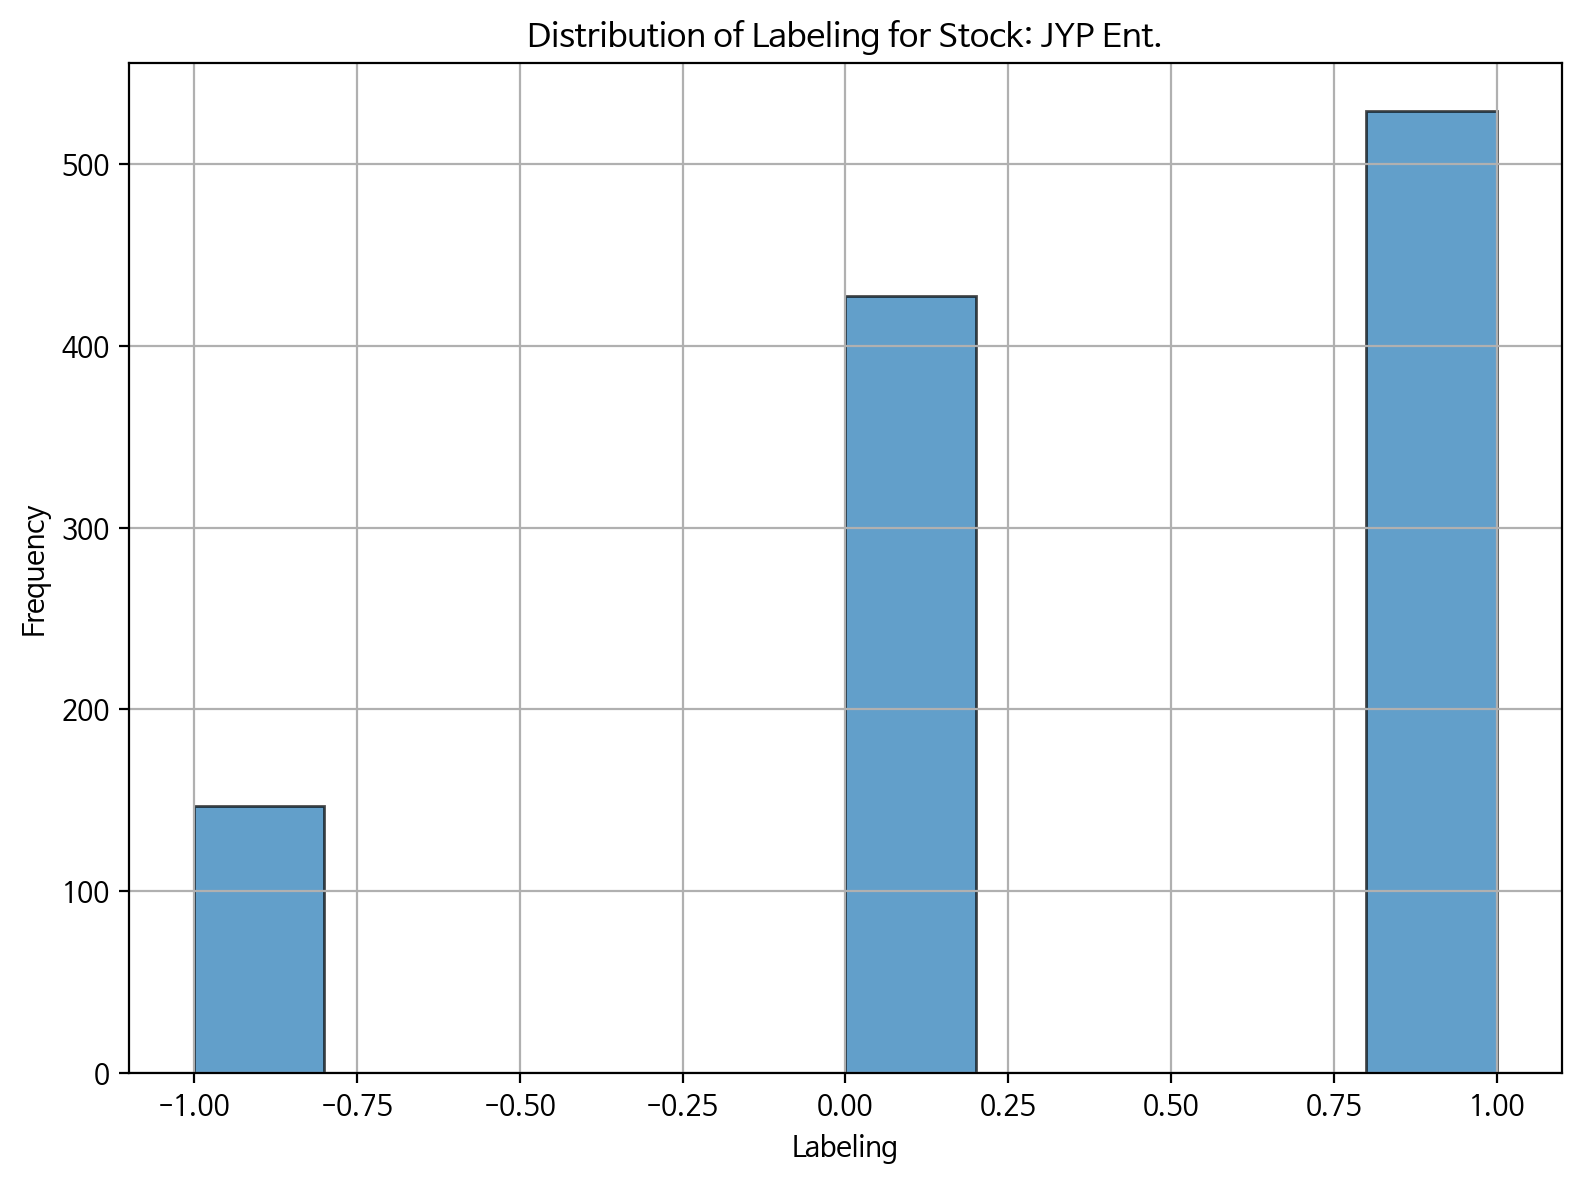

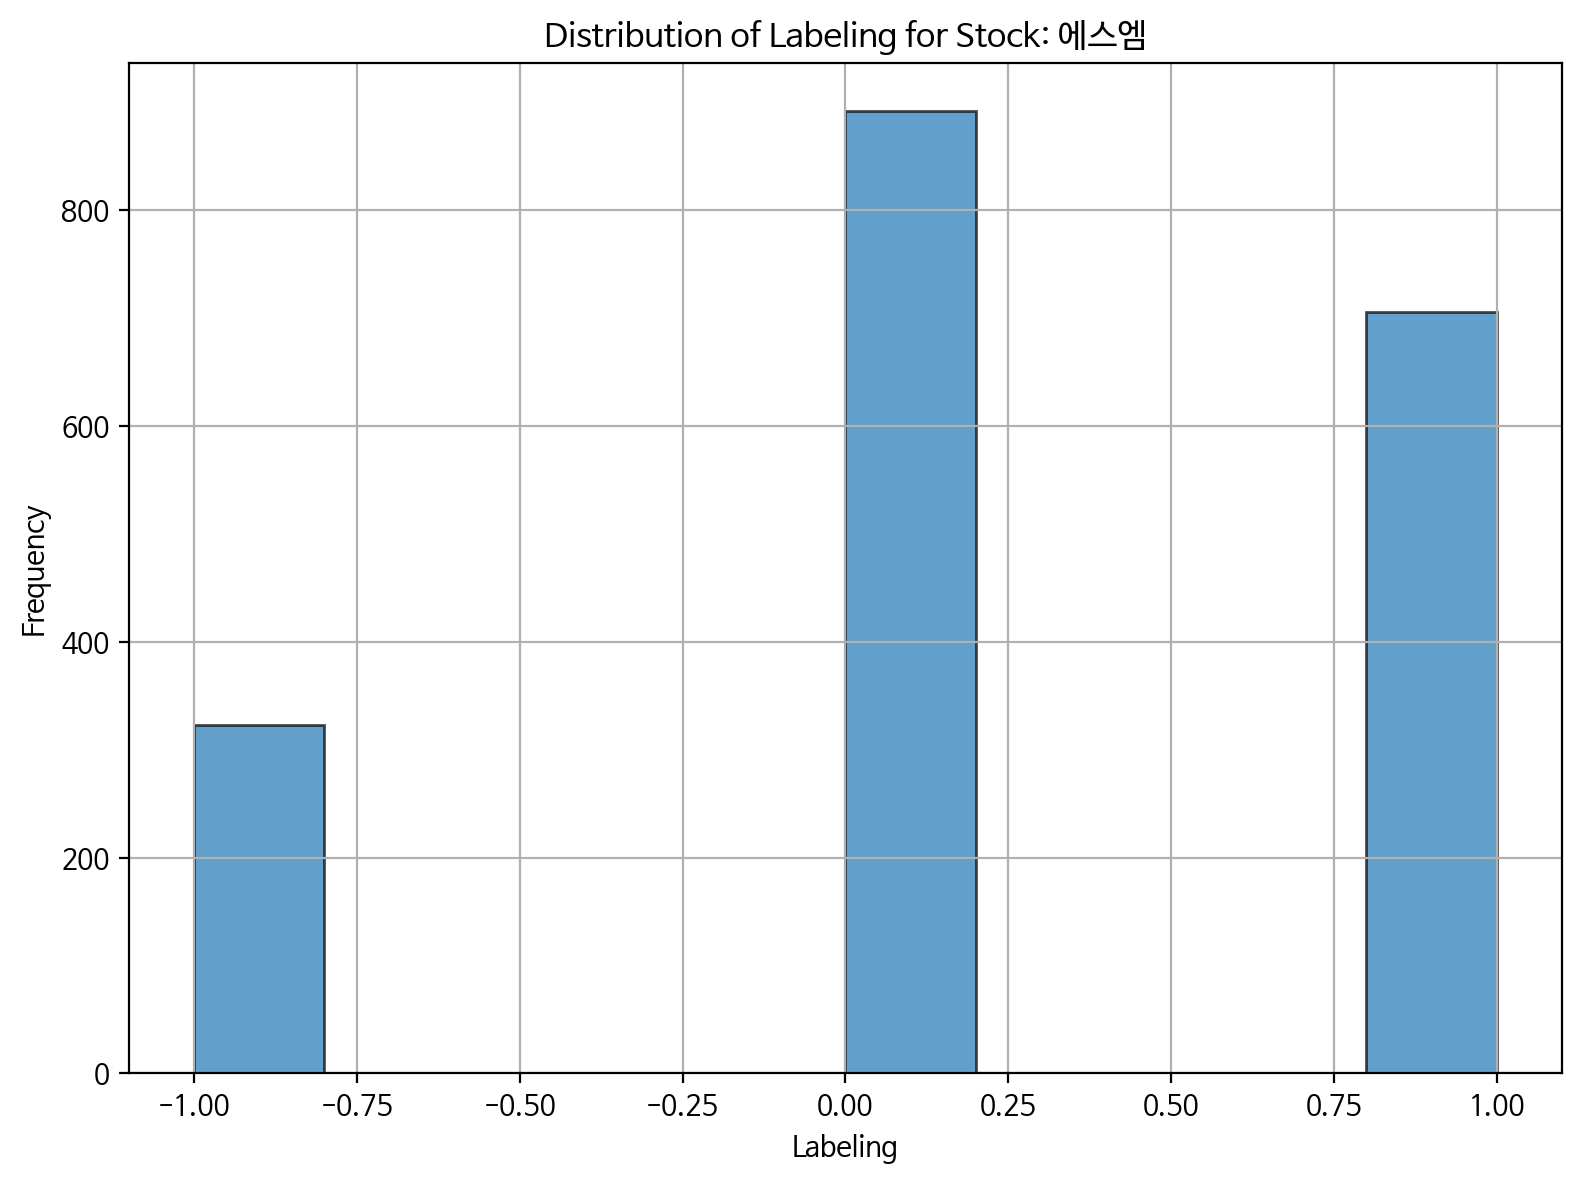

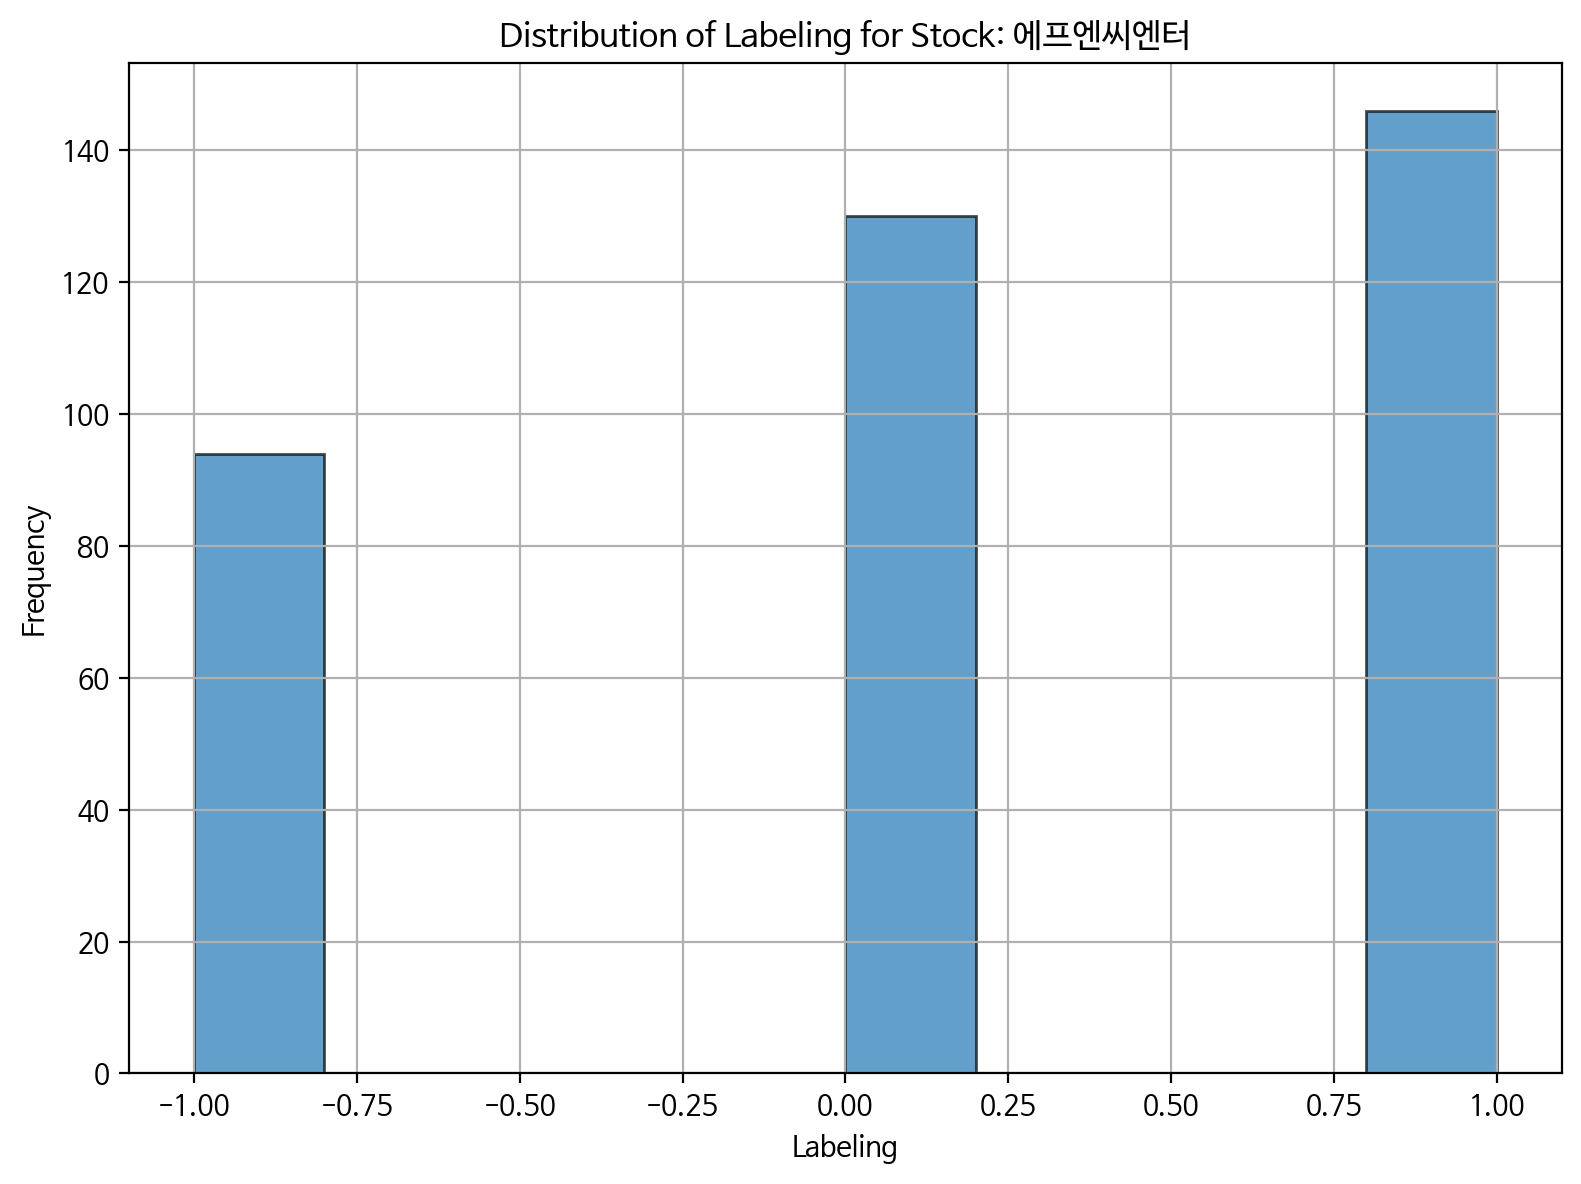

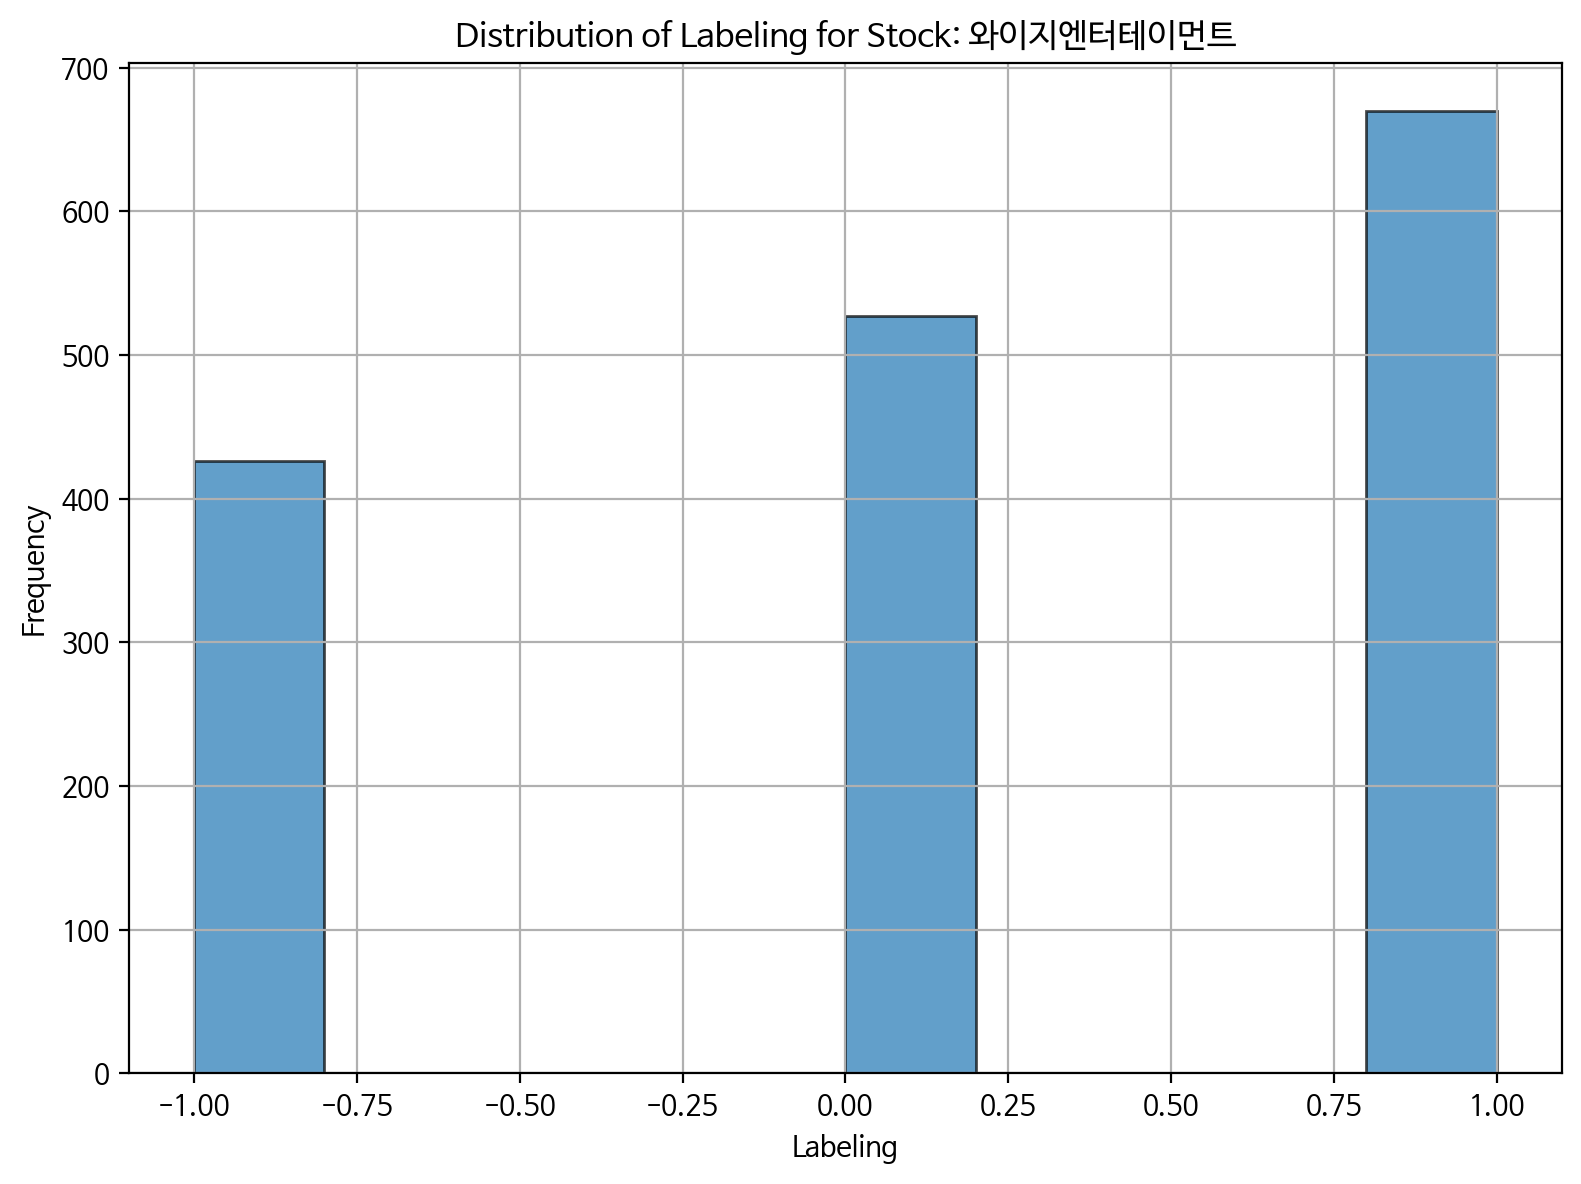

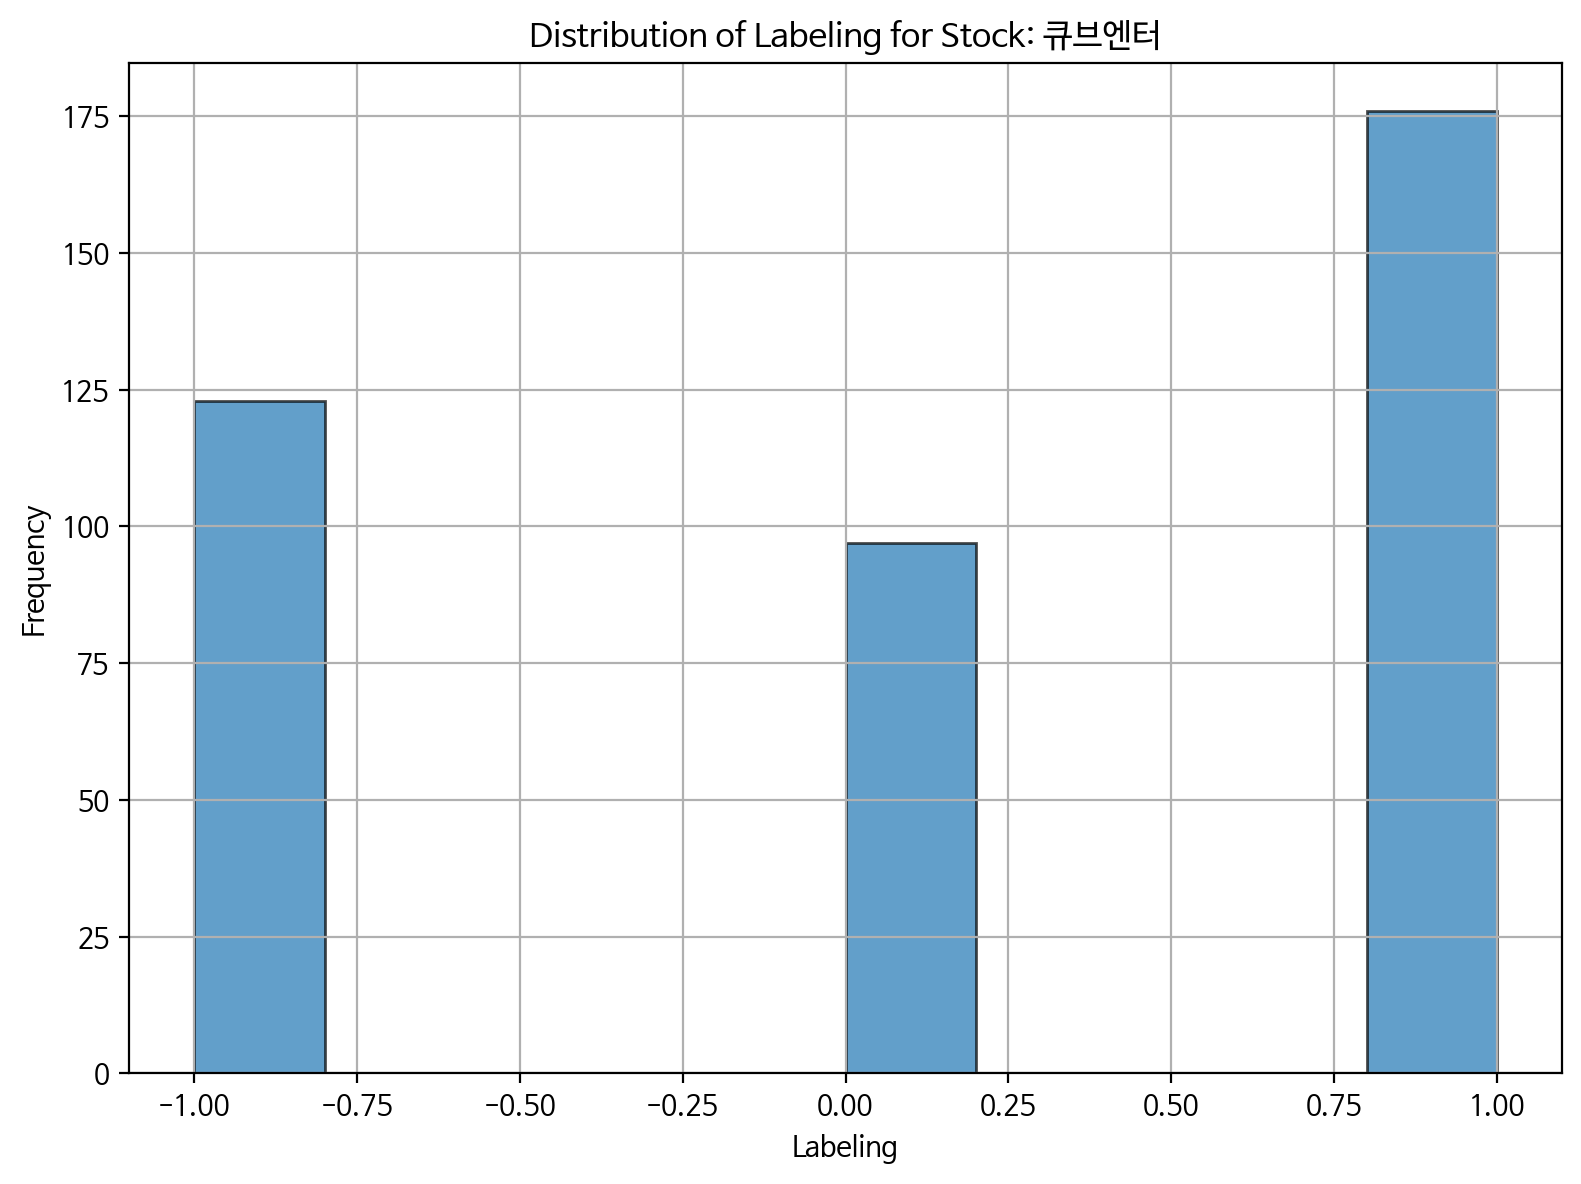

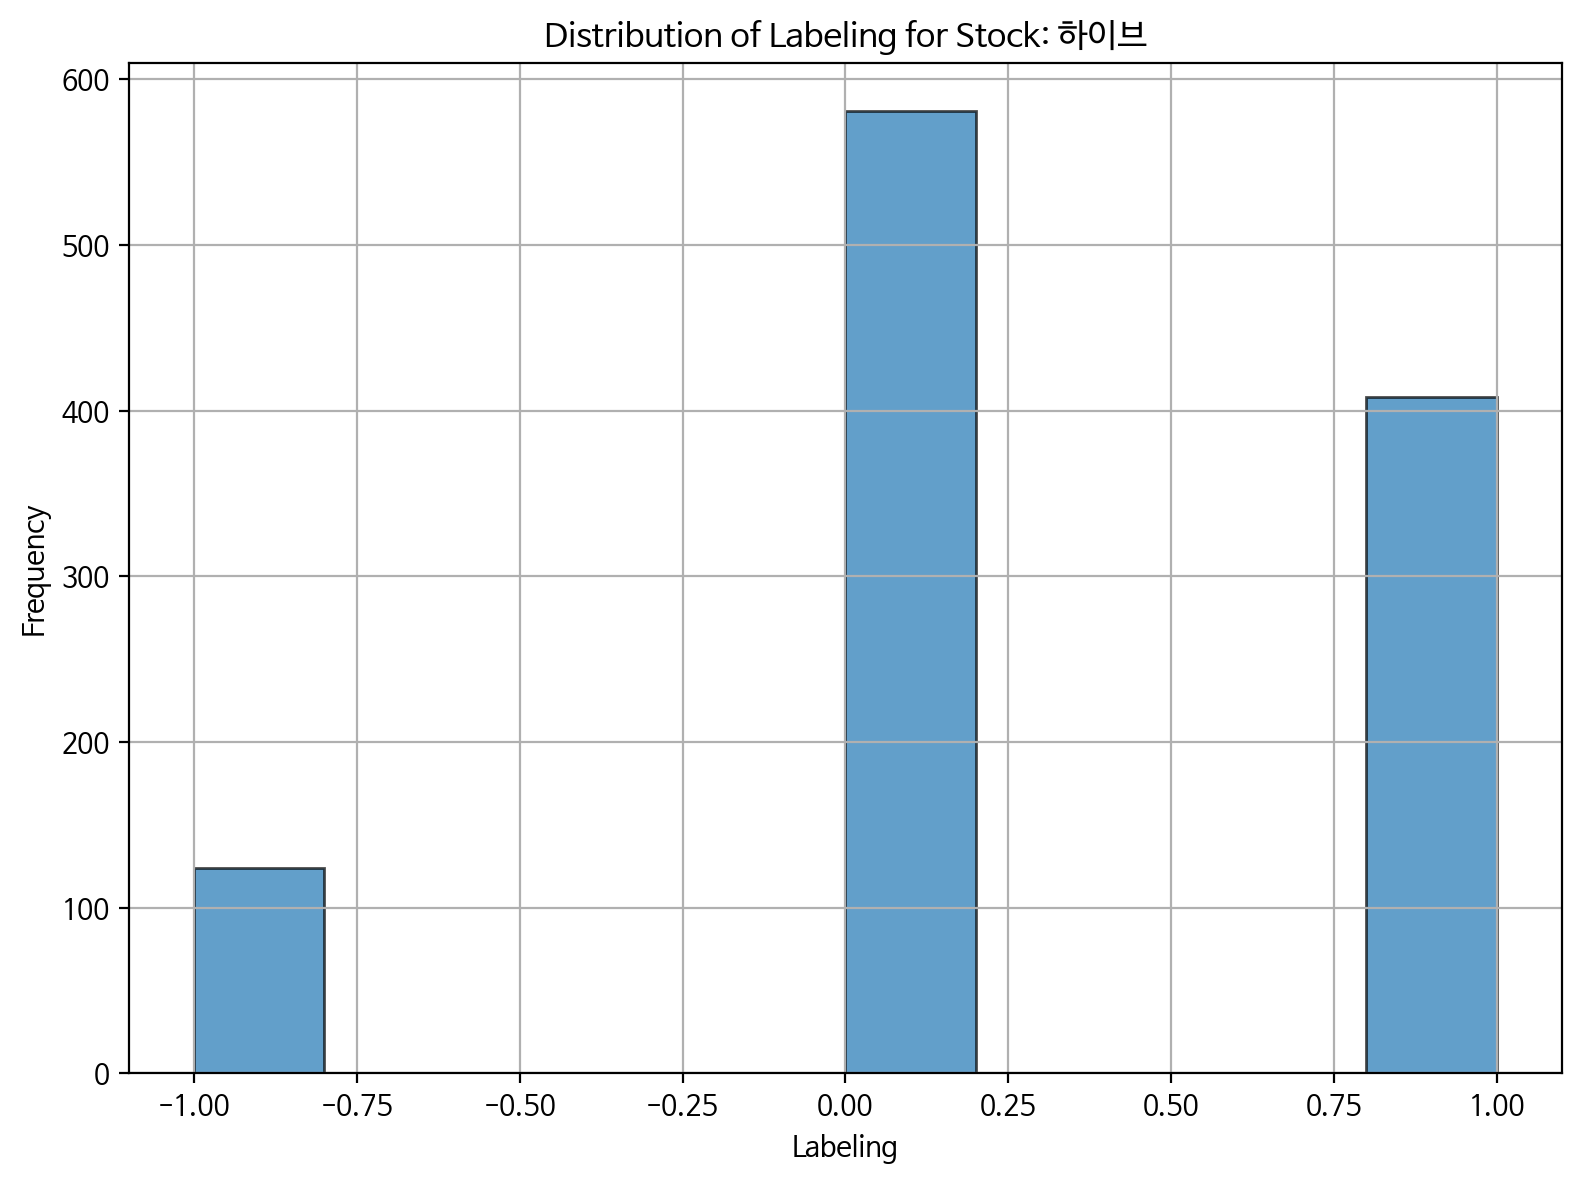

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data preparation code here...

# Grouping by '종목명' and plotting the distribution of '라벨링'
for stock_name, group in df_n.groupby('종목명'):
    plt.figure(figsize=(8, 6))
    plt.hist(group['라벨링'], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of Labeling for Stock: {stock_name}')
    plt.xlabel('Labeling')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\tonya\AppData\Local\Temp\ipykernel_32452\4124324435.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


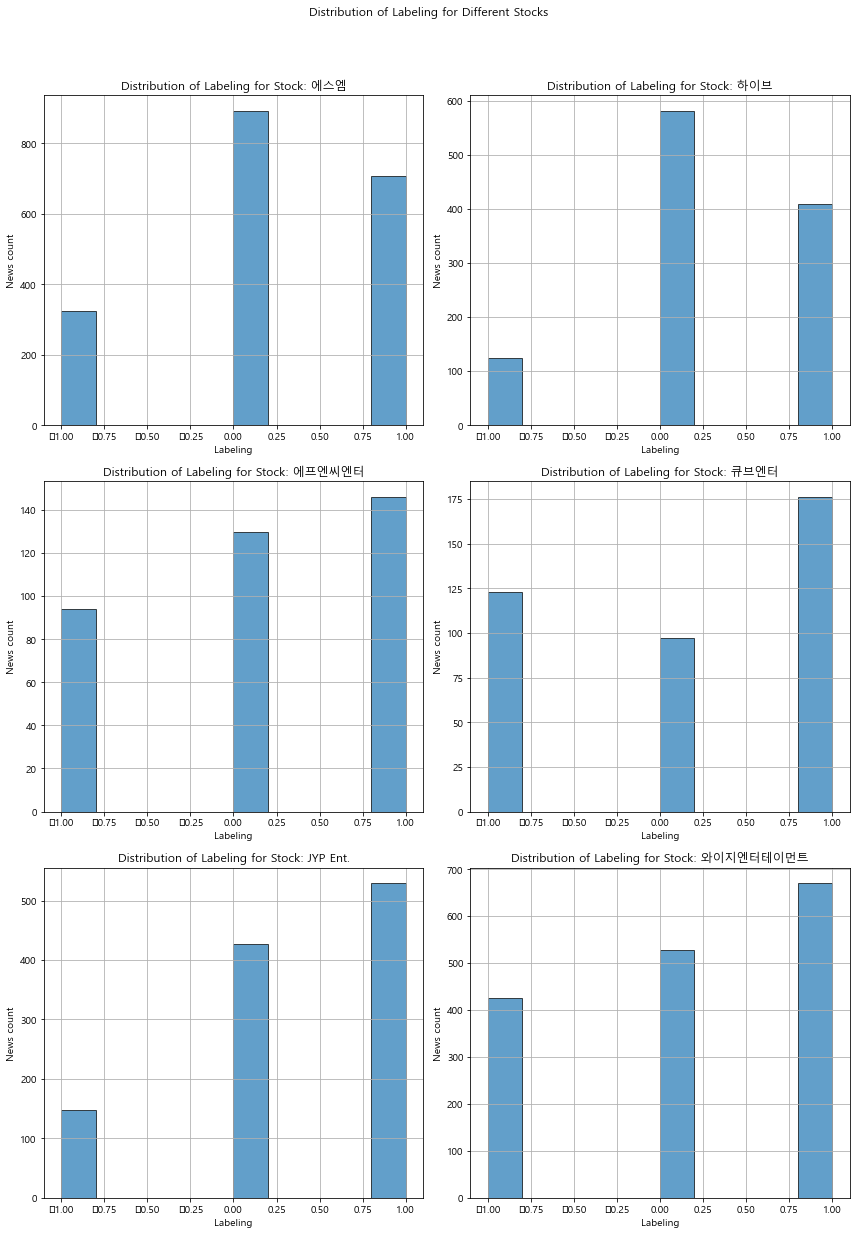

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



unique_stock_names = df_n['종목명'].unique()


num_plots = len(unique_stock_names)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols


fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Distribution of Labeling for Different Stocks')

for i, stock_name in enumerate(unique_stock_names):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    group = df_n[df_n['종목명'] == stock_name]
    ax.hist(group['라벨링'], bins=10, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of Labeling for Stock: {stock_name}')
    ax.set_xlabel('Labeling')
    ax.set_ylabel('News count')
    ax.grid(True)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<Figure size 720x432 with 0 Axes>

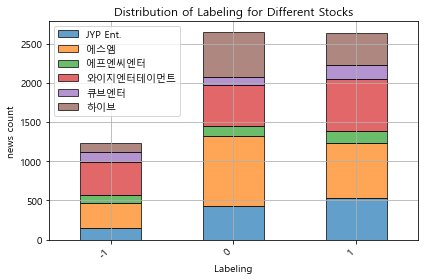

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

labeling_distributions = []
for stock_name, group in df_n.groupby('종목명'):
    labeling_counts = group['라벨링'].value_counts().sort_index()
    labeling_distributions.append((stock_name, labeling_counts))


distribution_df = pd.DataFrame({name: counts for name, counts in labeling_distributions})


plt.figure(figsize=(10, 6))
distribution_df.plot(kind='bar', stacked=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Labeling for Different Stocks')
plt.xlabel('Labeling')
plt.ylabel('news count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()


plt.show()


<Figure size 720x432 with 0 Axes>

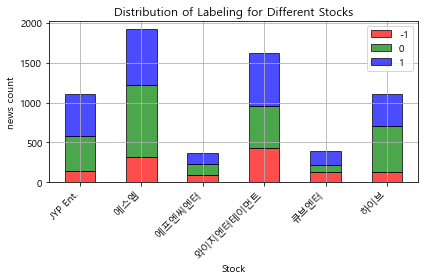

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



labeling_distributions = []
stock_names = []
for stock_name, group in df_n.groupby('종목명'):
    stock_names.append(stock_name)
    labeling_counts = group['라벨링'].value_counts().sort_index()
    labeling_distributions.append(labeling_counts)

distribution_df = pd.DataFrame(labeling_distributions, index=stock_names)


custom_colors = ['r', 'g', 'b']


plt.figure(figsize=(10, 6))
distribution_df.plot(kind='bar', stacked=True, edgecolor='black', alpha=0.7, color=custom_colors)
plt.title('Labeling for Different Stocks')
plt.xlabel('Stock')
plt.ylabel('news count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()


plt.show()


<Figure size 720x432 with 0 Axes>

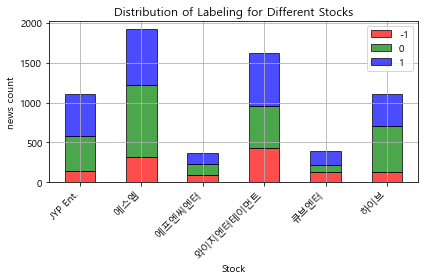

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




labeling_distributions = []
stock_names = []
for stock_name, group in df_n.groupby('종목명'):
    stock_names.append(stock_name)
    labeling_counts = group['라벨링'].value_counts().sort_index()
    labeling_distributions.append(labeling_counts)


distribution_df = pd.DataFrame(labeling_distributions, index=stock_names)


custom_colors = ['r', 'g', 'b']


plt.figure(figsize=(10, 6))
distribution_df.plot(kind='bar', stacked=True, edgecolor='black', alpha=0.7, color=custom_colors)
plt.title('Labeling for Different Stocks')
plt.xlabel('Stock')
plt.ylabel('news count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()


plt.show()


<Figure size 864x576 with 0 Axes>

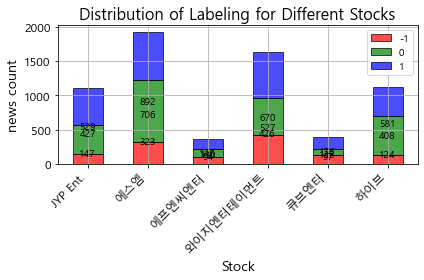

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


labeling_distributions = []
stock_names = []
for stock_name, group in df_n.groupby('종목명'):
    stock_names.append(stock_name)
    labeling_counts = group['라벨링'].value_counts().sort_index()
    labeling_distributions.append(labeling_counts)


distribution_df = pd.DataFrame(labeling_distributions, index=stock_names)

custom_colors = ['r', 'g', 'b']


plt.figure(figsize=(12, 8))
ax = distribution_df.plot(kind='bar', stacked=True, edgecolor='black', alpha=0.7, color=custom_colors)
plt.title('Labeling for Different Stocks', fontsize=16)
plt.xlabel('Stock', fontsize=14)
plt.ylabel('news count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()


for col in distribution_df.columns:
    for i, val in enumerate(distribution_df[col]):
        if val > 0:
            ax.annotate(str(val), xy=(i, val), xytext=(0, 5), textcoords='offset points', ha='center', va='top', fontsize=10)  # Increase annotation font size

# Show the plot
plt.show()


C:\Users\tonya\AppData\Local\Temp\ipykernel_6360\173815831.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


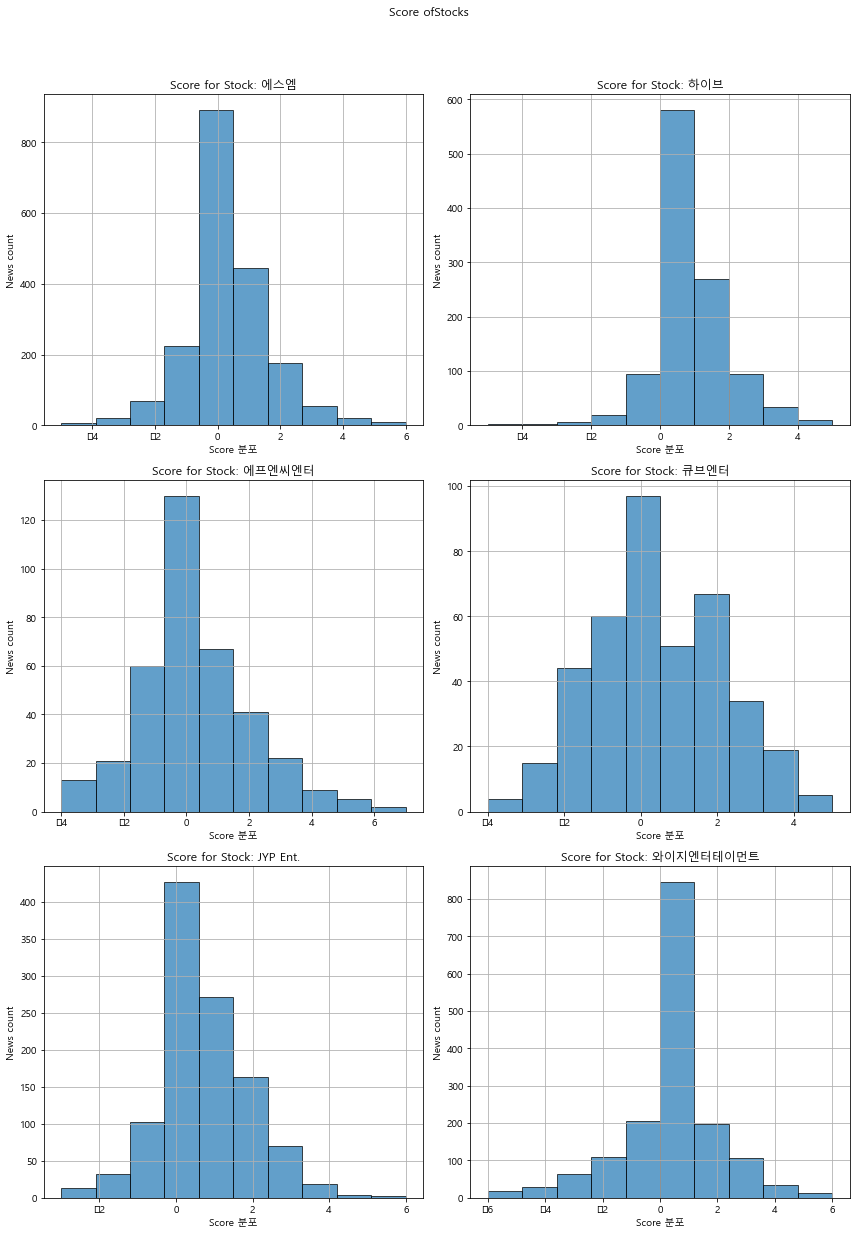

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


unique_stock_names = df_n['종목명'].unique()


num_plots = len(unique_stock_names)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols


fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Score ofStocks')


for i, stock_name in enumerate(unique_stock_names):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    group = df_n[df_n['종목명'] == stock_name]
    ax.hist(group['점수'], bins=10, edgecolor='black', alpha=0.7)
    ax.set_title(f'Score for Stock: {stock_name}')
    ax.set_xlabel('Score 분포')
    ax.set_ylabel('News count')
    ax.grid(True)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\tonya\AppData\Local\Temp\ipykernel_6360\1010552265.py:39: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


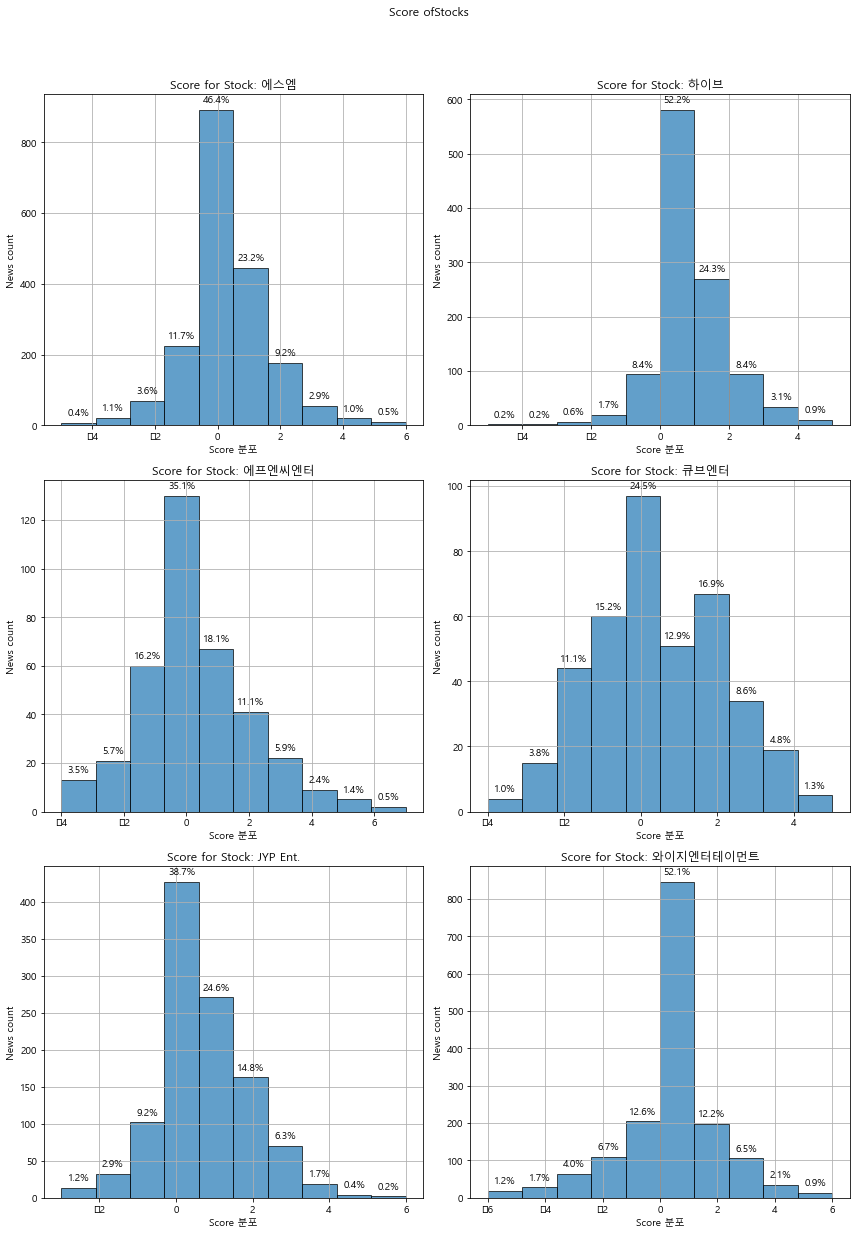

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


unique_stock_names = df_n['종목명'].unique()


num_plots = len(unique_stock_names)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols


fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Score ofStocks')


for i, stock_name in enumerate(unique_stock_names):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    group = df_n[df_n['종목명'] == stock_name]
    ax.hist(group['점수'], bins=10, edgecolor='black', alpha=0.7)
    ax.set_title(f'Score for Stock: {stock_name}')
    ax.set_xlabel('Score 분포')
    ax.set_ylabel('News count')
    ax.grid(True)

    total_news_count = len(group)
    for n in ax.patches:
        percentage = '{:.1f}%'.format(100 * n.get_height() / total_news_count)
        ax.annotate(percentage, (n.get_x() + n.get_width() / 2, n.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
